### Importing libraries

In [1]:
import os
import functools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


### Reading in the opioid prescription rates for Medicare Part D from 2020

In [2]:
df1 = pd.read_csv('Medicare_Part_D_Prescribers_by_Provider_and_Drug_2020.zip', nrows=10000000)

c:\users\user\ml-spring-2023\lib\site-packages\IPython\core\interactiveshell.py:3203: DtypeWarning: Columns (5,15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df1.head()

Prscrbr_NPI Prscrbr_Last_Org_Name Prscrbr_First_Name Prscrbr_City  \
0   1003007477                 Abdow           Kimberly    Worcester   
1   1003007477                 Abdow           Kimberly    Worcester   
2   1003022609                 Ortiz              Jaime  Bakersfield   
3   1003022609                 Ortiz              Jaime  Bakersfield   
4   1003049966              Dhorajia        Girishkumar       Normal   

  Prscrbr_State_Abrvtn Prscrbr_State_FIPS            Prscrbr_Type  \
0                   MA                 25      Nurse Practitioner   
1                   MA                 25      Nurse Practitioner   
2                   CA                 06  Psychiatry & Neurology   
3                   CA                 06  Psychiatry & Neurology   
4                   IL                 17              Psychiatry   

  Prscrbr_Type_Src             Brnd_Name             Gnrc_Name  ...  \
0                S    Chlorpromazine Hcl    Chlorpromazine Hcl  ...   
1                S         Oxcarbazepine         Oxcarbazepine  ...   
2                T  Benztropine Mesylate  Benztropine Mesylate  ...   
3                T   Quetiapine Fumarate   Quetiapine Fumarate  ...   
4                S   Quetiapine Fumarate   Quetiapine Fumarate  ...   

   Tot_Day_Suply  Tot_Drug_Cst  Tot_Benes  GE65_Sprsn_Flag  GE65_Tot_Clms  \
0           2300      25297.11       11.0              NaN            0.0   
1           3080       2147.73       11.0              NaN            0.0   
2           2287        851.04       11.0              NaN            0.0   
3           3060       1270.30       15.0              NaN            0.0   
4            498        348.90       11.0              NaN            0.0   

  GE65_Tot_30day_Fills  GE65_Tot_Drug_Cst  GE65_Tot_Day_Suply  \
0                  0.0                0.0                 0.0   
1                  0.0                0.0                 0.0   
2                  0.0                0.0                 0.0   
3                  0.0                0.0                 0.0   
4                  0.0                0.0                 0.0   

   GE65_Bene_Sprsn_Flag  GE65_Tot_Benes  
0                   NaN             0.0  
1                   NaN             0.0  
2                   NaN             0.0  
3                   NaN             0.0  
4                   NaN             0.0  

[5 rows x 22 columns]

In [5]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [6]:
describe_more(df1)

A_Variable   Levels Datatype  Min Length  Max Length  \
0             Prscrbr_NPI   649876    int64          10          10   
1   Prscrbr_Last_Org_Name   179310   object           1          35   
2      Prscrbr_First_Name    56800   object           1          20   
3            Prscrbr_City    10944   object           2          37   
4    Prscrbr_State_Abrvtn       61   object           2           2   
5      Prscrbr_State_FIPS      115   object           1           4   
6            Prscrbr_Type      162   object           7          74   
7        Prscrbr_Type_Src        2   object           1           1   
8               Brnd_Name     2739   object           2          30   
9               Gnrc_Name     1611   object           6          30   
10               Tot_Clms     3607    int64           2           6   
11        Tot_30day_Fills    28772  float64           4           8   
12          Tot_Day_Suply    66715    int64           2           6   
13           Tot_Drug_Cst  1659137  float64           3          11   
14              Tot_Benes     1264  float64           3           8   
15        GE65_Sprsn_Flag        2   object           1           3   
16          GE65_Tot_Clms     3027  float64           3           8   
17   GE65_Tot_30day_Fills    26292  float64           3           8   
18      GE65_Tot_Drug_Cst  1213791  float64           3          11   
19     GE65_Tot_Day_Suply    60572  float64           3           8   
20   GE65_Bene_Sprsn_Flag        2   object           1           3   
21         GE65_Tot_Benes     1142  float64           3           8   

                                         Level_Values  
0   {1285761833: 535, 1285618579: 501, 1134107022:...  
1   {'Patel': 55454, 'Smith': 54802, 'Johnson': 40...  
2   {'Michael': 195162, 'David': 178780, 'John': 1...  
3   {'New York': 91106, 'Brooklyn': 76376, 'Housto...  
4   {'CA': 973356, 'FL': 724348, 'NY': 671081, 'TX...  
5   {6.0: 502220, '06': 471136, 12.0: 368814, 36.0...  
6   {'Family Practice': 2631119, 'Internal Medicin...  
7                         {'S': 9819990, 'T': 180010}  
8   {'Atorvastatin Calcium': 161044, 'Gabapentin':...  
9   {'Levothyroxine Sodium': 174360, 'Atorvastatin...  
10  {12: 569439, 11: 558033, 13: 473173, 14: 38504...  
11  {12.0: 295612, 11.0: 265558, 13.0: 256060, 14....  
12  {360: 143762, 330: 109388, 390: 96150, 990: 81...  
13  {78.0: 448, 85.8: 427, 78.65: 351, 110.0: 334,...  
14  {11.0: 464778, 12.0: 391583, 13.0: 334493, 14....  
15                       {'#': 2545411, '*': 1102519}  
16  {12.0: 344712, 11.0: 330692, 0.0: 323420, 13.0...  
17  {0.0: 323420, 12.0: 178469, 11.0: 151433, 13.0...  
18  {0.0: 323471, 85.8: 295, 78.0: 266, 78.65: 222...  
19  {0.0: 323420, 360.0: 99698, 330.0: 73710, 390....  
20                       {'*': 5217180, '#': 2254309}  
21  {11.0: 262792, 12.0: 216055, 13.0: 180748, 14....

In [7]:
df1.head()

Prscrbr_NPI Prscrbr_Last_Org_Name Prscrbr_First_Name Prscrbr_City  \
0   1003007477                 Abdow           Kimberly    Worcester   
1   1003007477                 Abdow           Kimberly    Worcester   
2   1003022609                 Ortiz              Jaime  Bakersfield   
3   1003022609                 Ortiz              Jaime  Bakersfield   
4   1003049966              Dhorajia        Girishkumar       Normal   

  Prscrbr_State_Abrvtn Prscrbr_State_FIPS            Prscrbr_Type  \
0                   MA                 25      Nurse Practitioner   
1                   MA                 25      Nurse Practitioner   
2                   CA                 06  Psychiatry & Neurology   
3                   CA                 06  Psychiatry & Neurology   
4                   IL                 17              Psychiatry   

  Prscrbr_Type_Src             Brnd_Name             Gnrc_Name  ...  \
0                S    Chlorpromazine Hcl    Chlorpromazine Hcl  ...   
1                S         Oxcarbazepine         Oxcarbazepine  ...   
2                T  Benztropine Mesylate  Benztropine Mesylate  ...   
3                T   Quetiapine Fumarate   Quetiapine Fumarate  ...   
4                S   Quetiapine Fumarate   Quetiapine Fumarate  ...   

   Tot_Day_Suply  Tot_Drug_Cst  Tot_Benes  GE65_Sprsn_Flag  GE65_Tot_Clms  \
0           2300      25297.11       11.0              NaN            0.0   
1           3080       2147.73       11.0              NaN            0.0   
2           2287        851.04       11.0              NaN            0.0   
3           3060       1270.30       15.0              NaN            0.0   
4            498        348.90       11.0              NaN            0.0   

  GE65_Tot_30day_Fills  GE65_Tot_Drug_Cst  GE65_Tot_Day_Suply  \
0                  0.0                0.0                 0.0   
1                  0.0                0.0                 0.0   
2                  0.0                0.0                 0.0   
3                  0.0                0.0                 0.0   
4                  0.0                0.0                 0.0   

   GE65_Bene_Sprsn_Flag  GE65_Tot_Benes  
0                   NaN             0.0  
1                   NaN             0.0  
2                   NaN             0.0  
3                   NaN             0.0  
4                   NaN             0.0  

[5 rows x 22 columns]

In [8]:
# Get a list of all distinct drug names in the "Gnrc_Name" column
distinct_drug_names = df1['Gnrc_Name'].unique().tolist()

# Print the list of distinct drug names
print(distinct_drug_names)

['Chlorpromazine Hcl', 'Oxcarbazepine', 'Benztropine Mesylate', 'Quetiapine Fumarate', 'Clobazam', 'Topiramate', 'Buprenorphine Hcl/Naloxone Hcl', 'Lorazepam', 'Oxycodone Hcl', 'Aripiprazole Lauroxil', 'Trazodone Hcl', 'Ibuprofen', 'Clonidine Hcl', 'Fluoxetine Hcl', 'Olanzapine', 'Dextroamphetamine/Amphetamine', 'Cariprazine Hcl', 'Amoxicillin/Potassium Clav', 'Hydroxyurea', 'Aripiprazole', 'Buspirone Hcl', 'Hydroxyzine Pamoate', 'Lurasidone Hcl', 'Propranolol Hcl', 'Nystatin', 'Bictegrav/Emtricit/Tenofov Ala', 'Escitalopram Oxalate', 'Hydroxyzine Hcl', 'Cyclobenzaprine Hcl', 'Gabapentin', 'Haloperidol', 'Lithium Carbonate', 'Prazosin Hcl', 'Clonazepam', 'Amitriptyline Hcl', 'Pantoprazole Sodium', 'Clozapine', 'Brivaracetam', 'Divalproex Sodium', 'Risperidone Microspheres', 'Paliperidone Palmitate', 'Paliperidone', 'Elexacaftor/Tezacaftor/Ivacaft', 'Bupropion Hcl', 'Haloperidol Decanoate', 'Duloxetine Hcl', 'Tizanidine Hcl', 'Temazepam', 'Risperidone', 'Fluphenazine Hcl', 'Omeprazole',

List of Opioids in the above distinct drug names:-
Buprenorphine Hcl/Naloxone Hcl
Oxycodone Hcl
Dextroamphetamine/Amphetamine
Oxycodone Hcl/Acetaminophen
Acetaminophen With Codeine
Hydrocodone/Acetaminophen
Hydromorphone Hcl
Fentanyl
Morphine Sulfate

In [9]:
# create a list of opioids
opioids = ['Buprenorphine Hcl/Naloxone Hcl', 'Oxycodone Hcl', 'Dextroamphetamine/Amphetamine', 'Oxycodone Hcl/Acetaminophen', 'Acetaminophen With Codeine', 'Hydrocodone/Acetaminophen', 'Hydromorphone Hcl', 'Fentanyl', 'Morphine Sulfate']


# Filter the dataset to only include rows with opioids
opioid_df = df1[df1['Gnrc_Name'].isin(opioids)]

# Save the filtered dataset to a new CSV file
opioid_df.to_csv('opioids_dataset.csv', index=False)

In [10]:
df = pd.read_csv('opioids_dataset.csv')

c:\users\user\ml-spring-2023\lib\site-packages\IPython\core\interactiveshell.py:3203: DtypeWarning: Columns (5,15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
df.shape

(305488, 22)

In [12]:
# Create a dictionary to store the total number of prescriptions for each opioid
prescriptions = {}

# Loop through each opioid in the list
for opioid in ['Buprenorphine Hcl/Naloxone Hcl', 'Oxycodone Hcl', 'Dextroamphetamine/Amphetamine',
               'Oxycodone Hcl/Acetaminophen', 'Acetaminophen With Codeine', 'Hydrocodone/Acetaminophen',
               'Hydromorphone Hcl', 'Fentanyl', 'Morphine Sulfate']:
    
    # Filter the DataFrame for the current opioid and sum the 'Tot_Clms' column
    total_claims = df[df['Gnrc_Name'].str.contains(opioid)]['Tot_Clms'].sum()
    
    # Add the total number of prescriptions to the dictionary
    prescriptions[opioid] = total_claims

# Print the total number of prescriptions for each opioid
for opioid, total_claims in prescriptions.items():
    print(f"{opioid}: {total_claims}")


Buprenorphine Hcl/Naloxone Hcl: 609421
Oxycodone Hcl: 9827797
Dextroamphetamine/Amphetamine: 627969
Oxycodone Hcl/Acetaminophen: 5375720
Acetaminophen With Codeine: 1096139
Hydrocodone/Acetaminophen: 14280207
Hydromorphone Hcl: 312230
Fentanyl: 487471
Morphine Sulfate: 1619026


In [13]:
df.groupby('Gnrc_Name')['Prscrbr_NPI'].nunique()


Gnrc_Name
Acetaminophen With Codeine         27115
Buprenorphine Hcl/Naloxone Hcl      6008
Dextroamphetamine/Amphetamine      14788
Fentanyl                           11798
Hydrocodone/Acetaminophen         106453
Hydromorphone Hcl                   6958
Morphine Sulfate                   19211
Oxycodone Hcl                      45128
Oxycodone Hcl/Acetaminophen        48188
Name: Prscrbr_NPI, dtype: int64

In [14]:
df_prescribers = df.groupby('Gnrc_Name')['Prscrbr_NPI'].nunique()
df_total_claims = df.groupby('Gnrc_Name')['Tot_Clms'].sum()
df_prescription_rate = df_total_claims / df_prescribers
print(df_prescription_rate)

Gnrc_Name
Acetaminophen With Codeine         40.425558
Buprenorphine Hcl/Naloxone Hcl    101.434920
Dextroamphetamine/Amphetamine      42.464769
Fentanyl                           41.318105
Hydrocodone/Acetaminophen         134.145651
Hydromorphone Hcl                  44.873527
Morphine Sulfate                   84.275988
Oxycodone Hcl                      98.654427
Oxycodone Hcl/Acetaminophen       111.557234
dtype: float64


In [15]:
df_prescription_rate = df_prescription_rate.sort_values(ascending=False)

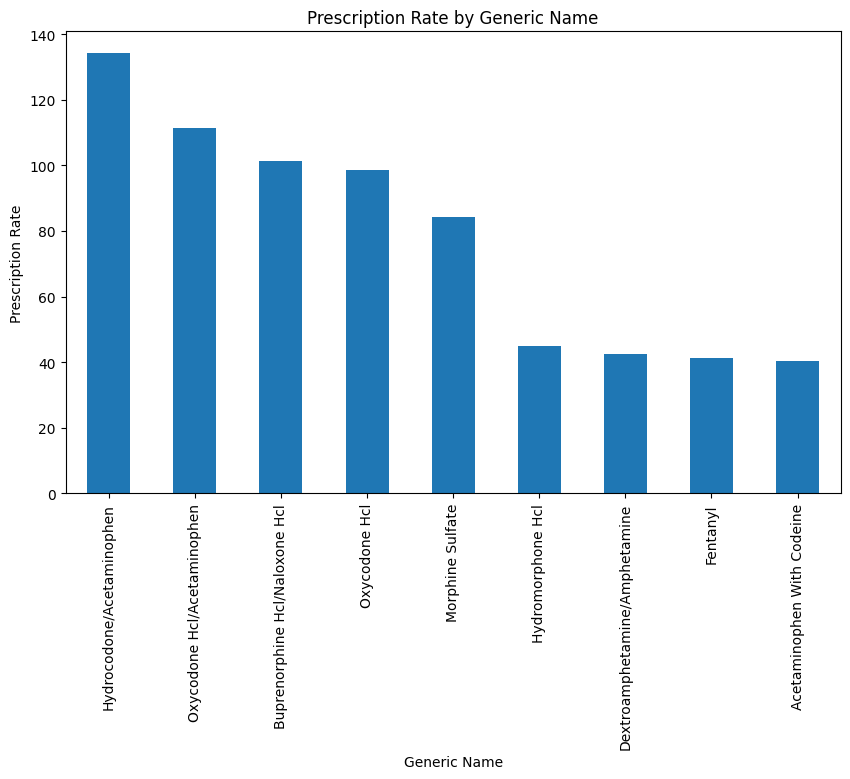

In [16]:
df_prescription_rate.plot(kind='bar', figsize=(10, 6))
plt.title('Prescription Rate by Generic Name')
plt.xlabel('Generic Name')
plt.ylabel('Prescription Rate')
plt.show()

In [17]:
print(df['Tot_Benes'].isnull().sum())

132280


In [18]:
# replace blank cells in "Total Beneficiary" column with 11
df["Tot_Benes"] = df["Tot_Benes"].fillna(11)

In [19]:
print(df['Tot_Benes'].isnull().sum())

0


In [20]:
# Calculate the prescription rate per Medicare beneficiary for each state
prescription_rate = df.groupby(['Prscrbr_State_Abrvtn', 'Gnrc_Name'])['Tot_Clms'].sum() / df.groupby('Prscrbr_State_Abrvtn')['Tot_Benes'].sum()

# Multiply the prescription rate per Medicare beneficiary by 100 to get the prescription rate per 100 people
prescription_rate_per_100 = prescription_rate * 100

In [21]:
prescription_rate_per_100.head()

Prscrbr_State_Abrvtn  Gnrc_Name                 
AA                    Acetaminophen With Codeine    27.419355
                      Hydrocodone/Acetaminophen     95.161290
AE                    Acetaminophen With Codeine    12.500000
                      Hydrocodone/Acetaminophen     84.090909
                      Oxycodone Hcl                 20.454545
dtype: float64

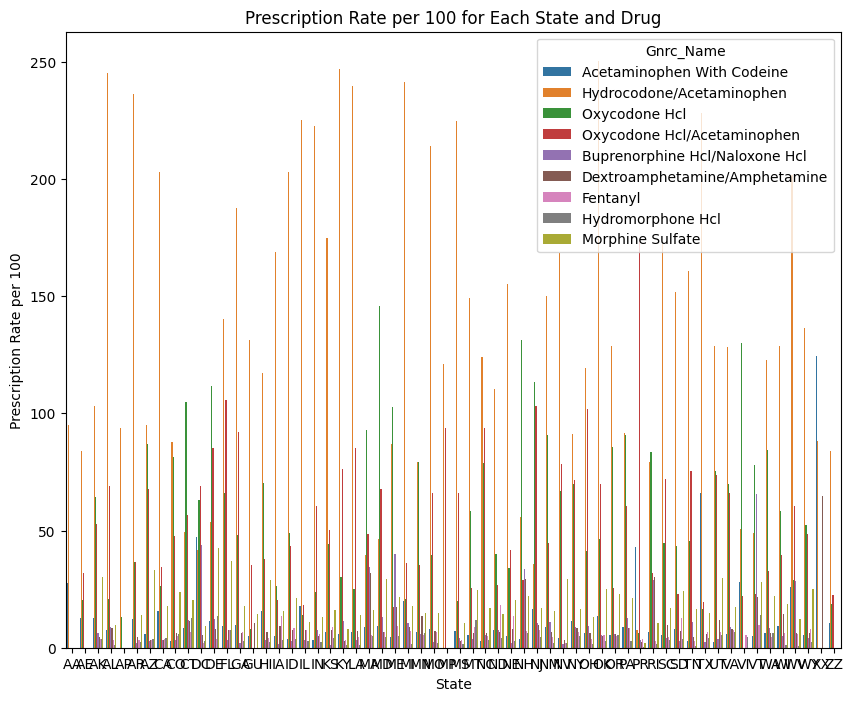

In [22]:
import seaborn as sns

# Group the data by state and drug name
grouped = df.groupby(['Prscrbr_State_Abrvtn', 'Gnrc_Name']).sum()

# Calculate prescription rate per 100 people
grouped['prescription_rate_per_100'] = (df.groupby(['Prscrbr_State_Abrvtn', 'Gnrc_Name'])['Tot_Clms'].sum() / df.groupby('Prscrbr_State_Abrvtn')['Tot_Benes'].sum()) * 100

# Reset the index
grouped = grouped.reset_index()

# Plot a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='Prscrbr_State_Abrvtn', y='prescription_rate_per_100', hue='Gnrc_Name', data=grouped)
plt.title('Prescription Rate per 100 for Each State and Drug')
plt.xlabel('State')
plt.ylabel('Prescription Rate per 100')
plt.show()

In [23]:
grouped = grouped.sort_values(by='prescription_rate_per_100', ascending=False)
top_3 = grouped.groupby('Prscrbr_State_Abrvtn').head(3)
top_3

Prscrbr_State_Abrvtn                    Gnrc_Name    Prscrbr_NPI  \
344                   OK    Hydrocodone/Acetaminophen  1946713936565   
171                   KY    Hydrocodone/Acetaminophen  3454018068257   
19                    AL    Hydrocodone/Acetaminophen  3833360192250   
216                   MI    Hydrocodone/Acetaminophen  6954214631584   
180                   LA    Hydrocodone/Acetaminophen  3290003993699   
..                   ...                          ...            ...   
148                   IL  Oxycodone Hcl/Acetaminophen   836181495359   
140                   IL   Acetaminophen With Codeine  1639597237177   
110                   GU             Morphine Sulfate     1063517639   
25                    AP                Oxycodone Hcl     1184004392   
371                   PR    Hydrocodone/Acetaminophen    40417906091   

     Tot_Clms  Tot_30day_Fills  Tot_Day_Suply  Tot_Drug_Cst  Tot_Benes  \
344    333601         334670.0        8139846    7782321.35    78043.0   
171    615866         616707.3       15058917   12883358.11   161505.0   
19     737263         738843.2       17386806   15263663.09   201107.0   
216    811669         816432.1       19296664   15082156.53   208648.0   
180    463800         464305.2       10546904    8218885.54   126511.0   
..        ...              ...            ...           ...        ...   
148     43781          43792.1        1060565    2095154.77    12930.0   
140     43111          43392.3         653041     543318.84    22744.0   
110        42             42.0           1260       3453.07       11.0   
25         27             27.0             43        162.46       27.0   
371      1676           1677.0          34377      30465.27      762.0   

     GE65_Tot_Clms  GE65_Tot_30day_Fills  GE65_Tot_Drug_Cst  \
344       205635.0              206446.5         4777057.02   
171       366792.0              367438.4         7477558.01   
19        442794.0              443862.6         8922552.36   
216       453741.0              457034.9         8173241.25   
180       272087.0              272429.0         4861650.88   
..             ...                   ...                ...   
148        18837.0               18841.9          904508.63   
140        20962.0               21133.2          264659.75   
110            0.0                   0.0               0.00   
25             0.0                   0.0               0.00   
371         1033.0                1034.0           20705.75   

     GE65_Tot_Day_Suply  GE65_Tot_Benes  prescription_rate_per_100  
344           5044776.0         41412.0                 250.334679  
171           8873780.0         85859.0                 246.893516  
19           10351294.0        118471.0                 245.063255  
216          10782063.0         94734.0                 241.288806  
180           6285178.0         66524.0                 239.852303  
..                  ...             ...                        ...  
148            467630.0          2986.0                  18.171366  
140            328204.0          6246.0                  17.893282  
110                 0.0             0.0                  14.334471  
25                  0.0             0.0                  13.170732  
371             23524.0           318.0                   7.475802  

[177 rows x 14 columns]

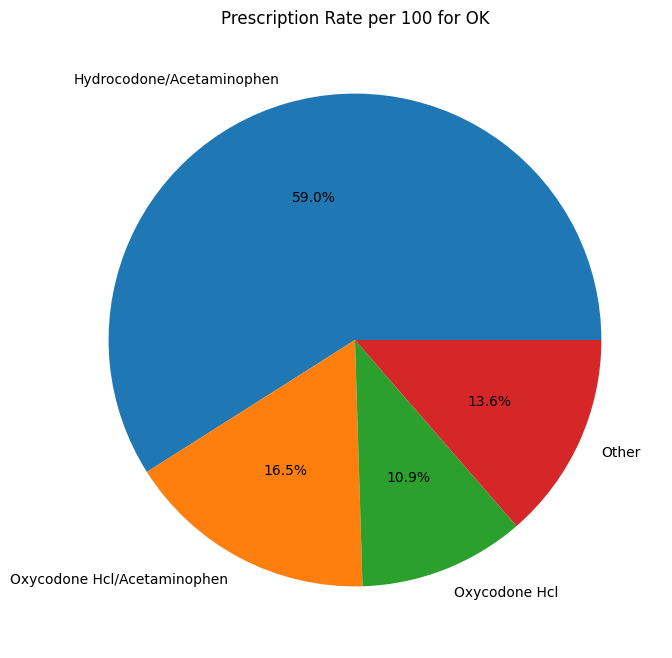

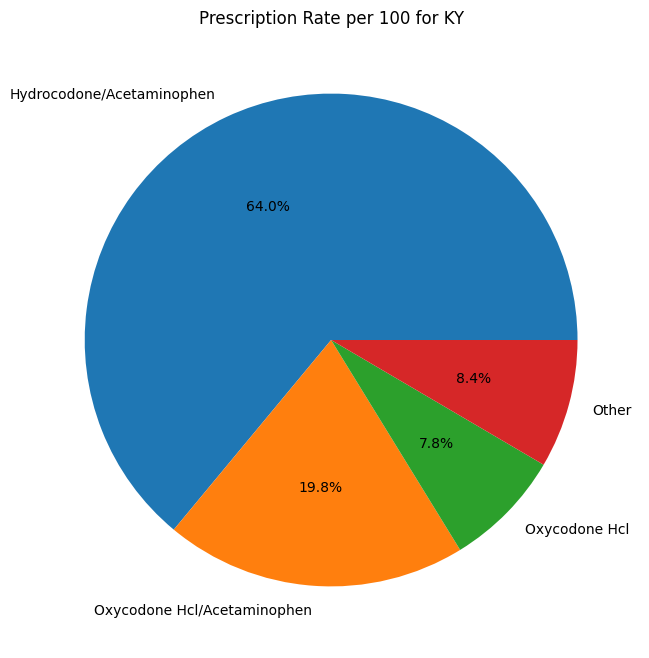

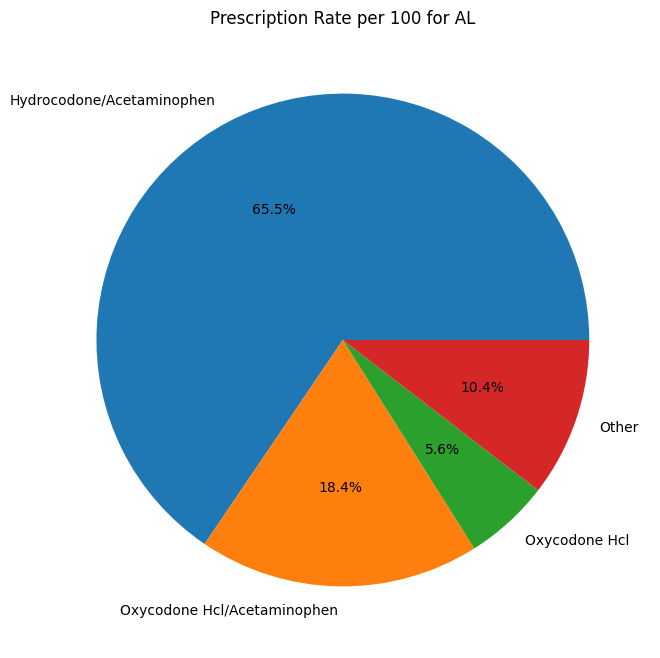

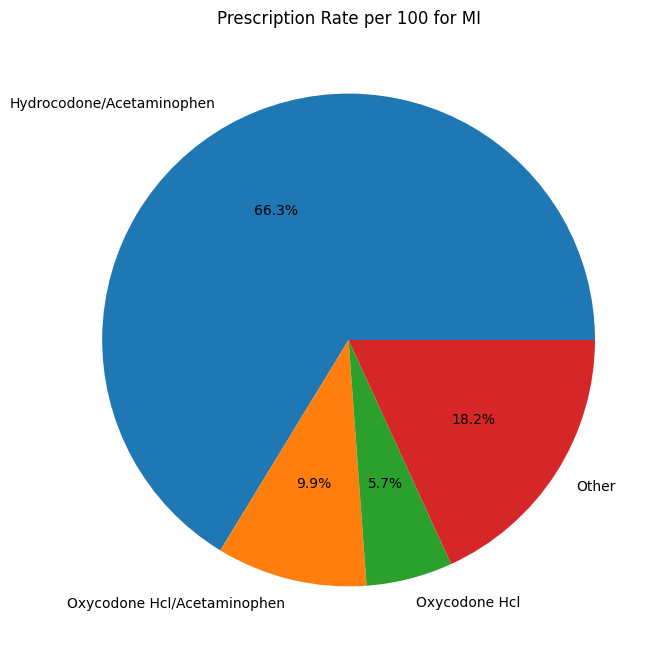

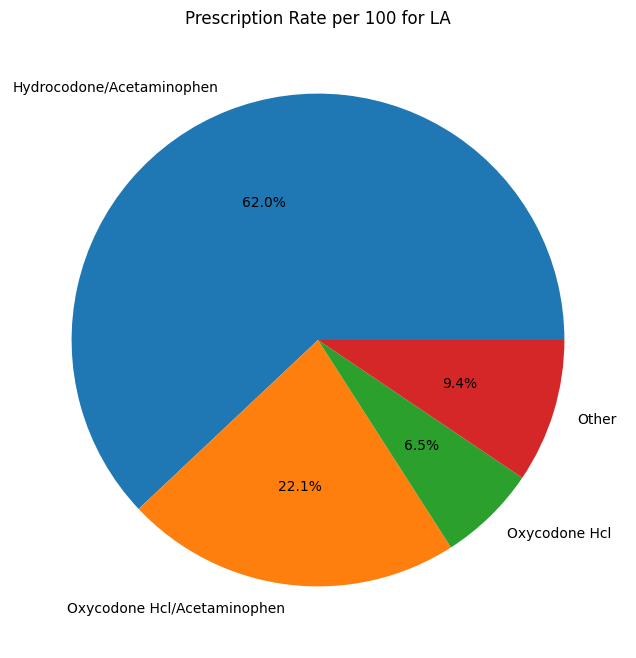

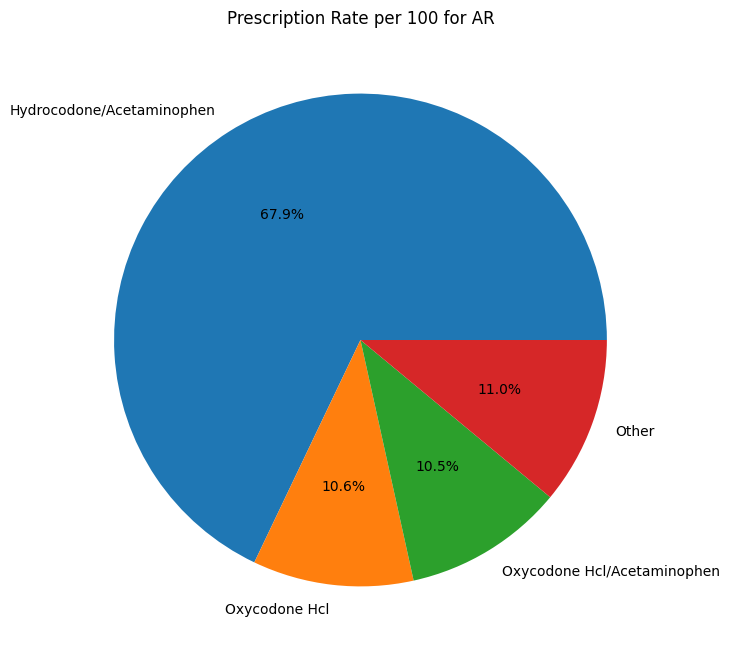

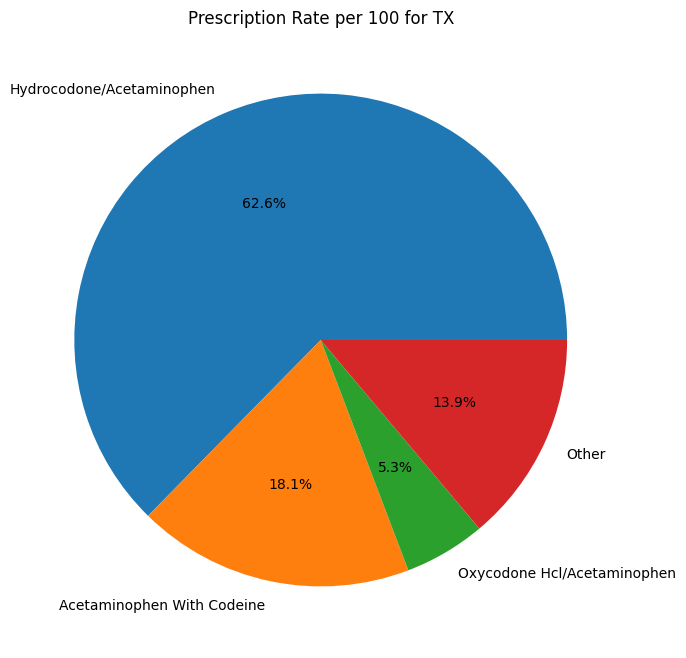

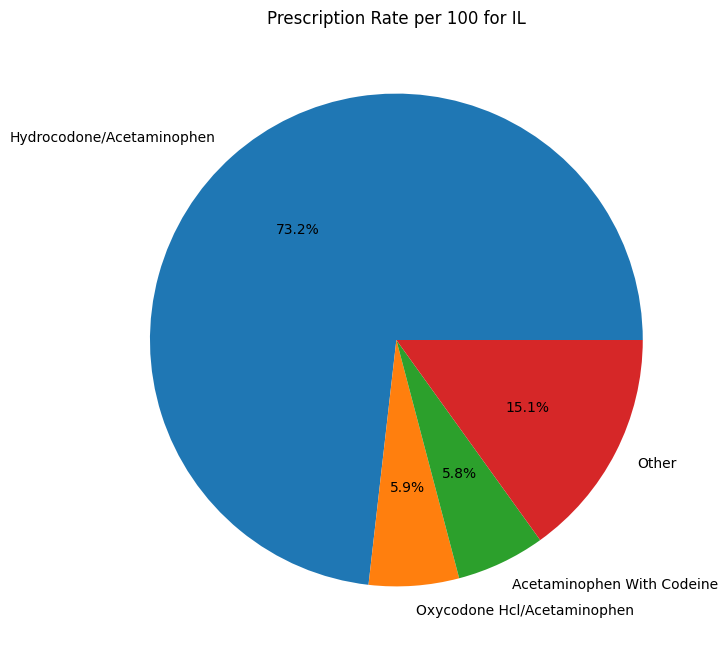

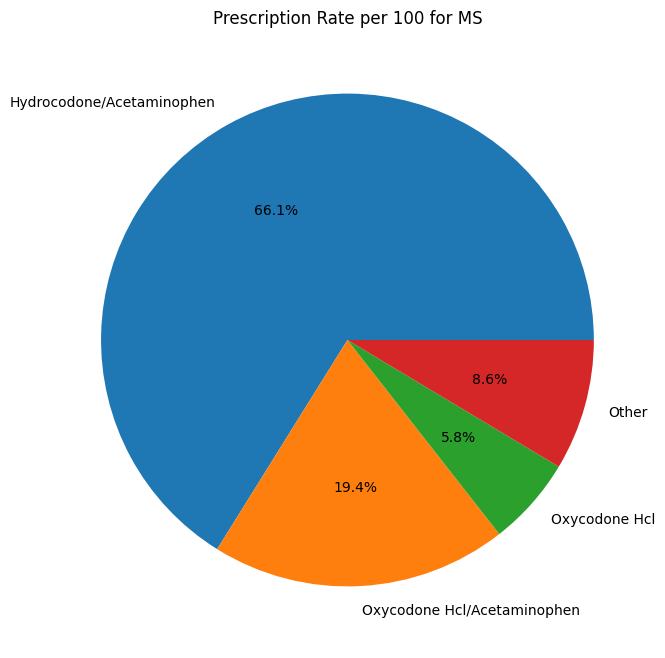

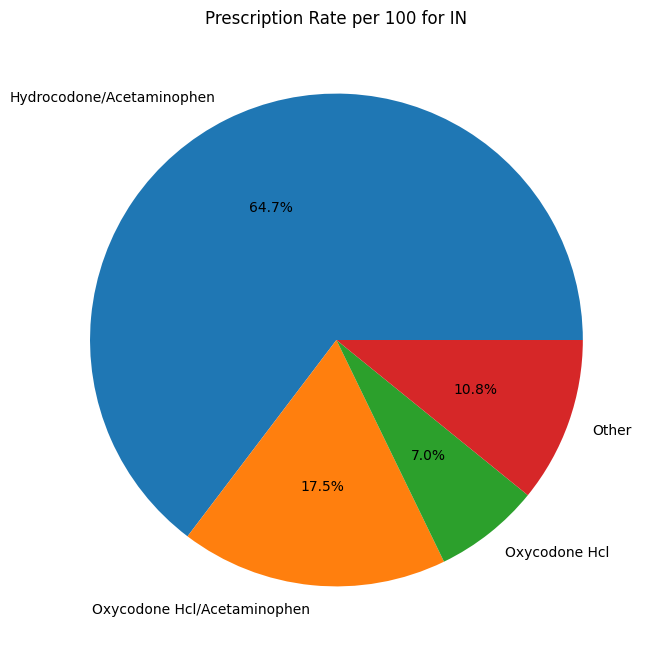

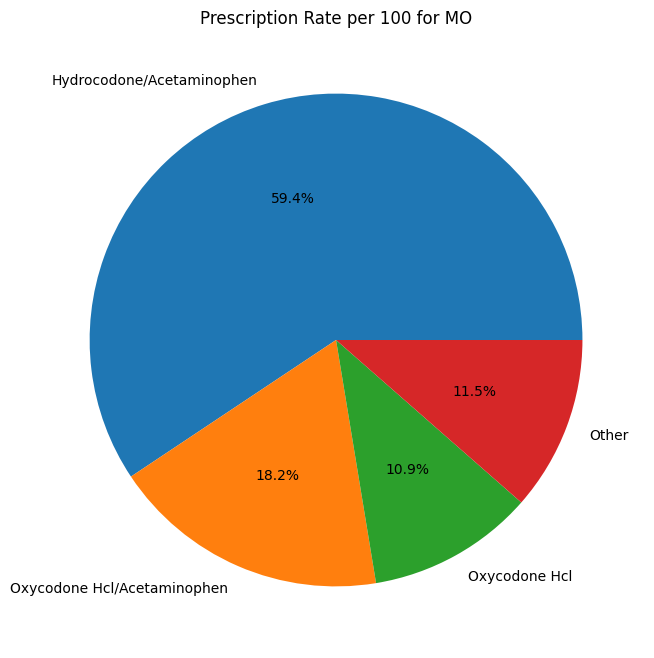

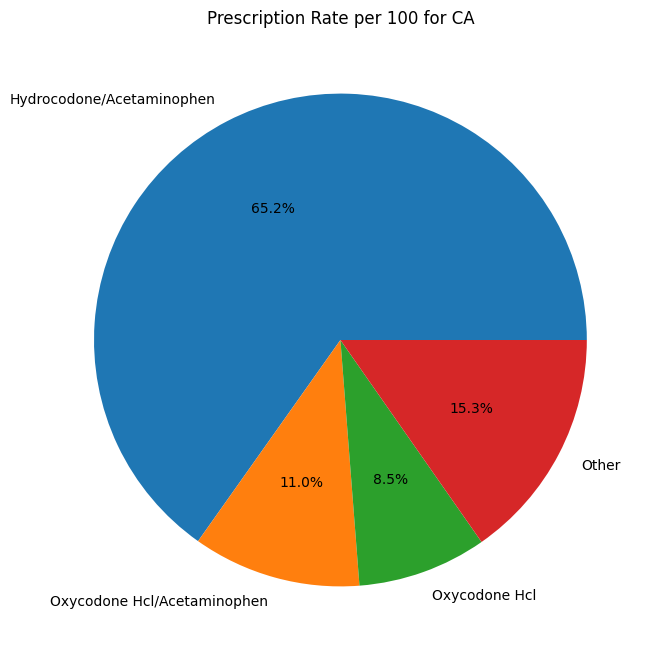

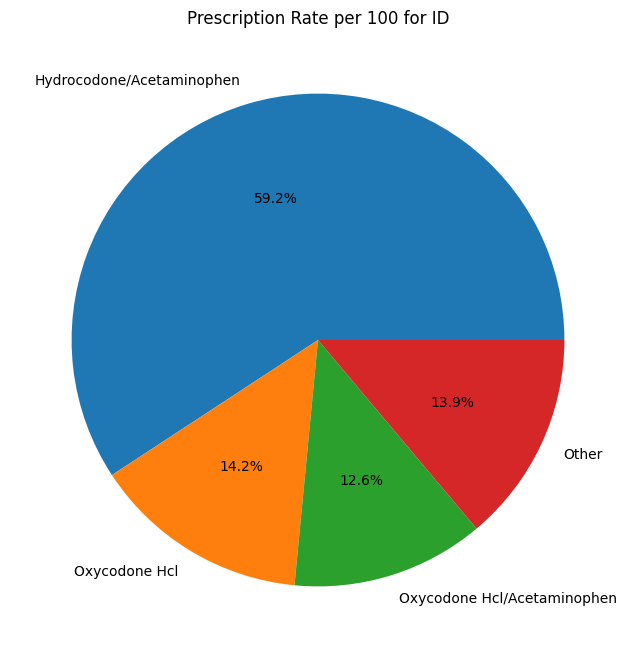

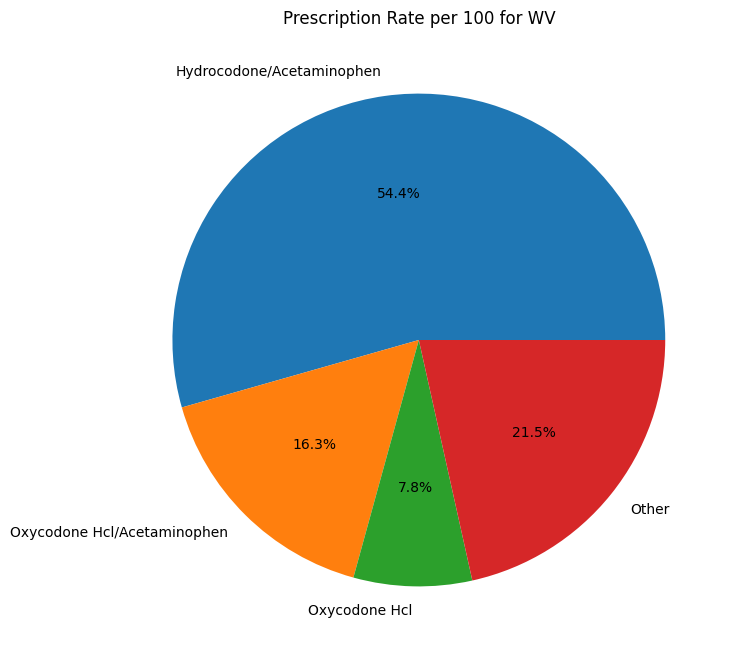

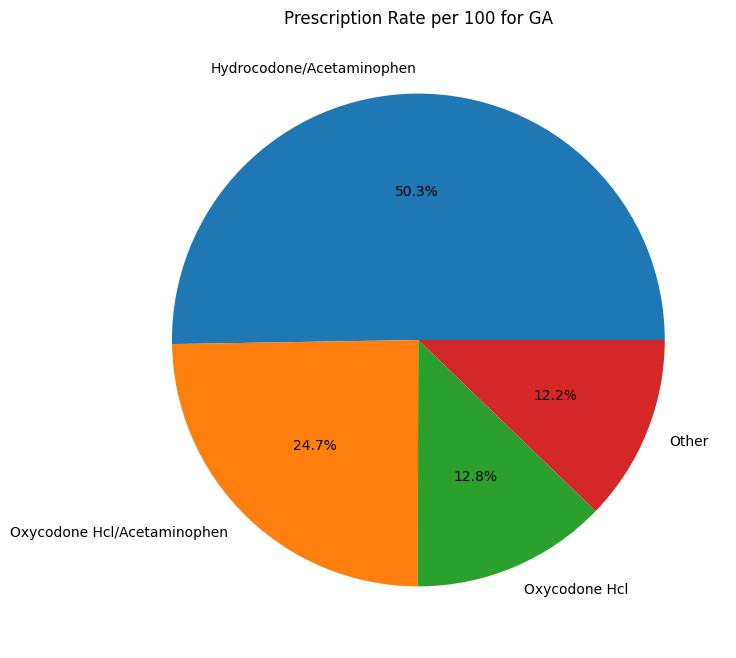

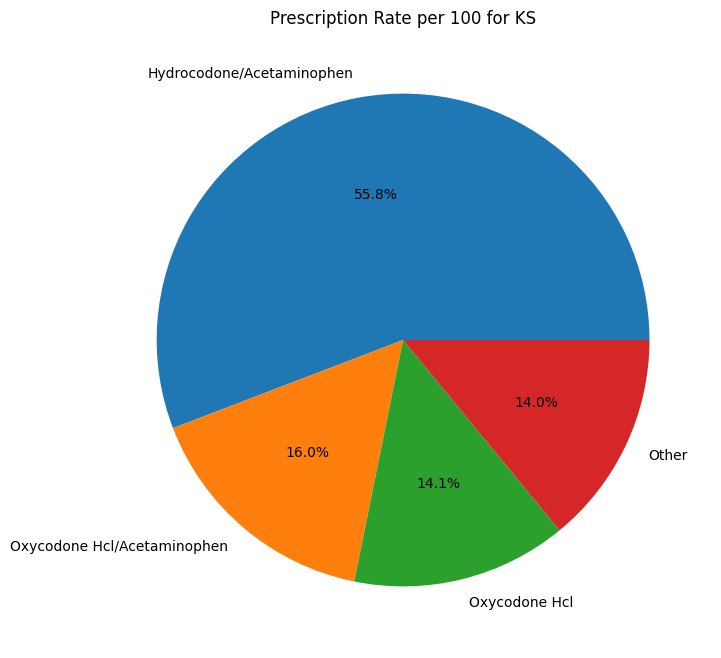

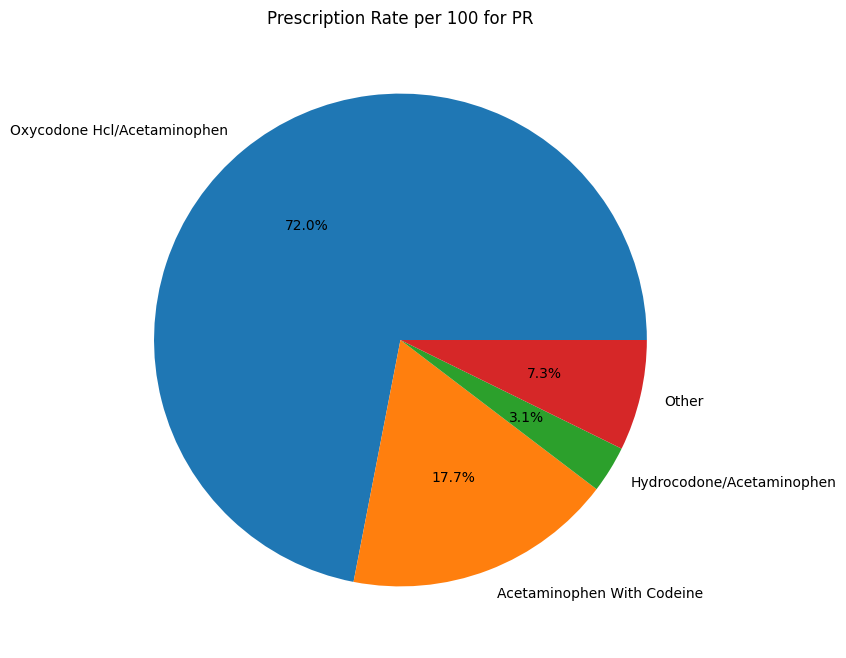

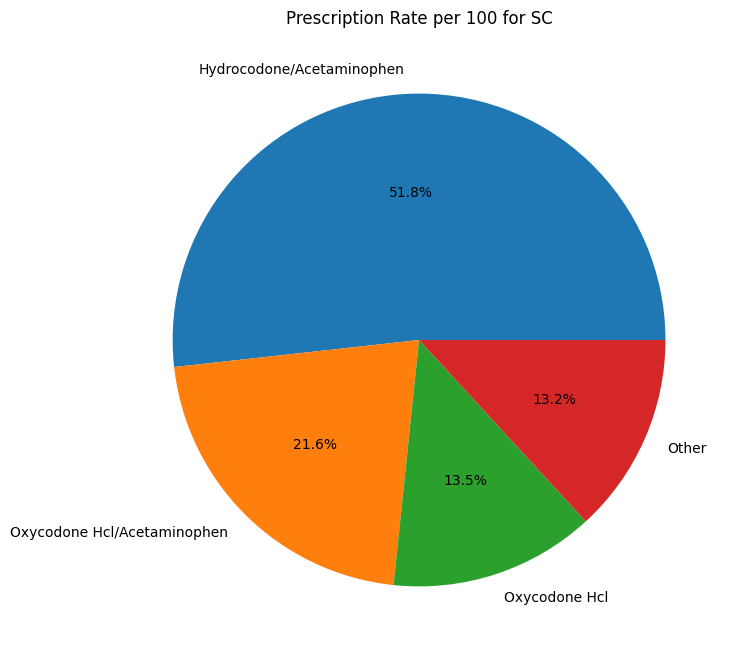

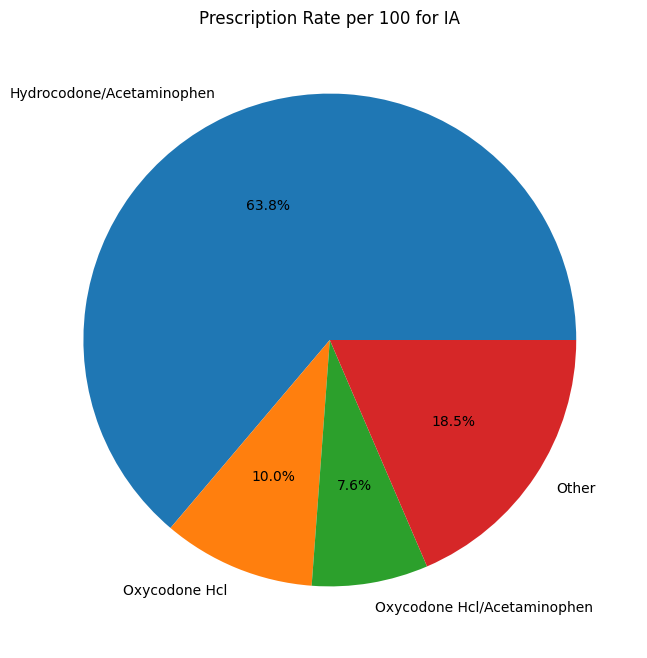

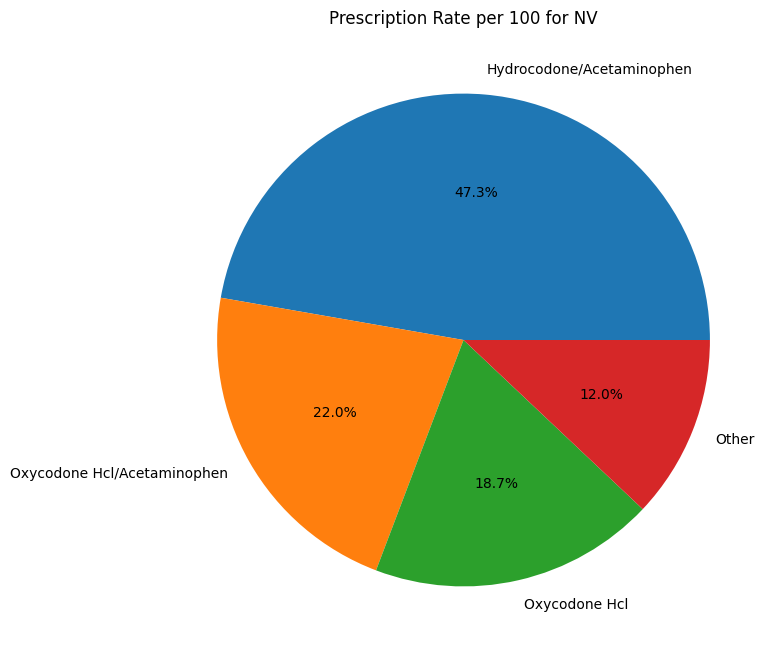

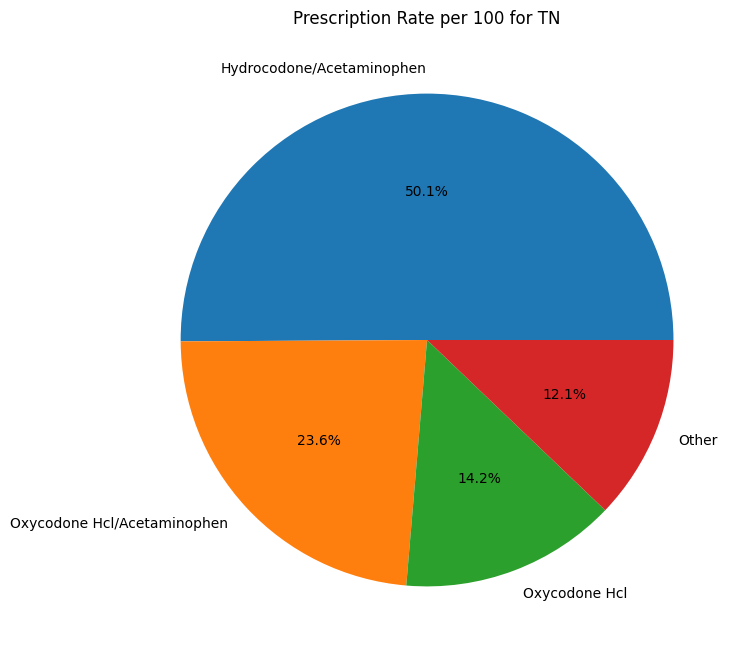

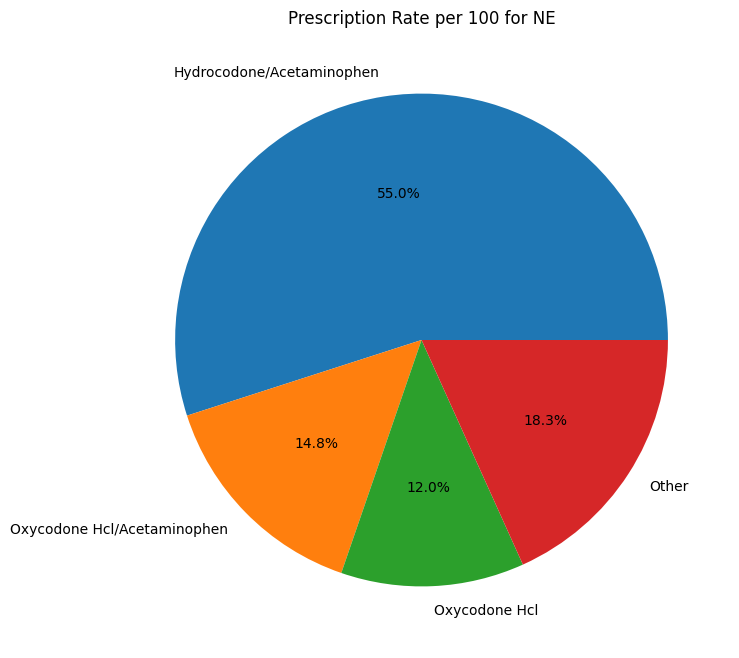

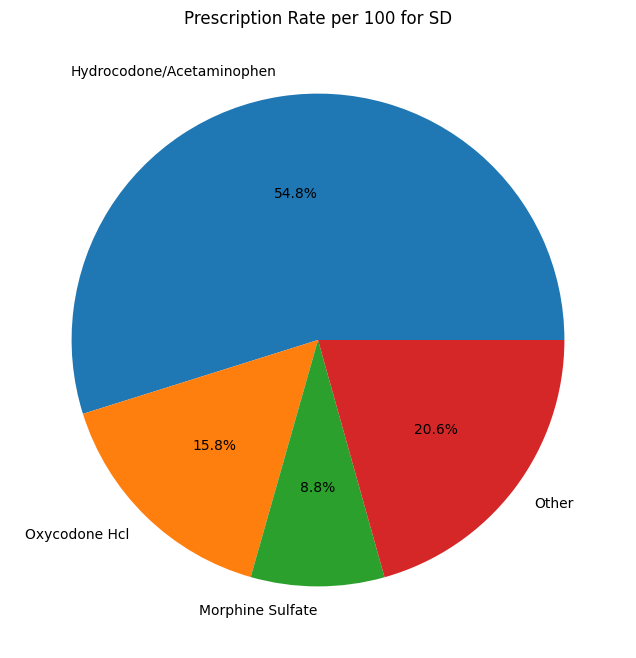

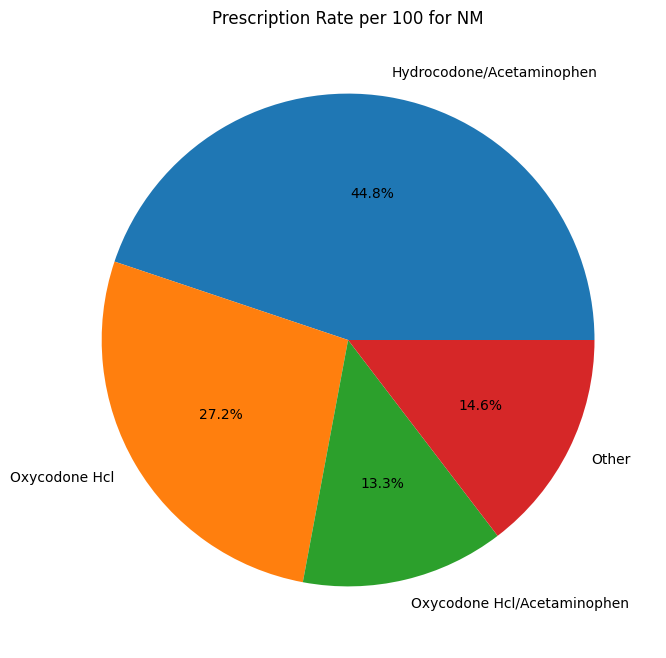

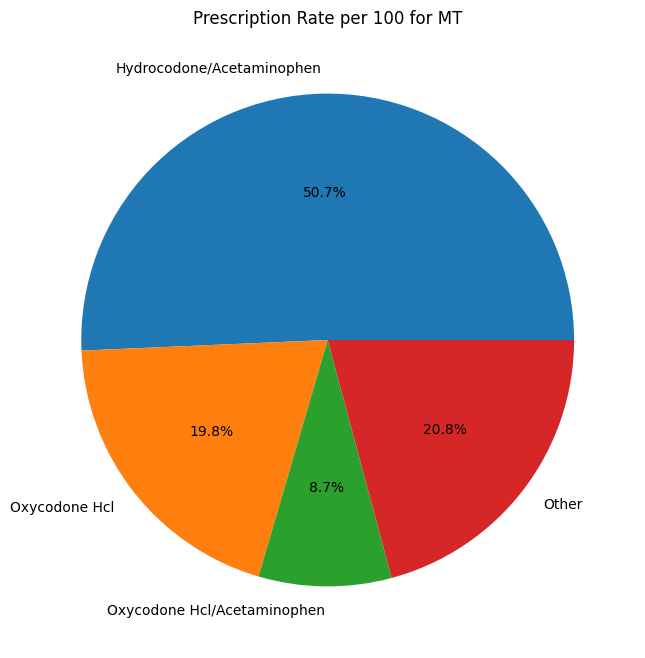

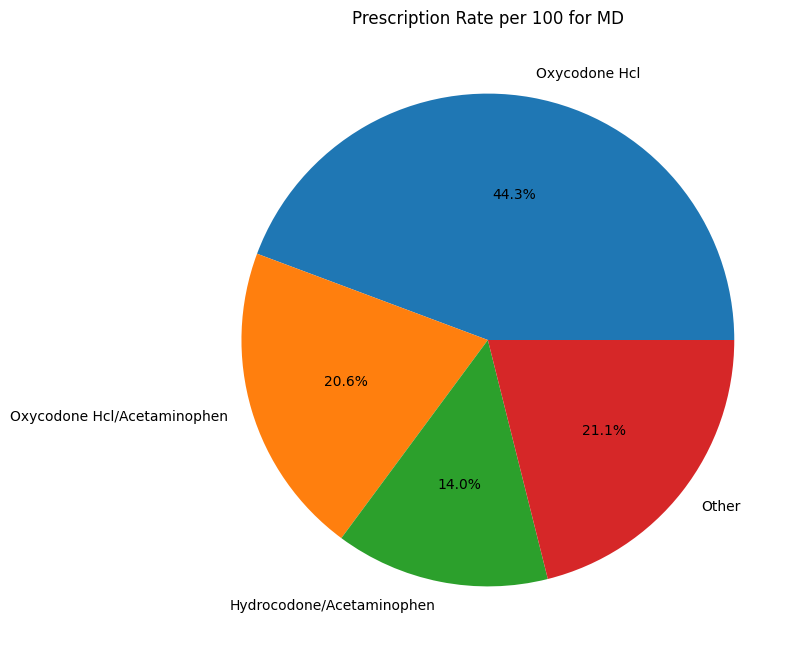

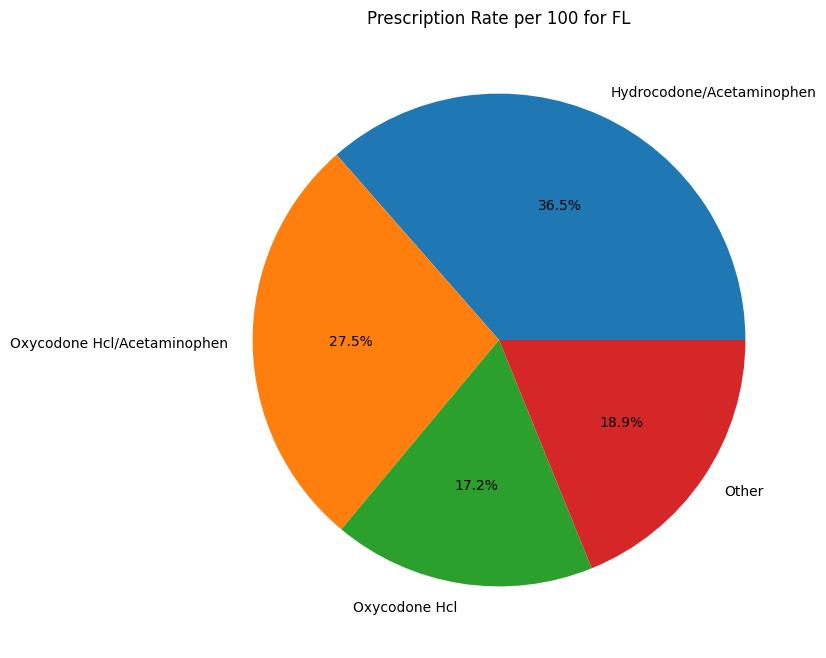

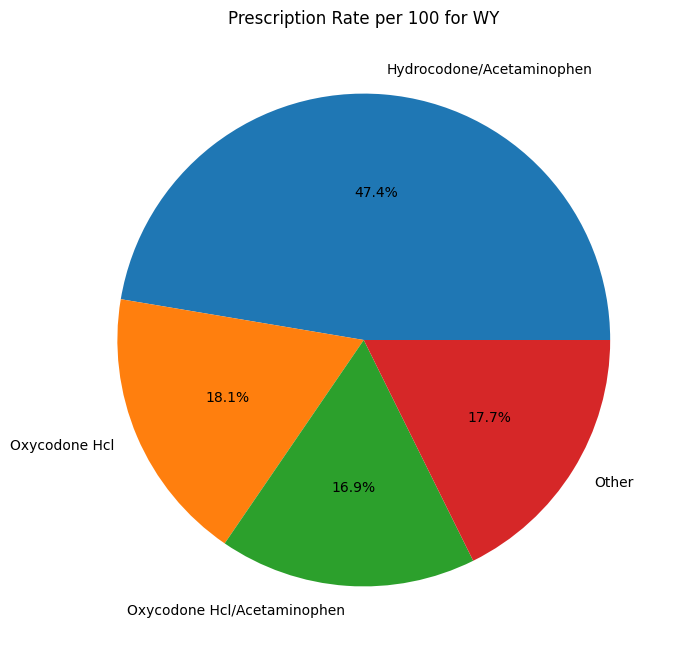

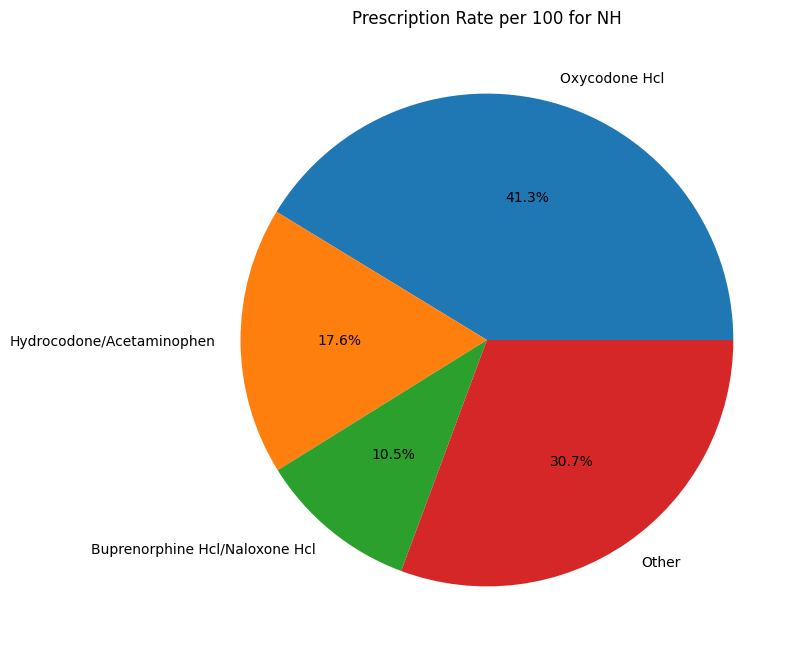

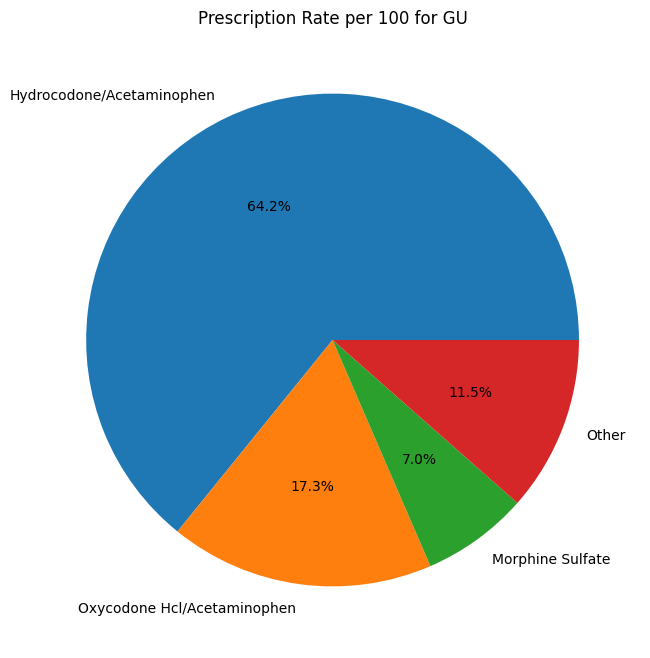

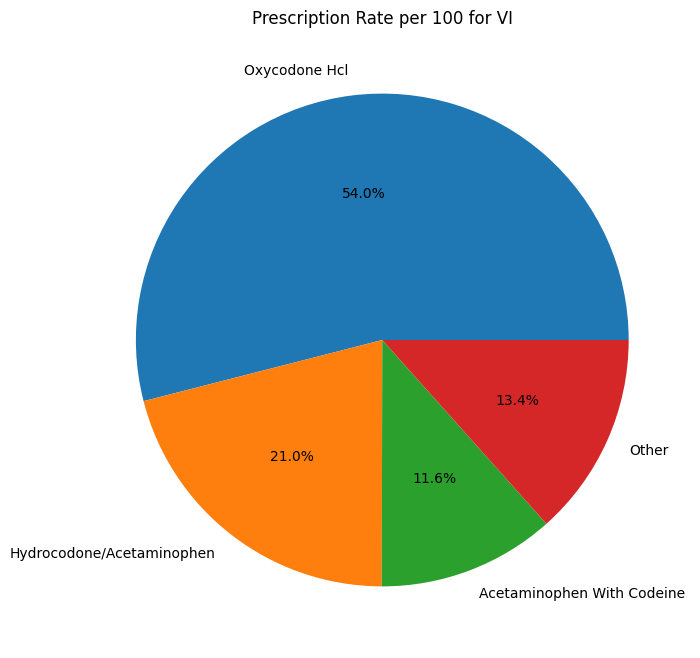

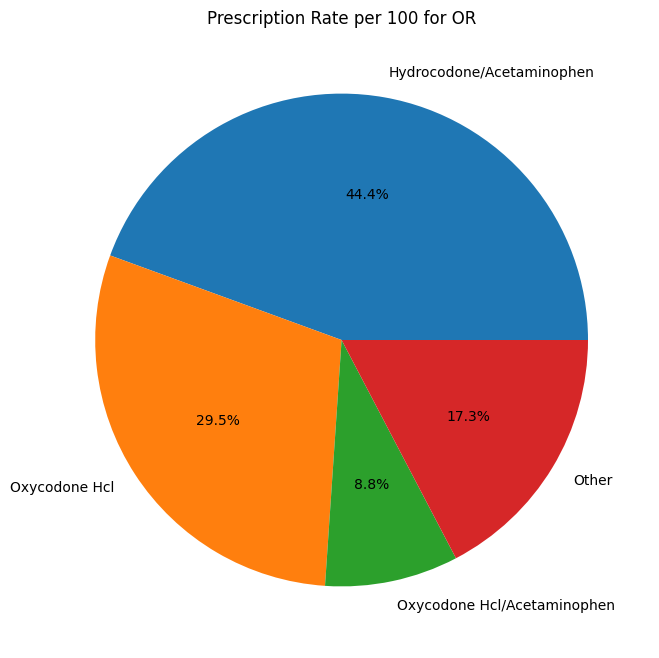

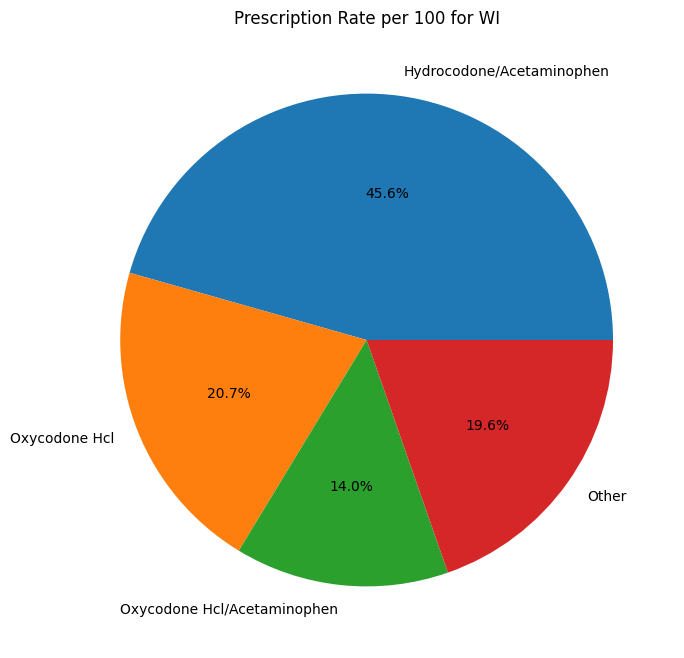

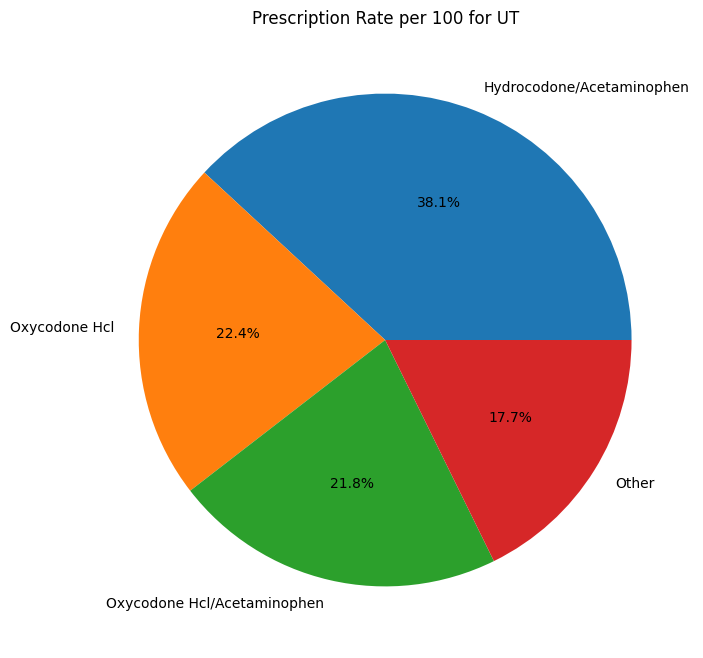

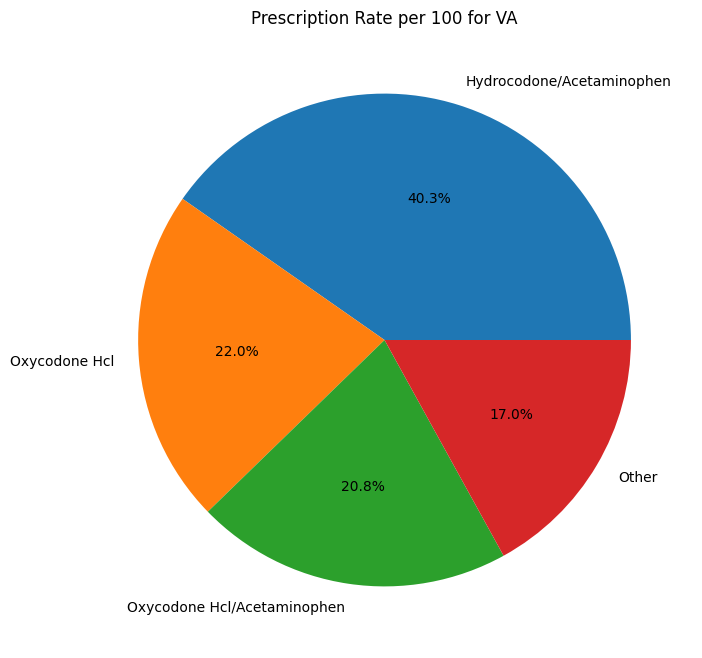

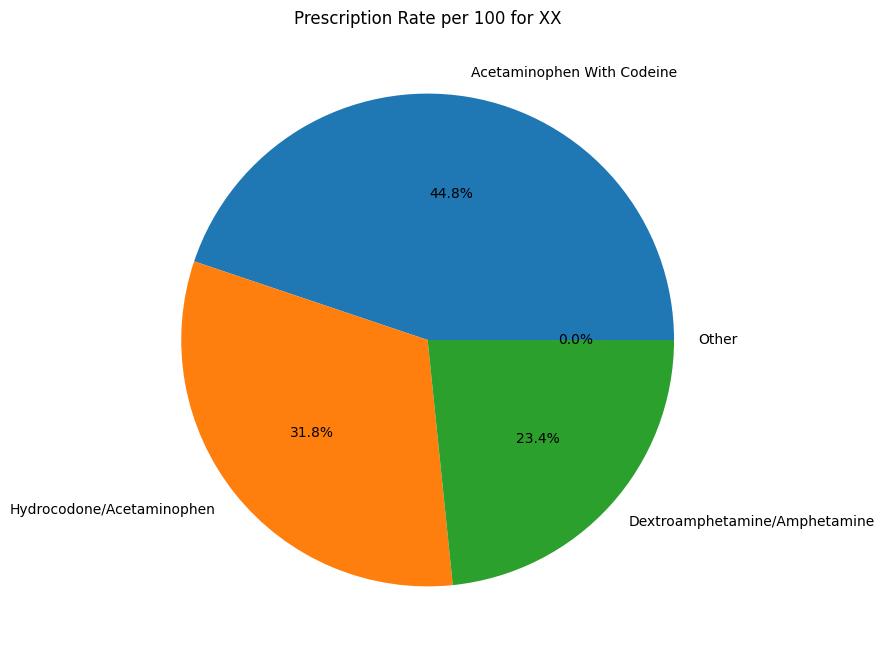

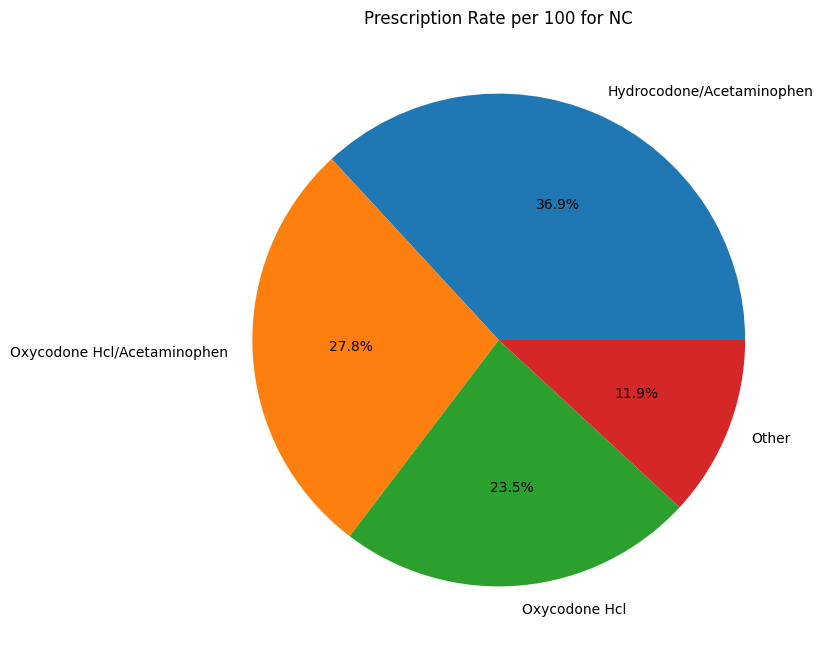

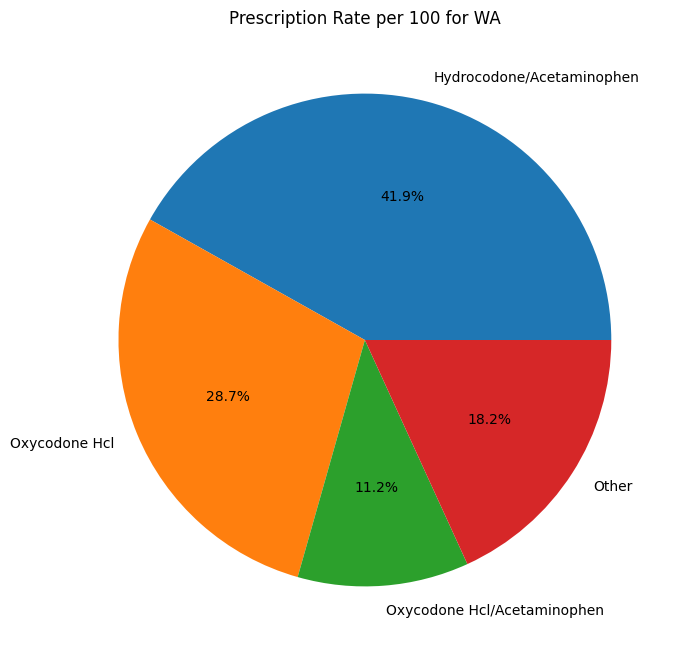

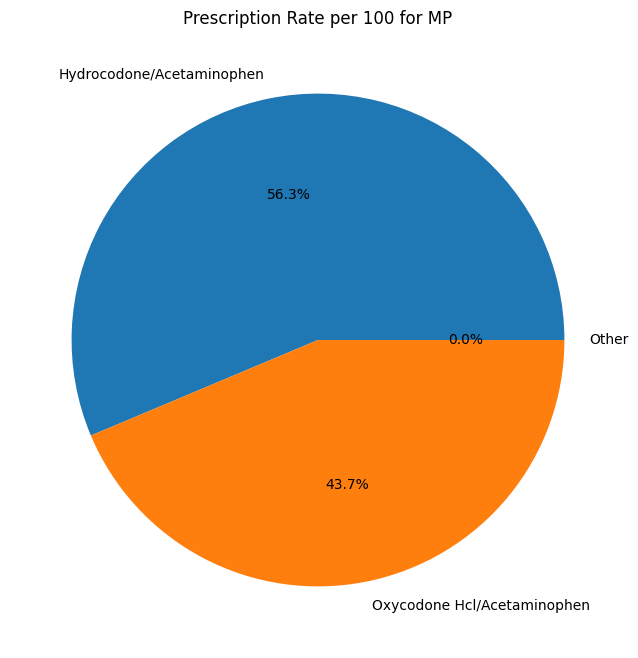

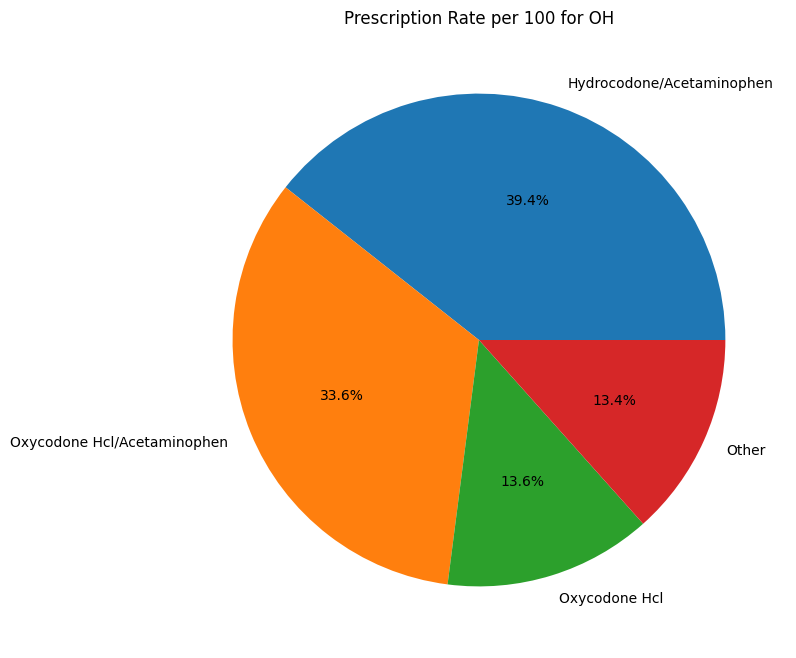

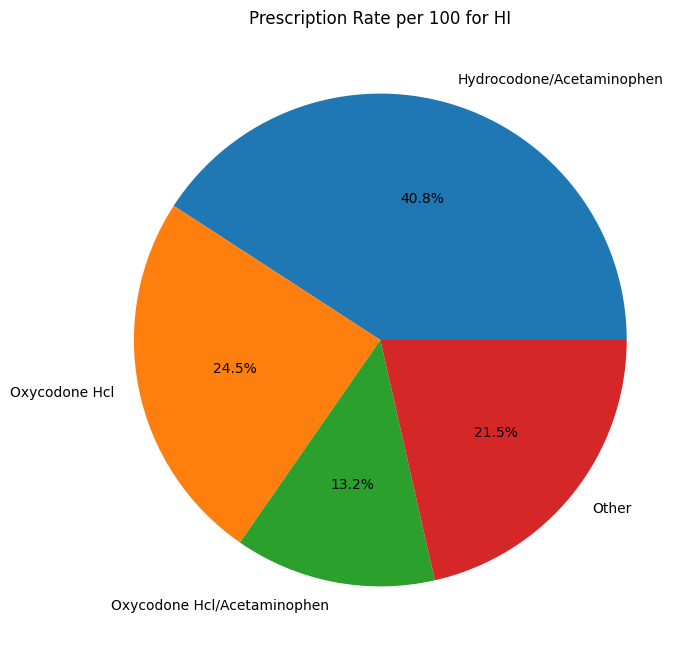

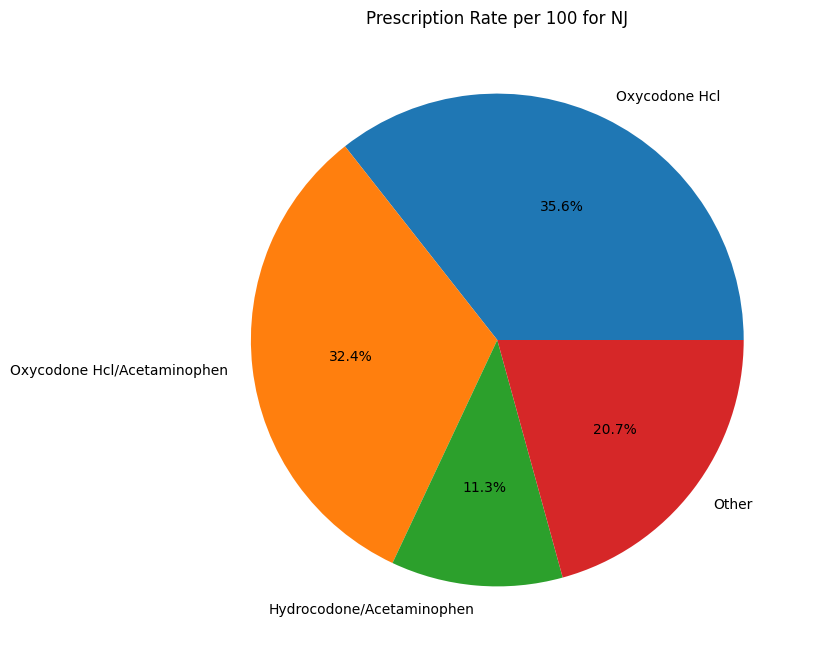

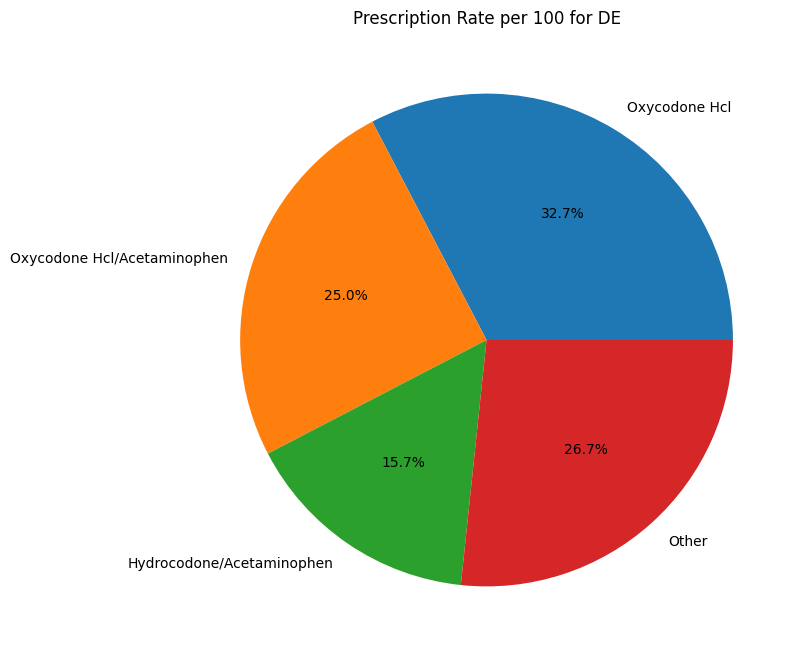

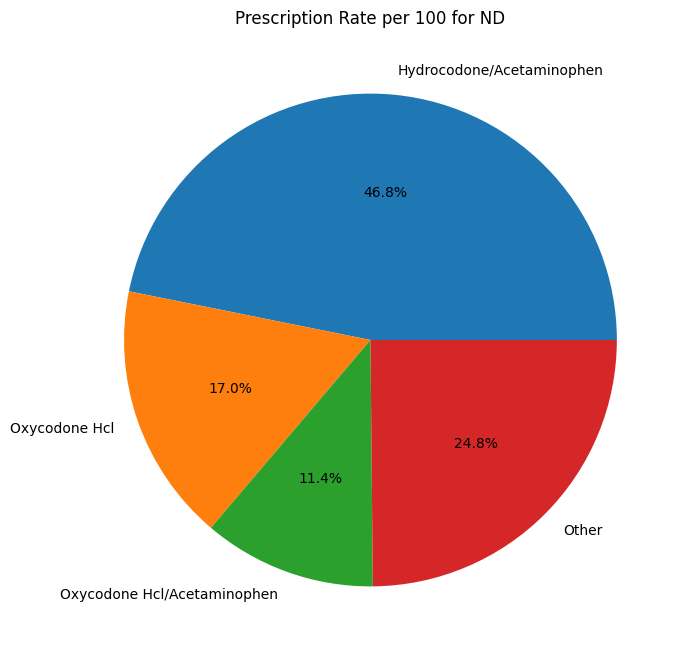

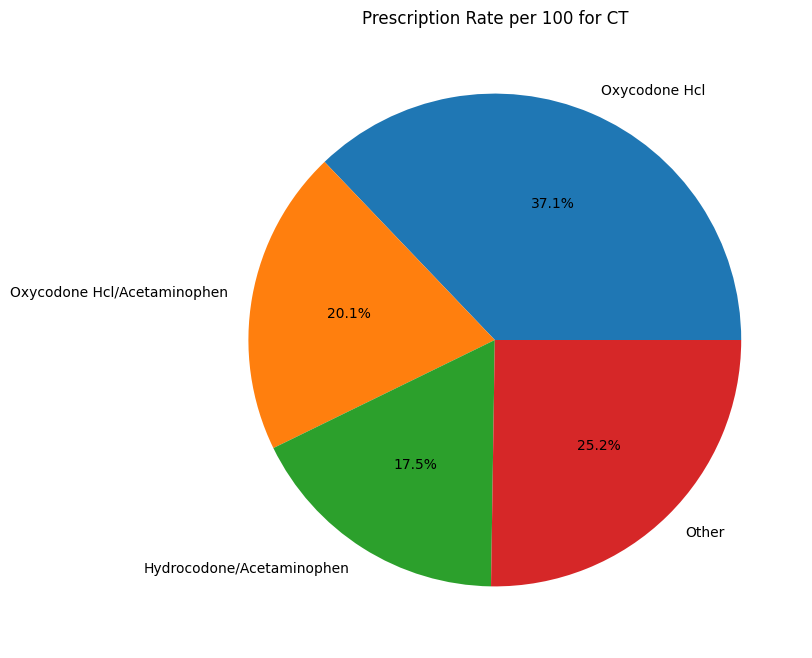

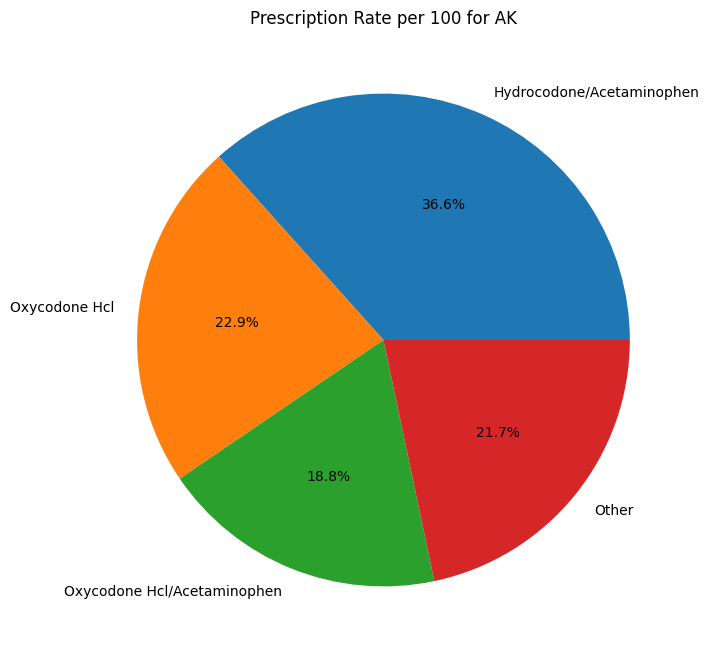

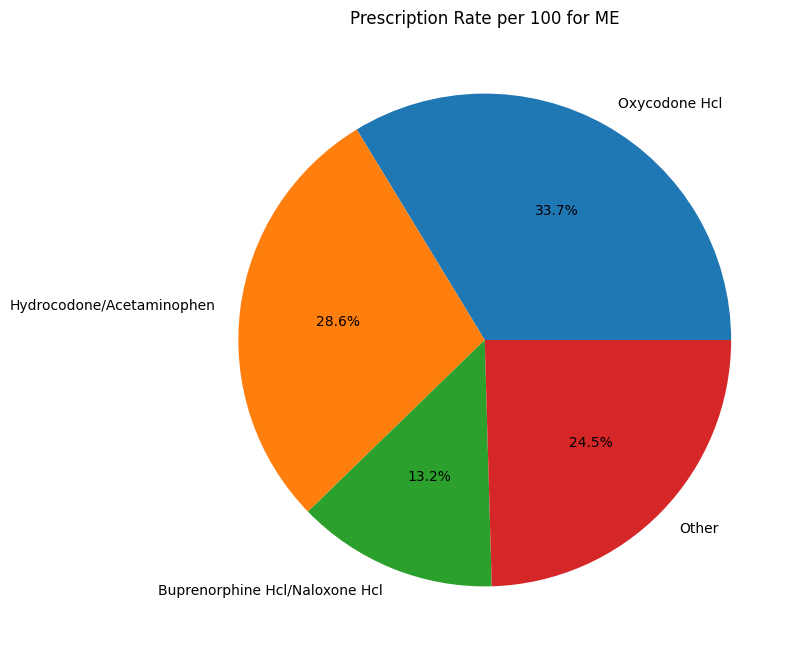

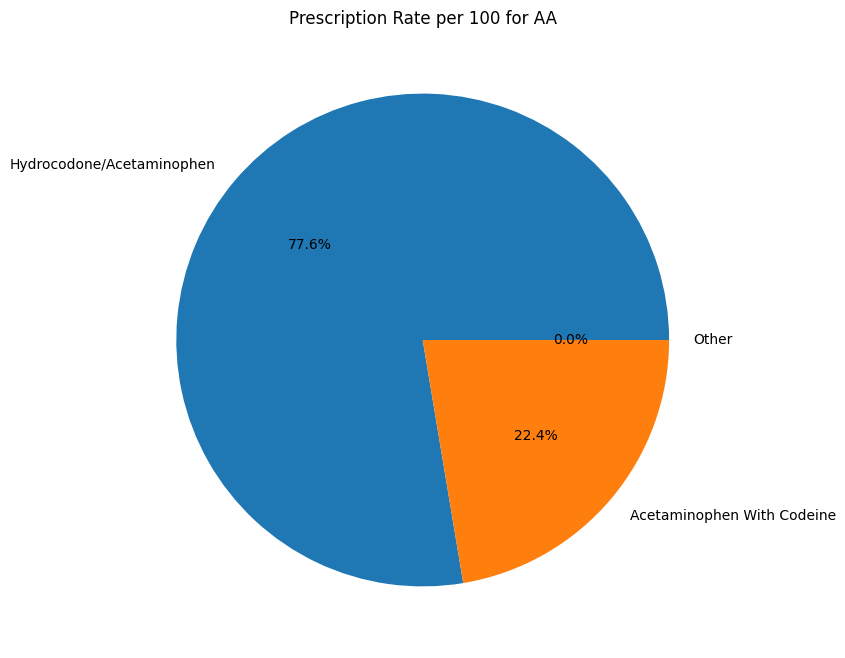

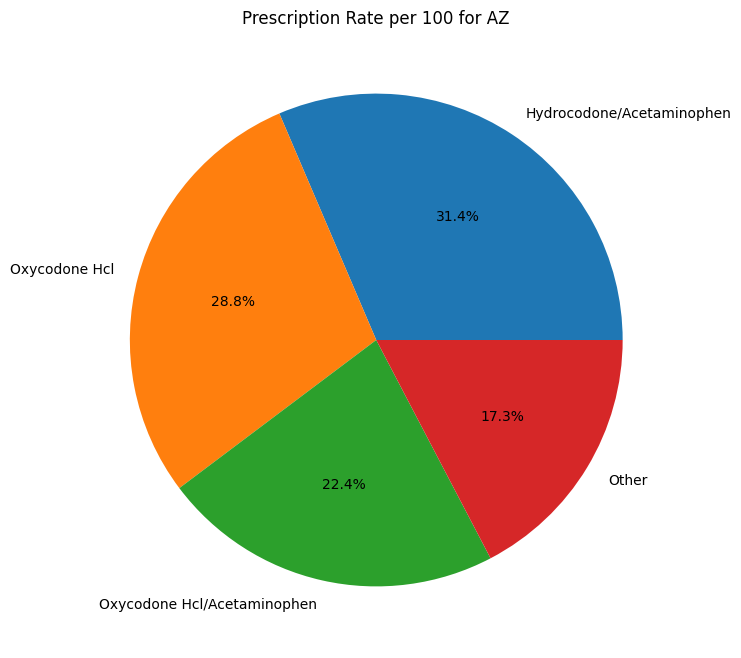

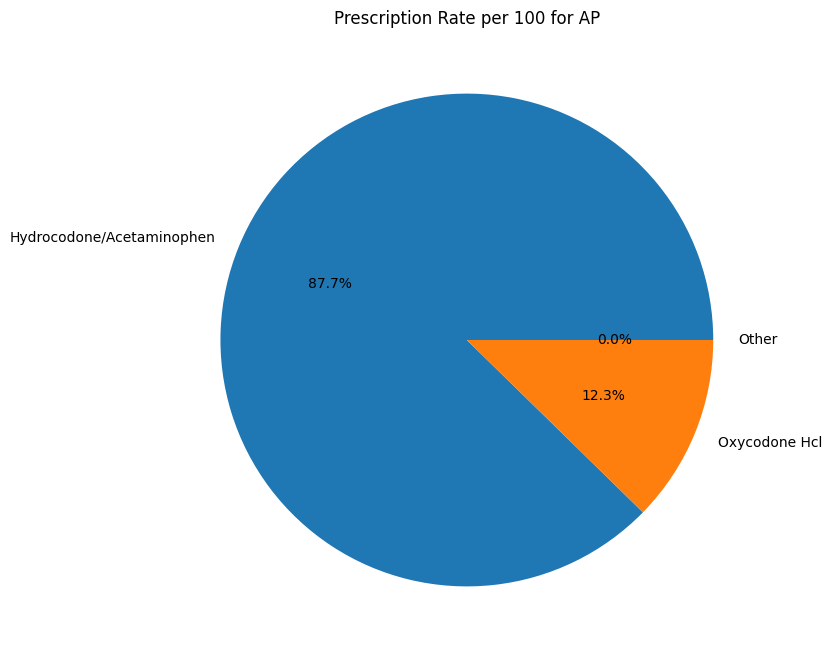

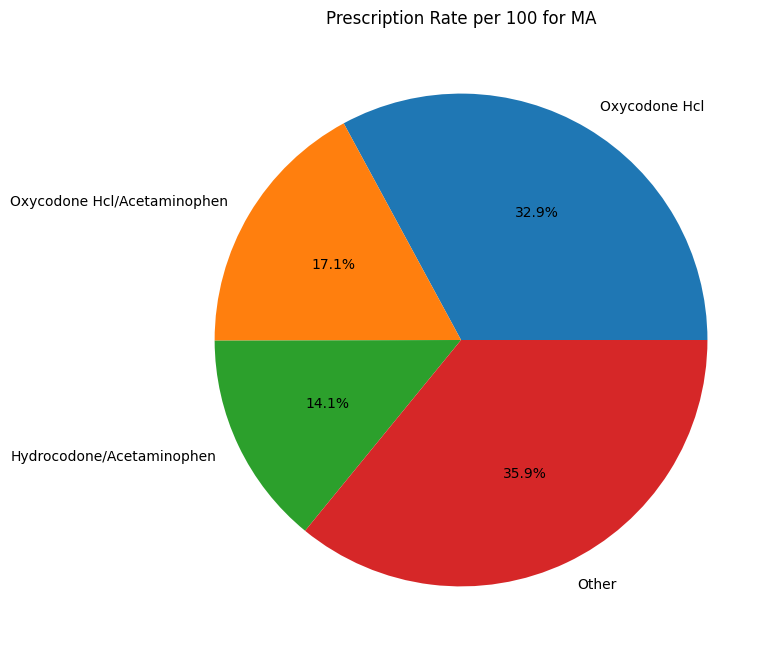

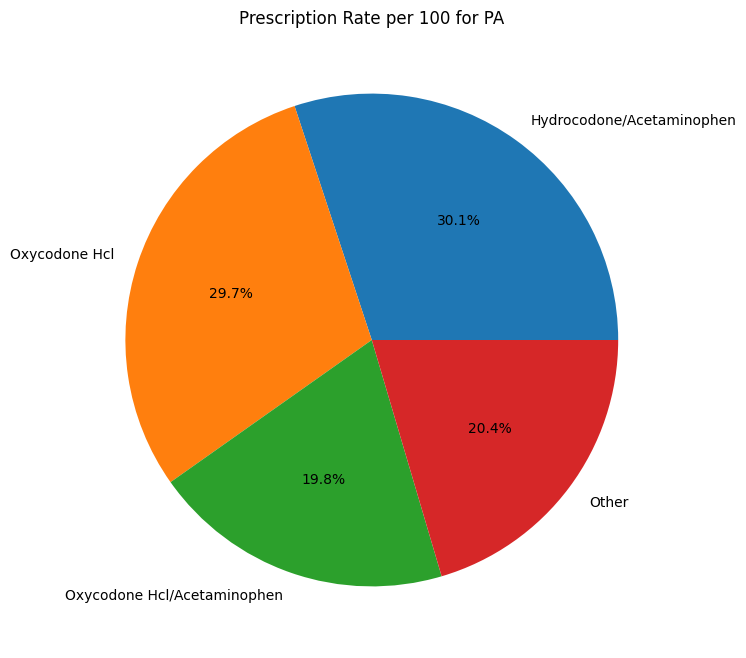

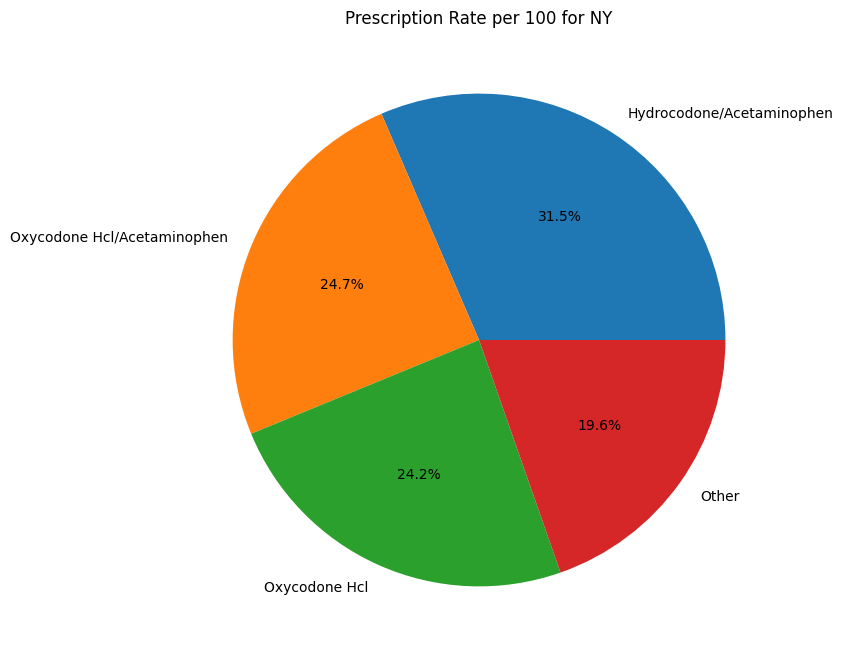

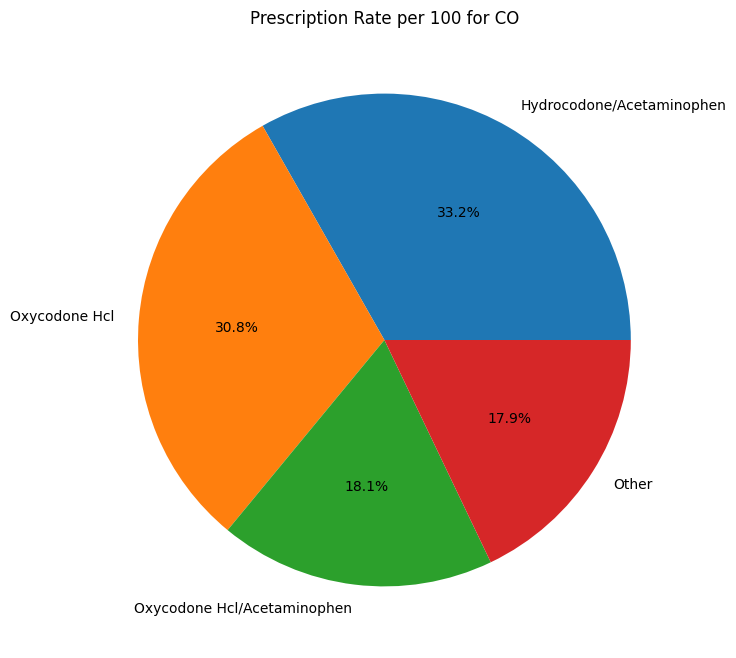

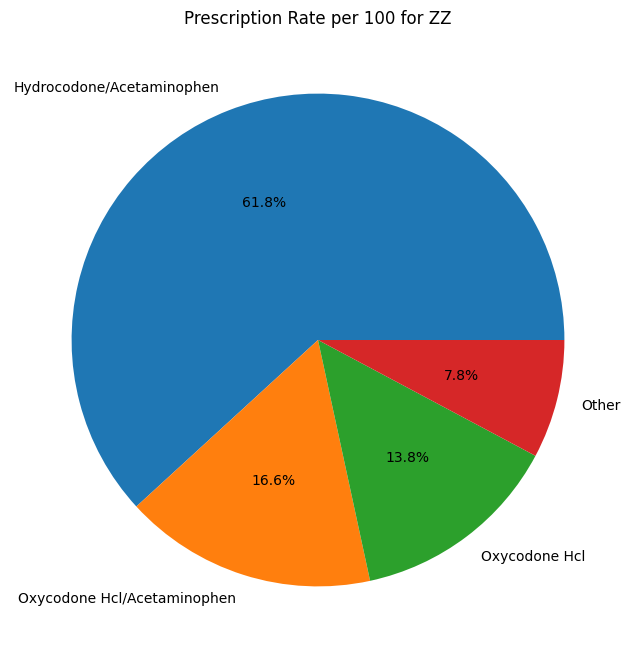

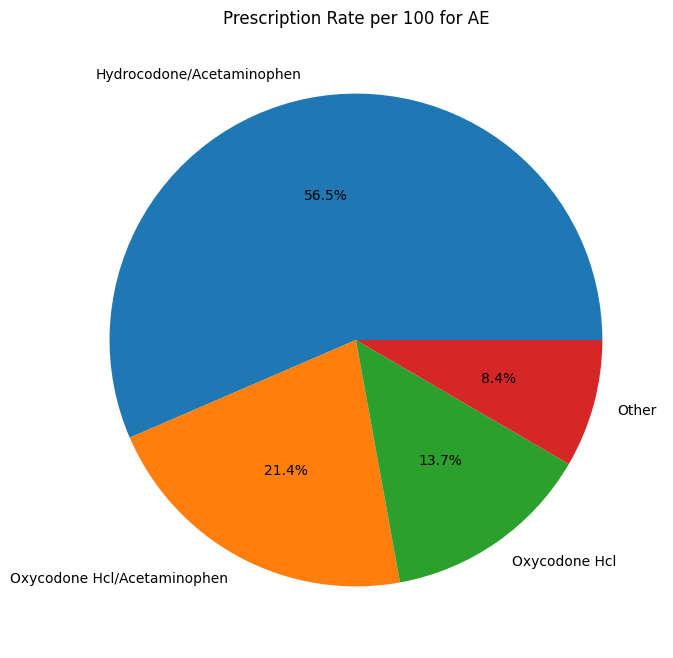

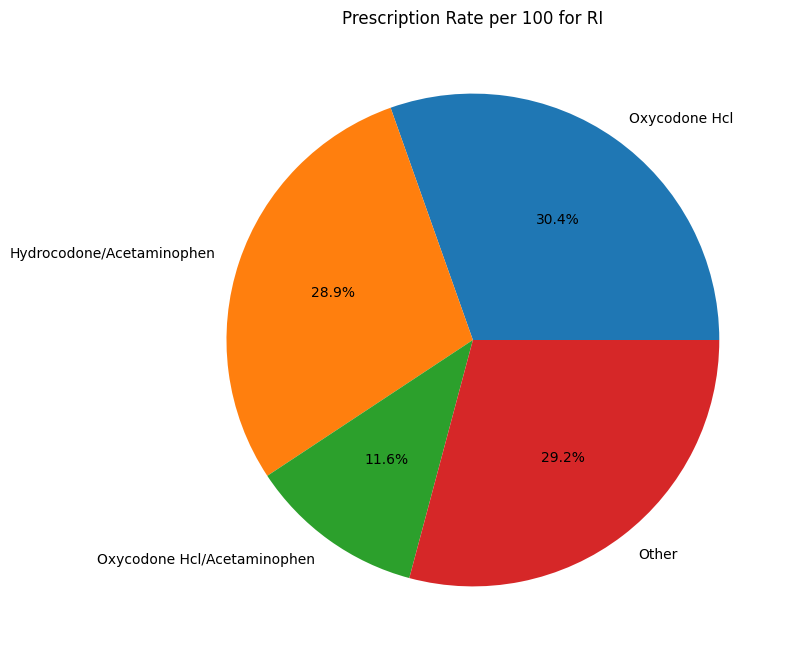

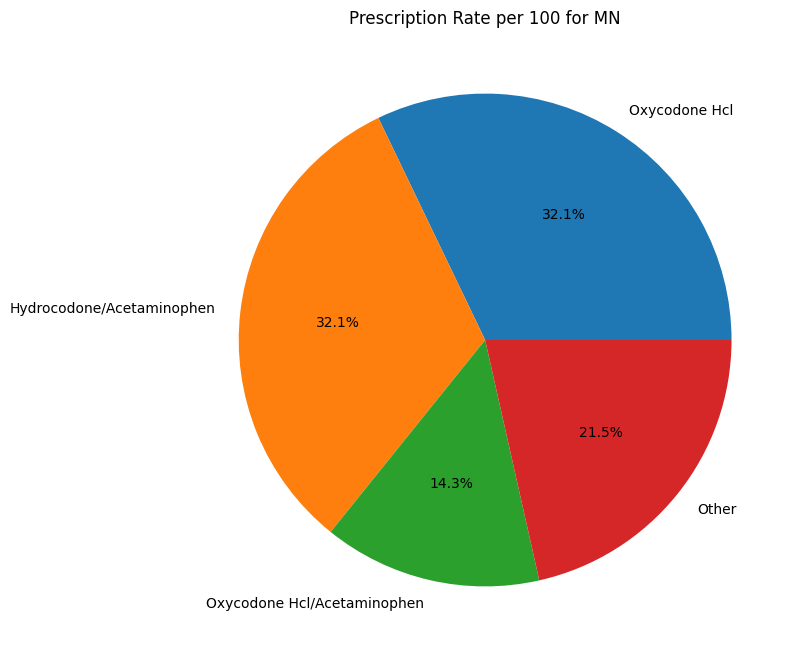

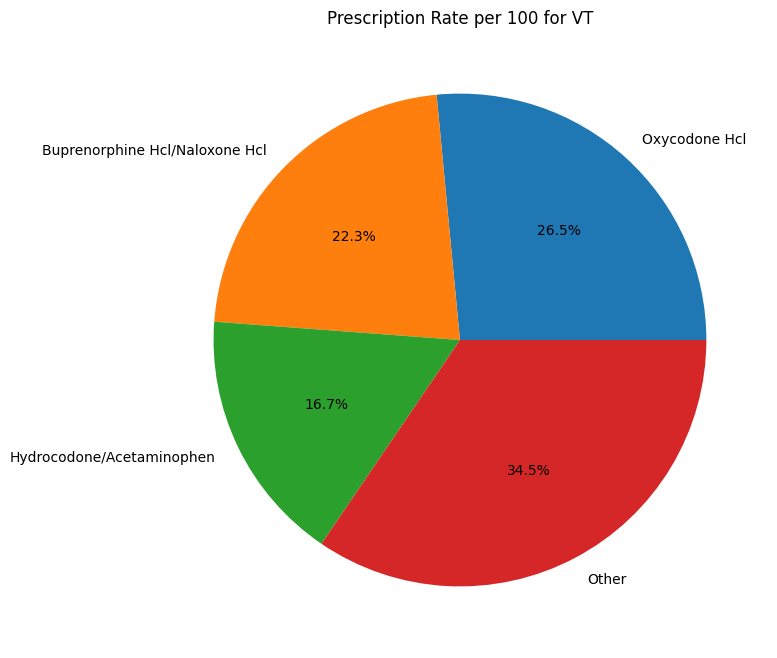

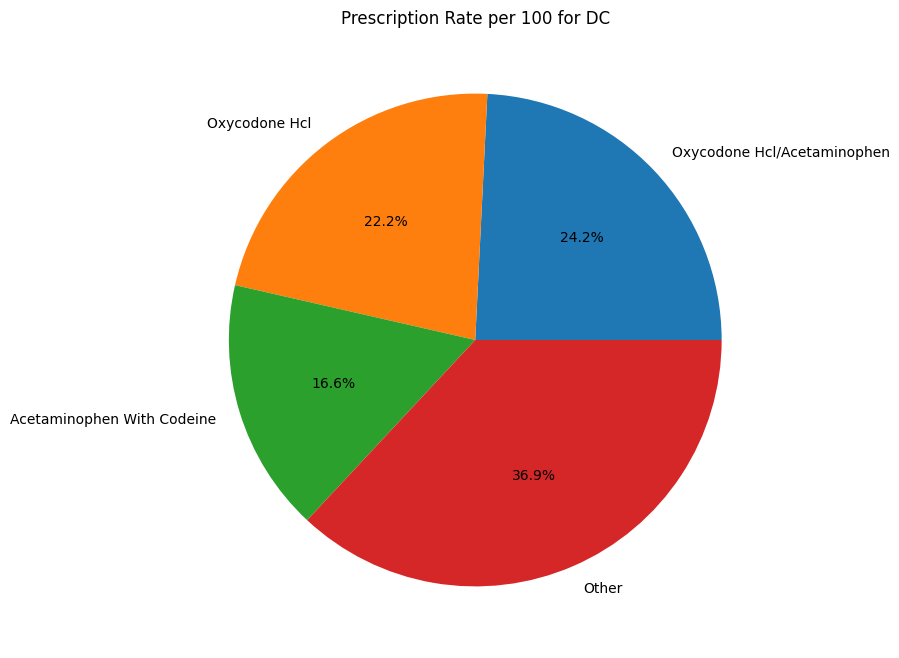

In [24]:
for state in top_3['Prscrbr_State_Abrvtn'].unique():
    state_data = top_3[top_3['Prscrbr_State_Abrvtn'] == state]
    other_data = grouped[~grouped['Gnrc_Name'].isin(state_data['Gnrc_Name'])]
    other_rate = other_data[other_data['Prscrbr_State_Abrvtn'] == state]['prescription_rate_per_100'].sum()
    state_data = state_data.append({'Gnrc_Name': 'Other', 'prescription_rate_per_100': other_rate}, ignore_index=True)
    plt.figure(figsize=(8, 8))
    plt.pie(state_data['prescription_rate_per_100'], labels=state_data['Gnrc_Name'], autopct='%1.1f%%')
    plt.title('Prescription Rate per 100 for ' + state)
    plt.show()


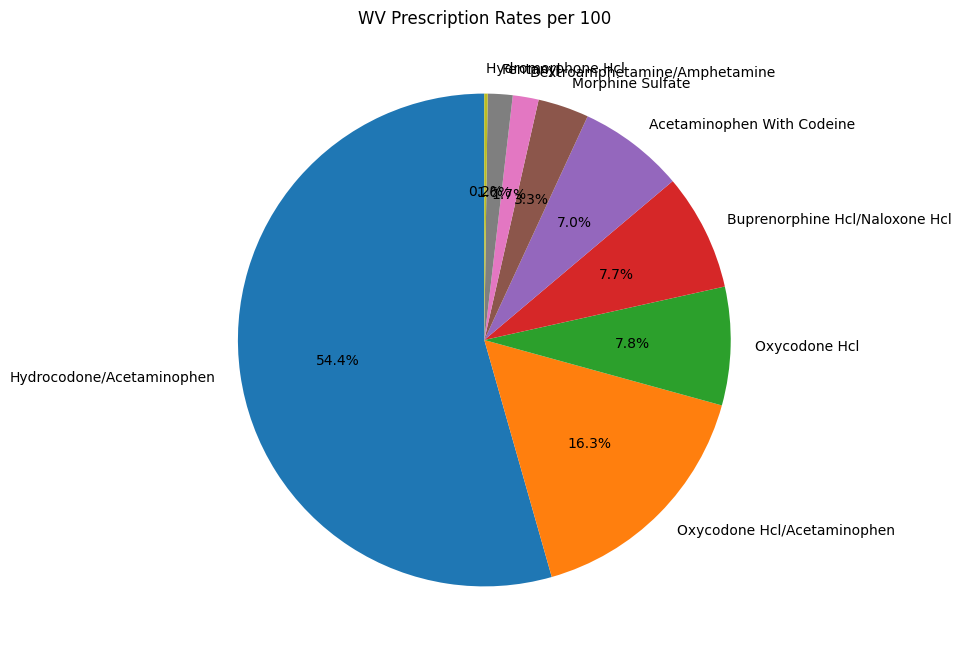

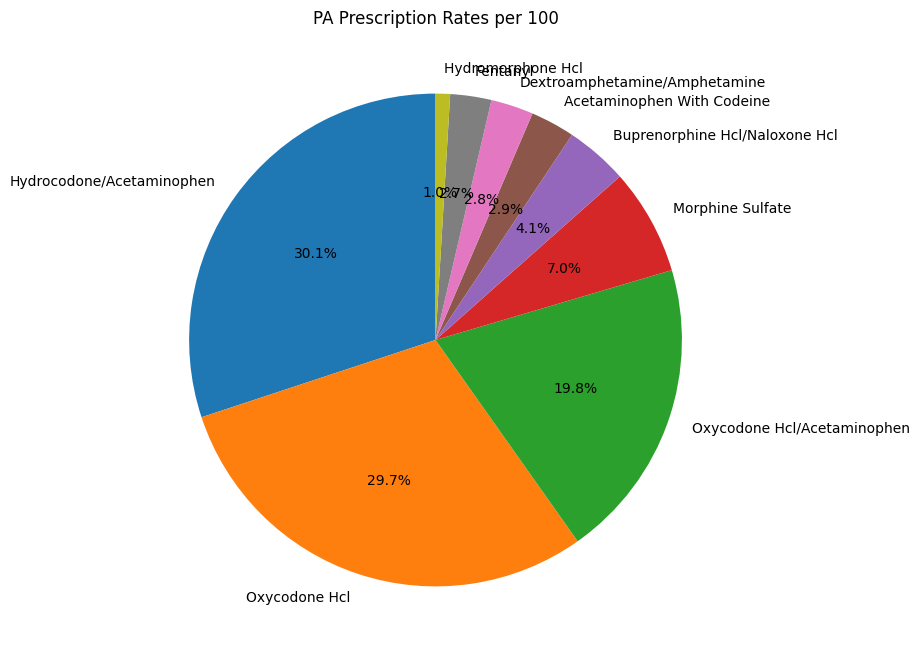

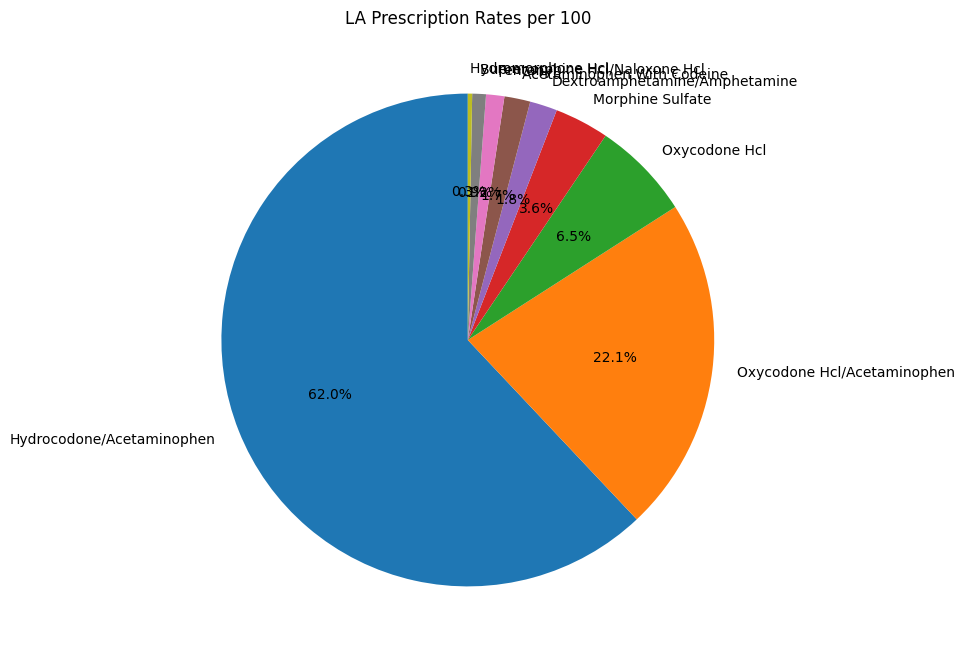

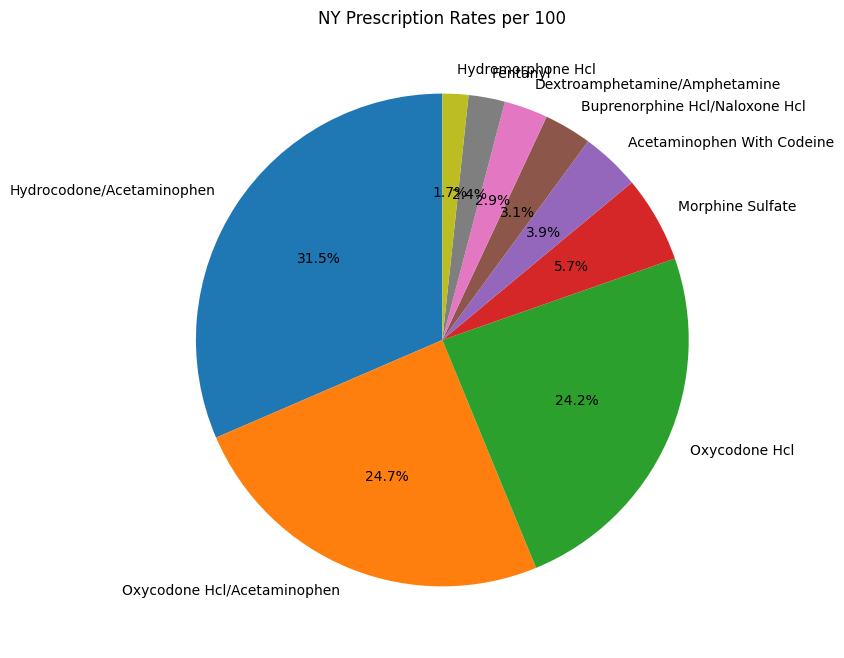

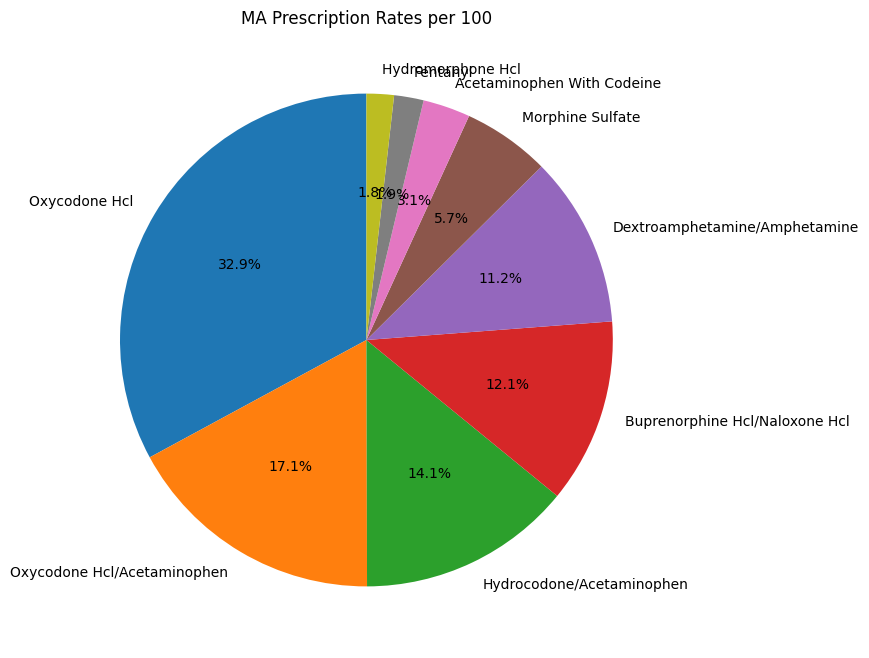

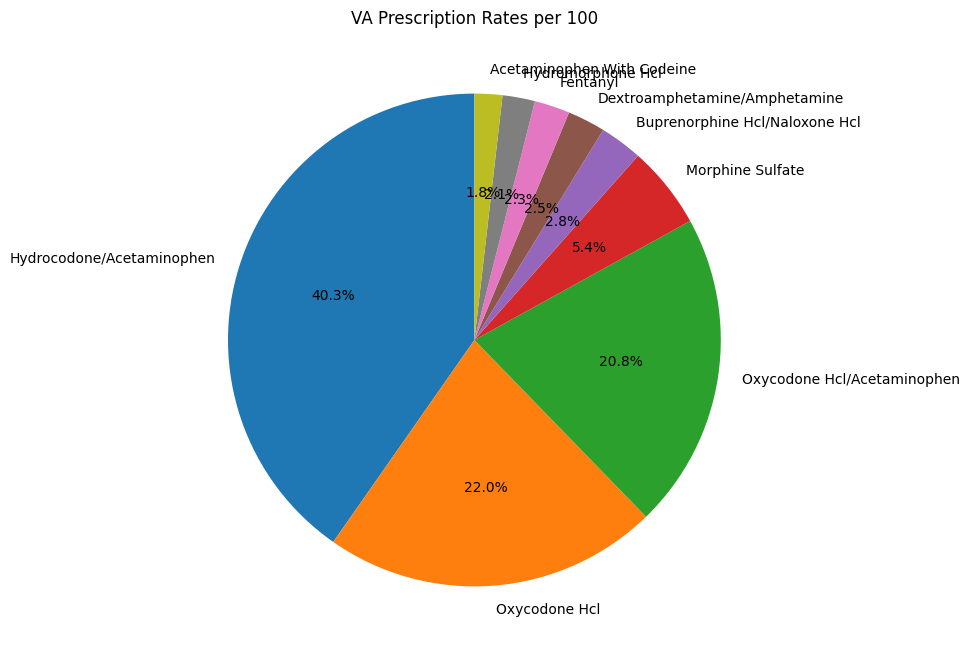

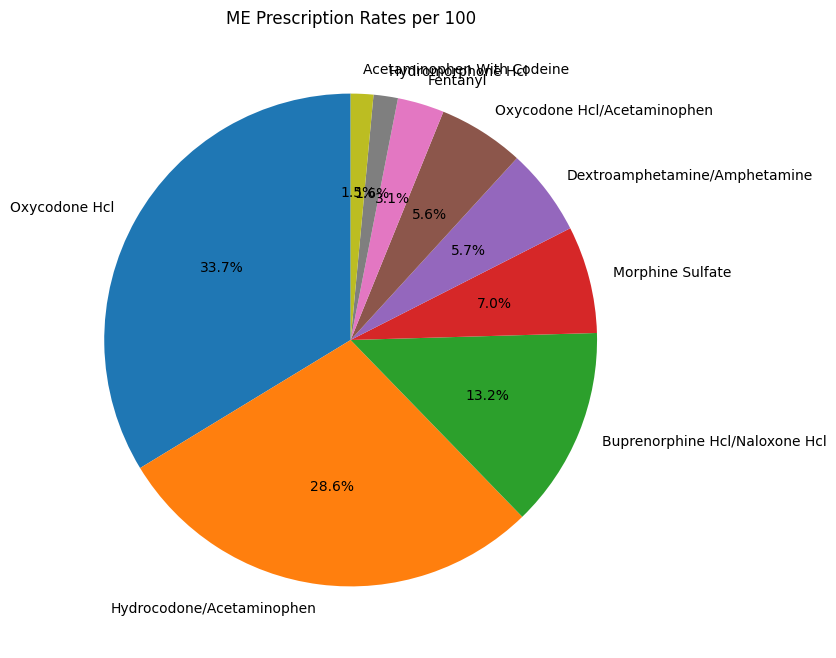

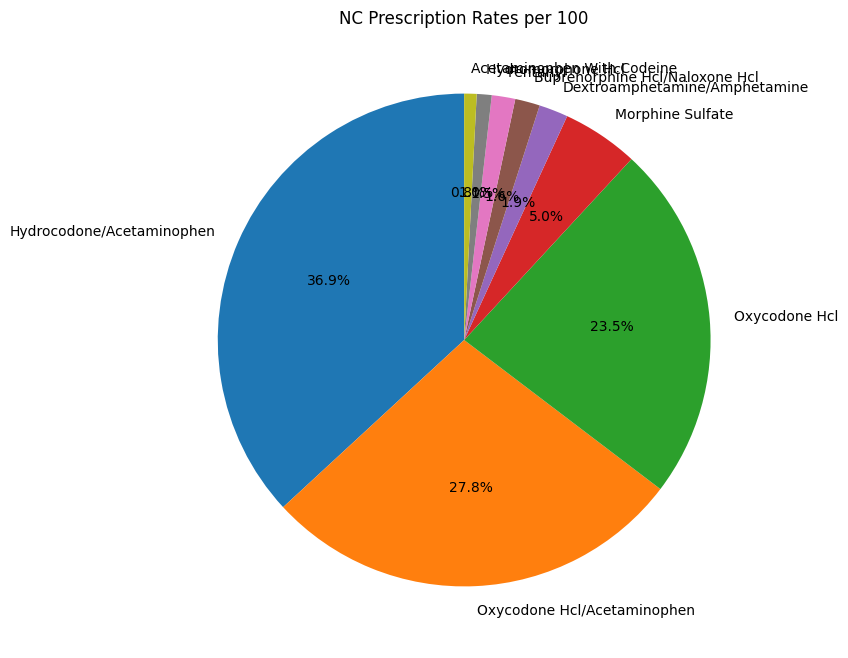

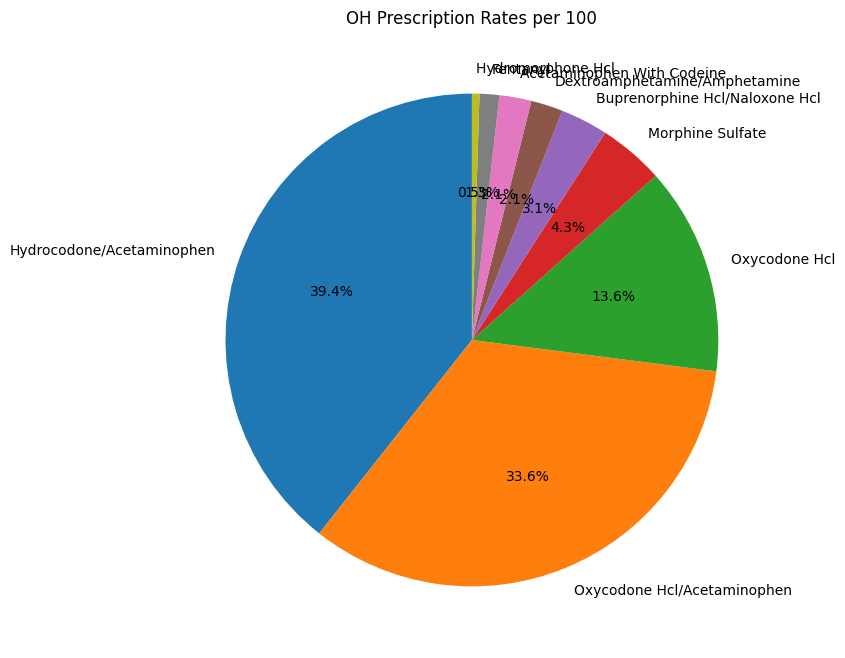

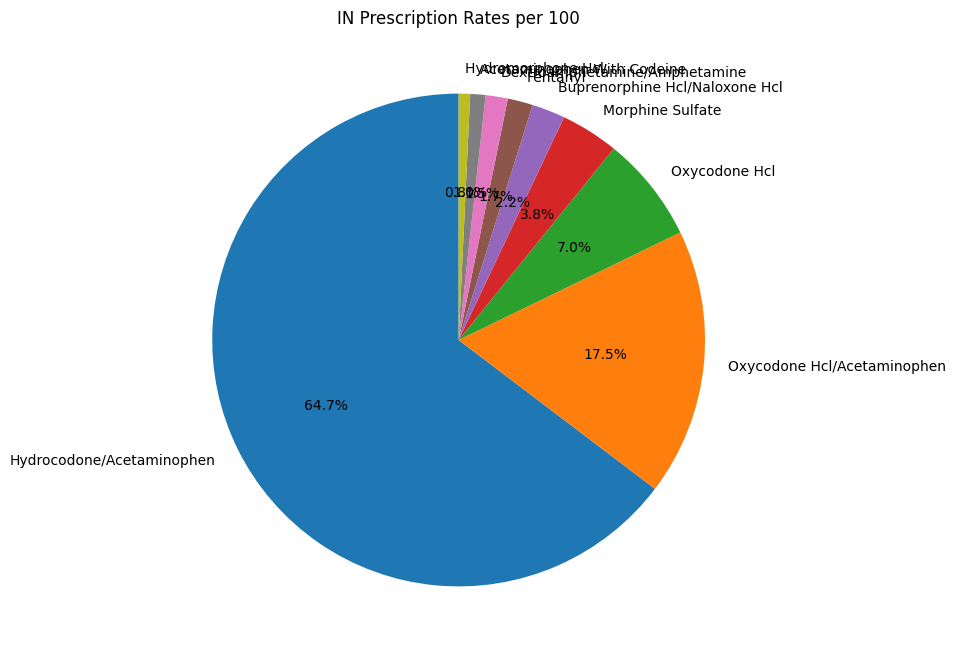

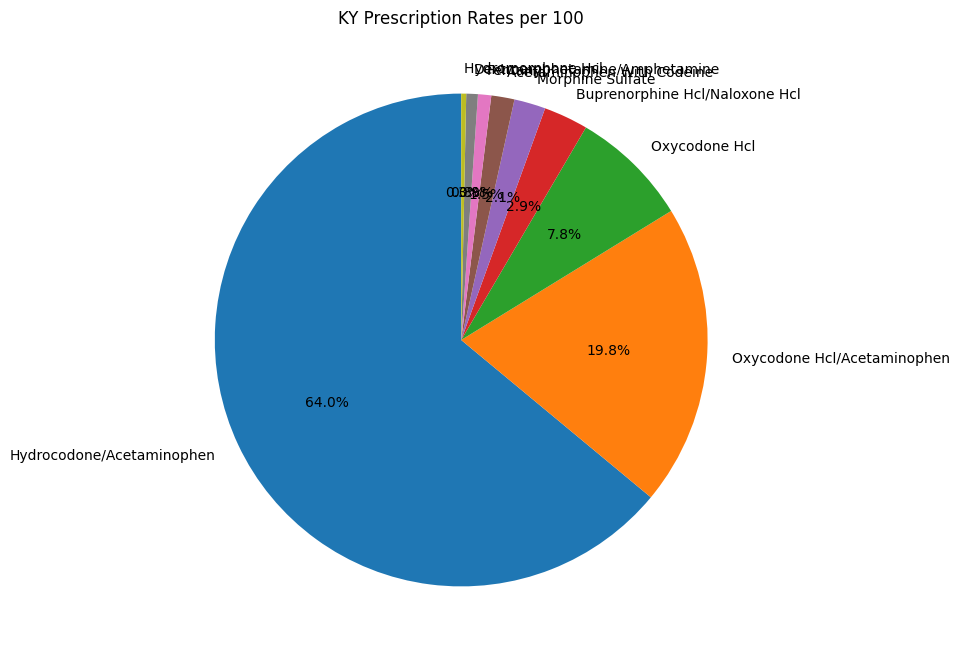

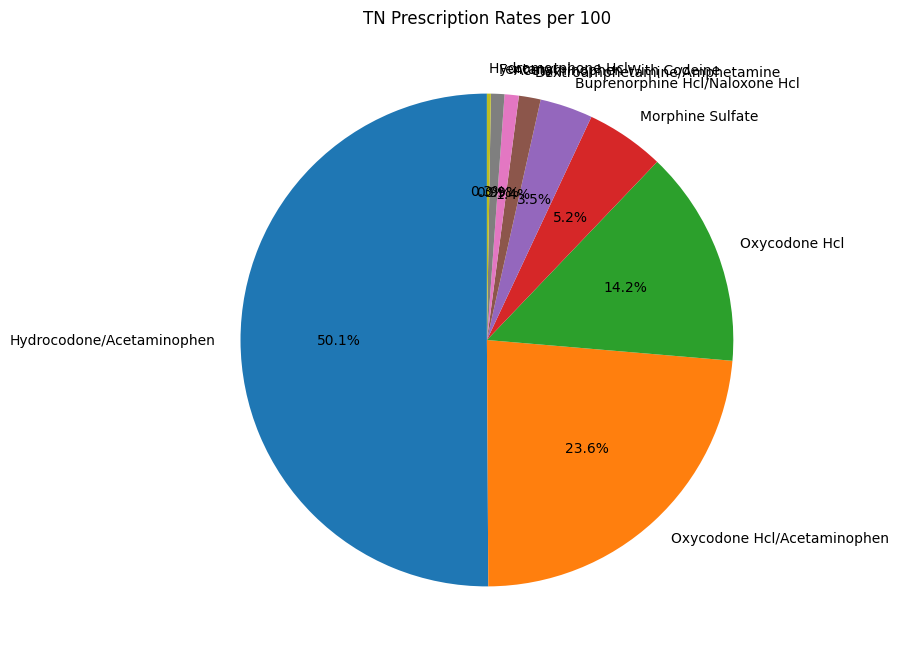

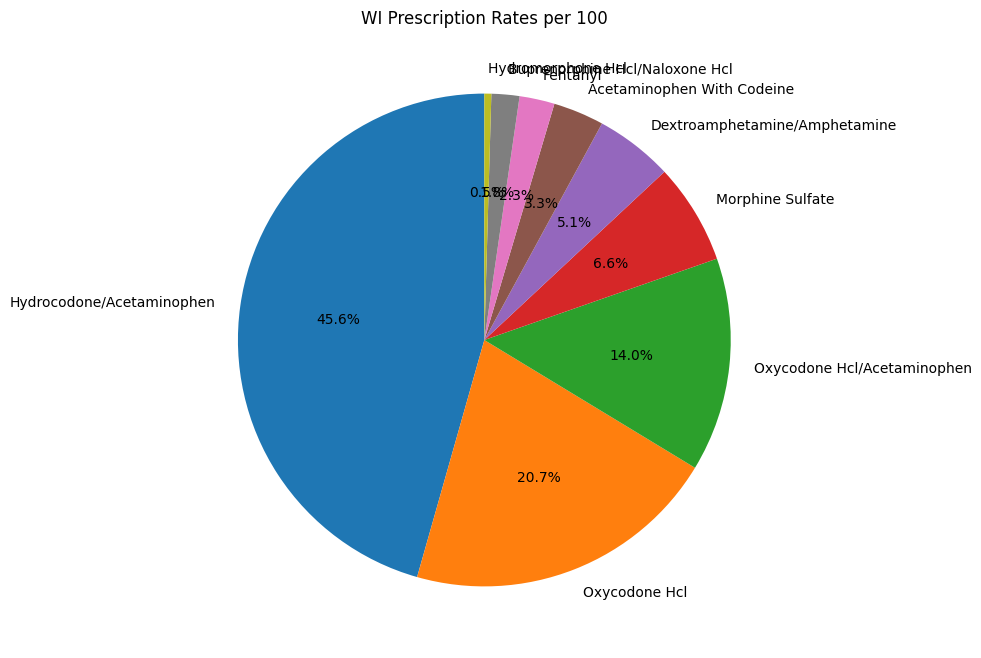

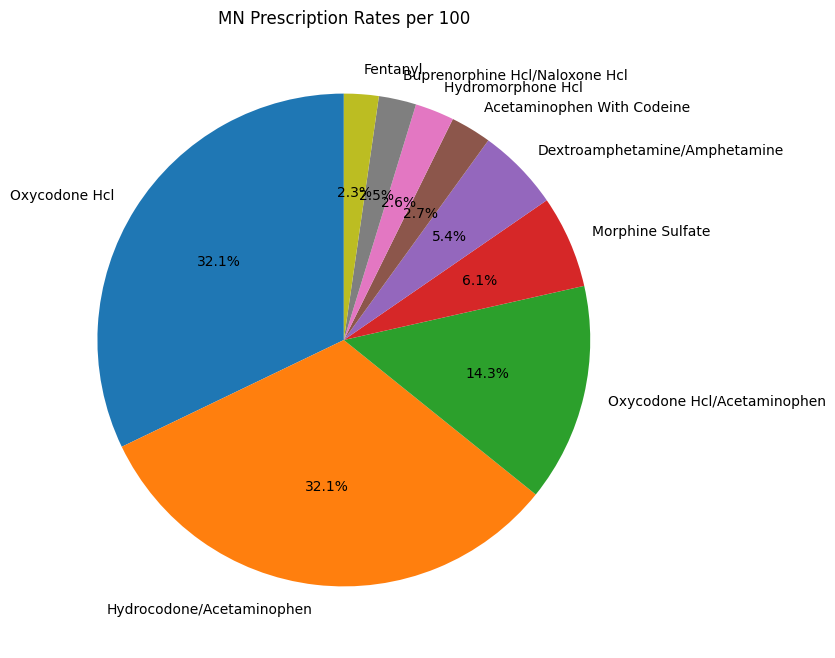

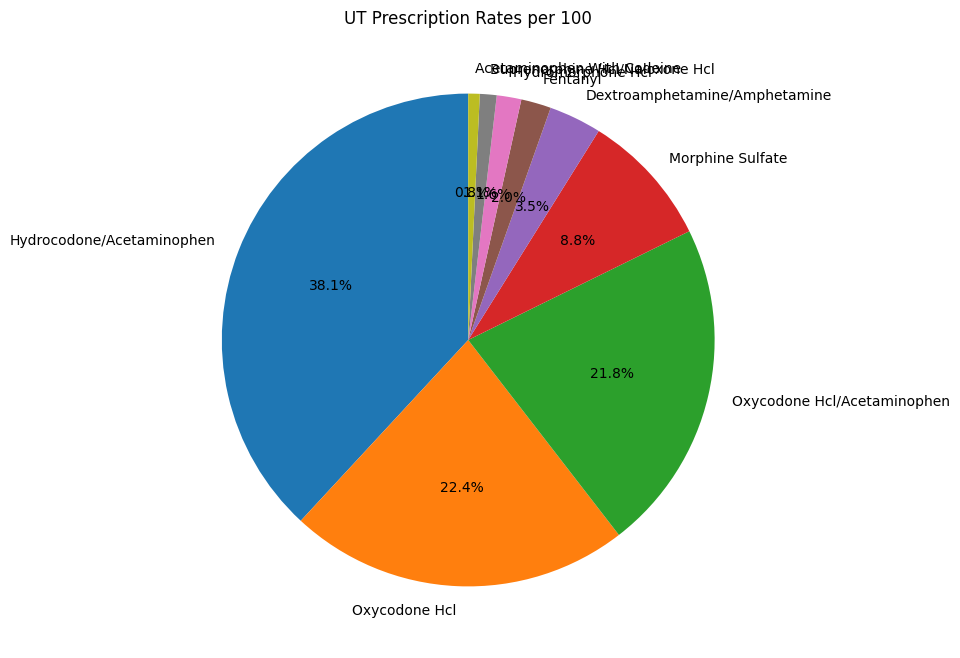

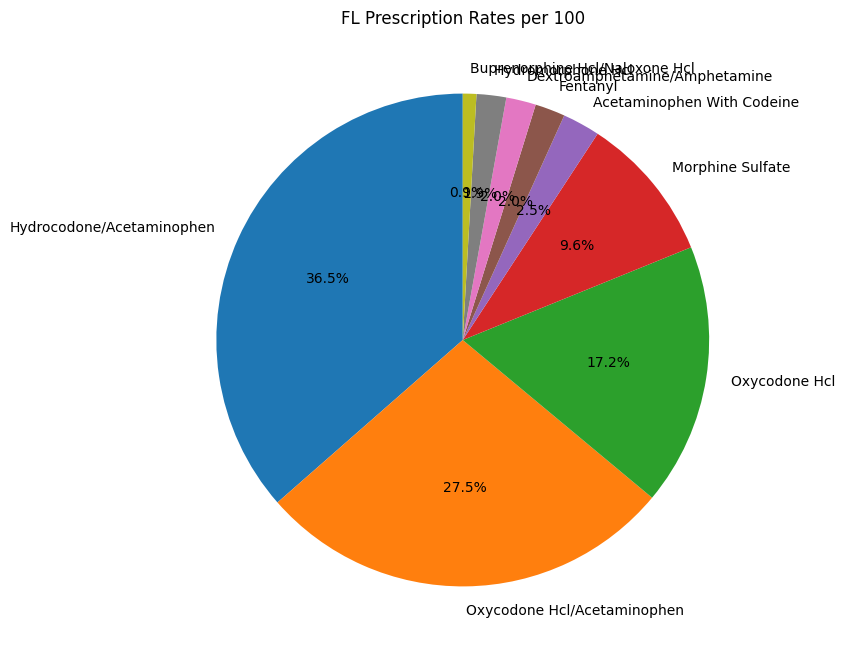

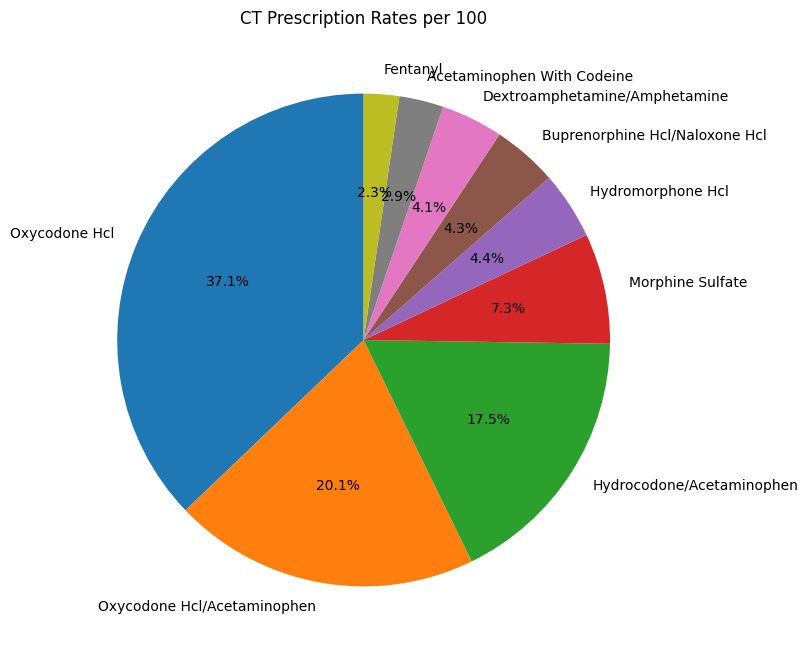

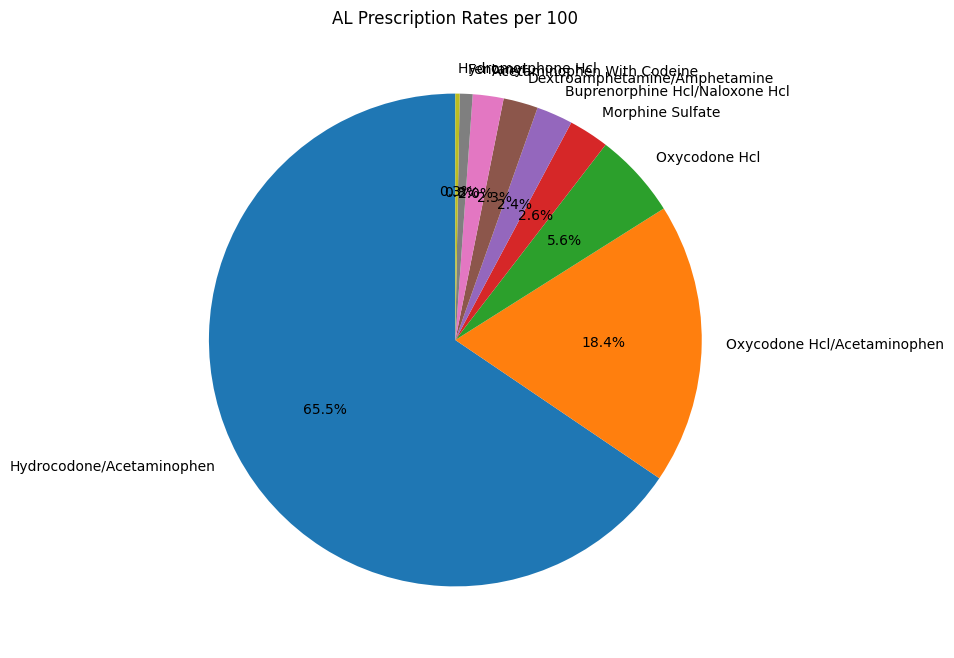

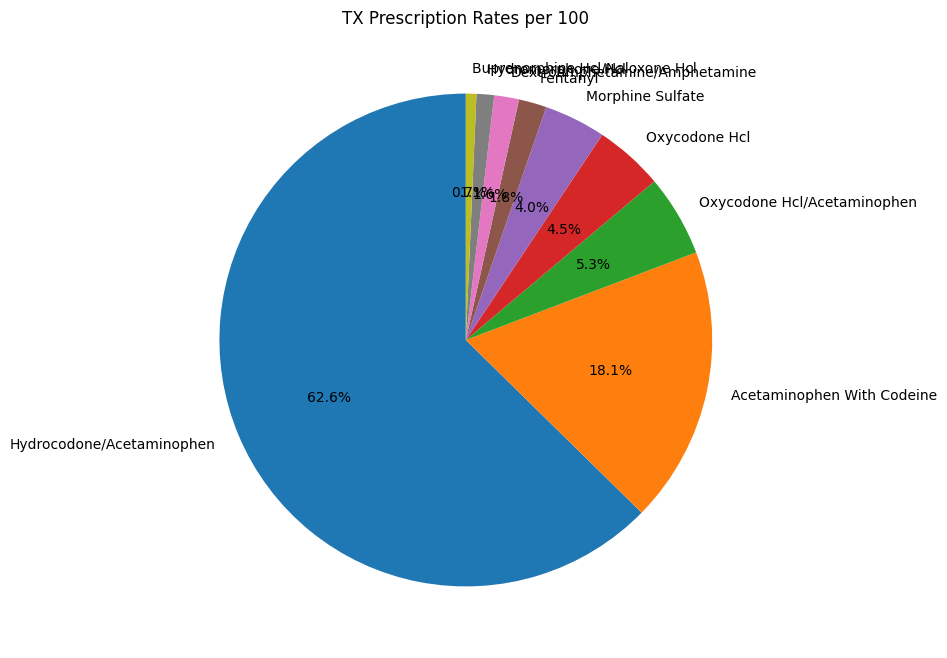

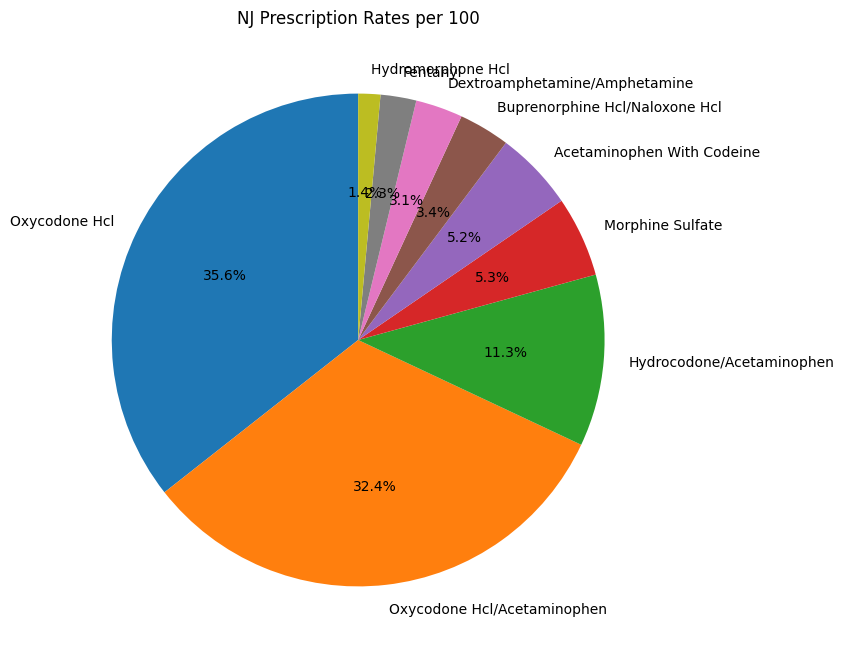

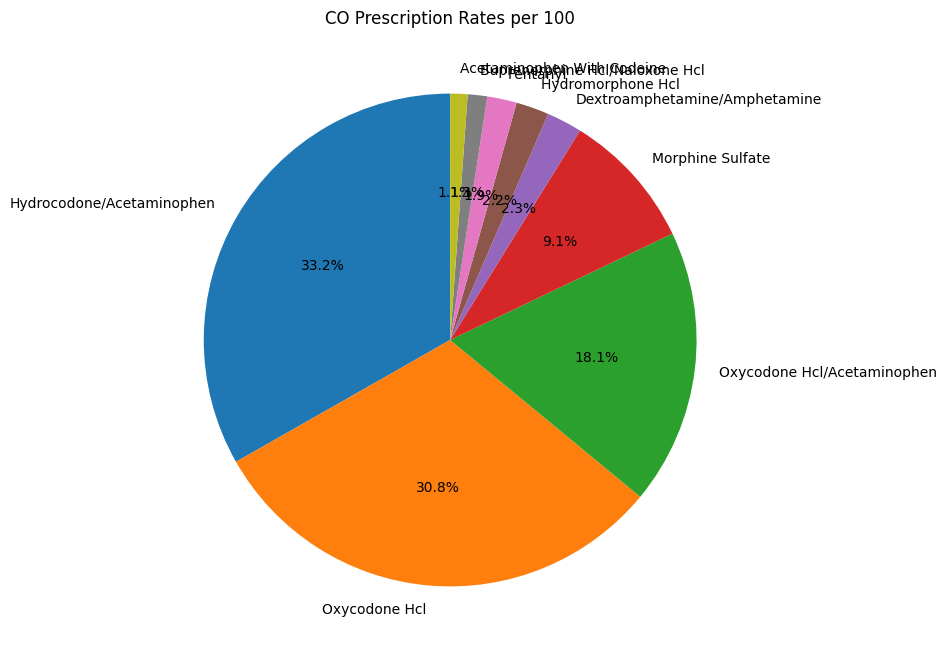

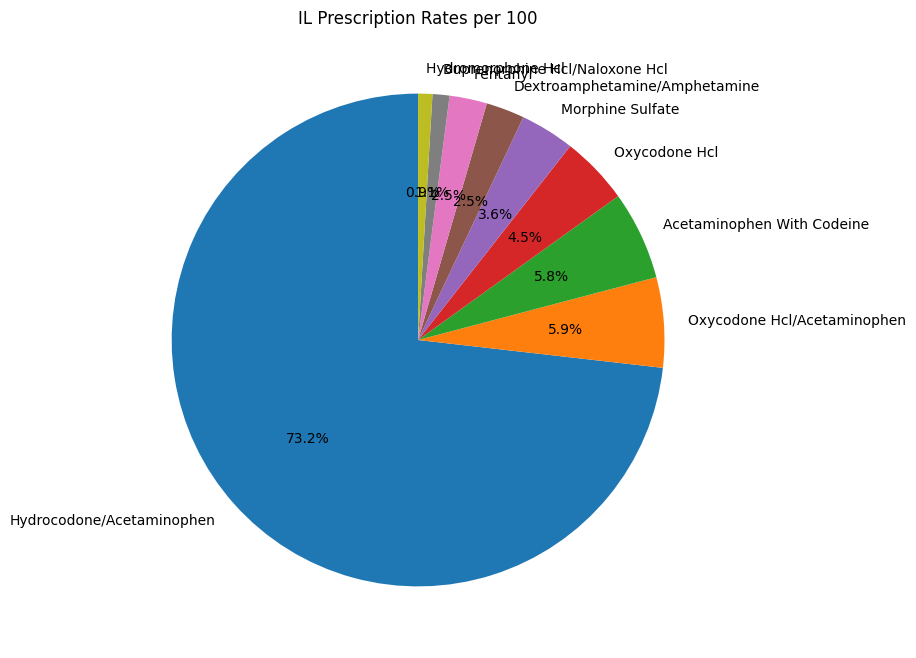

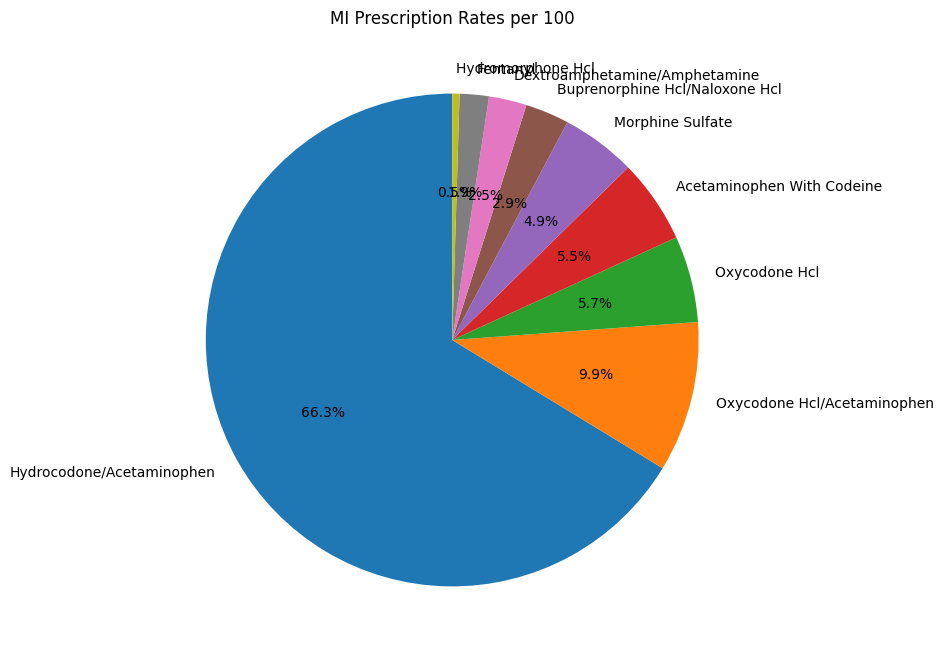

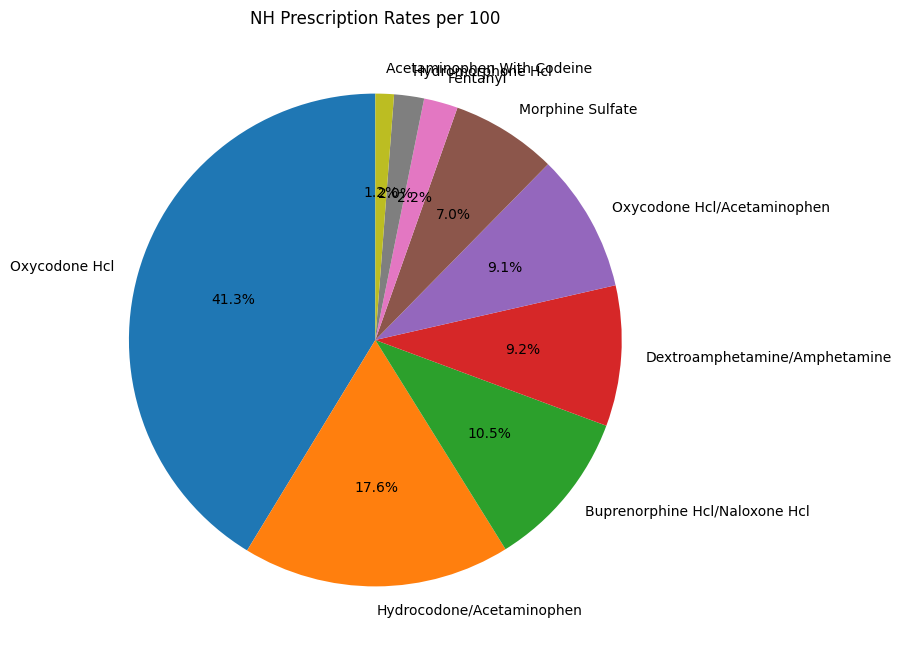

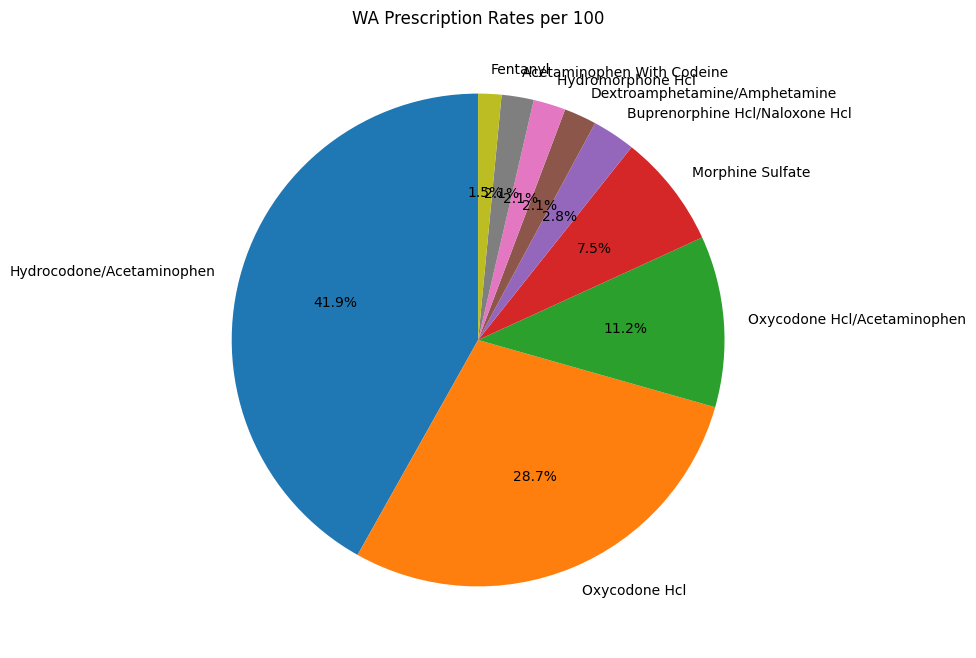

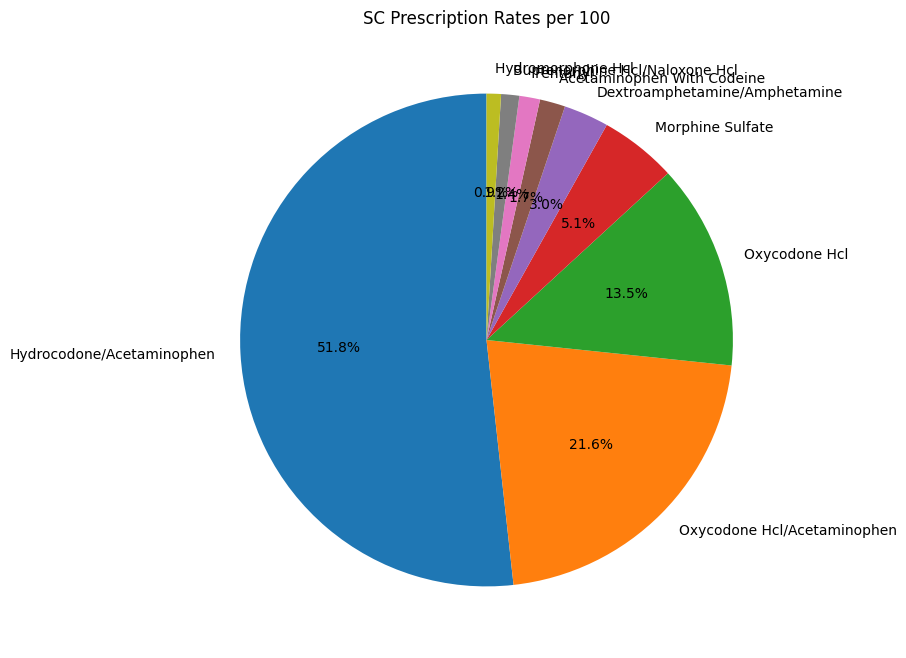

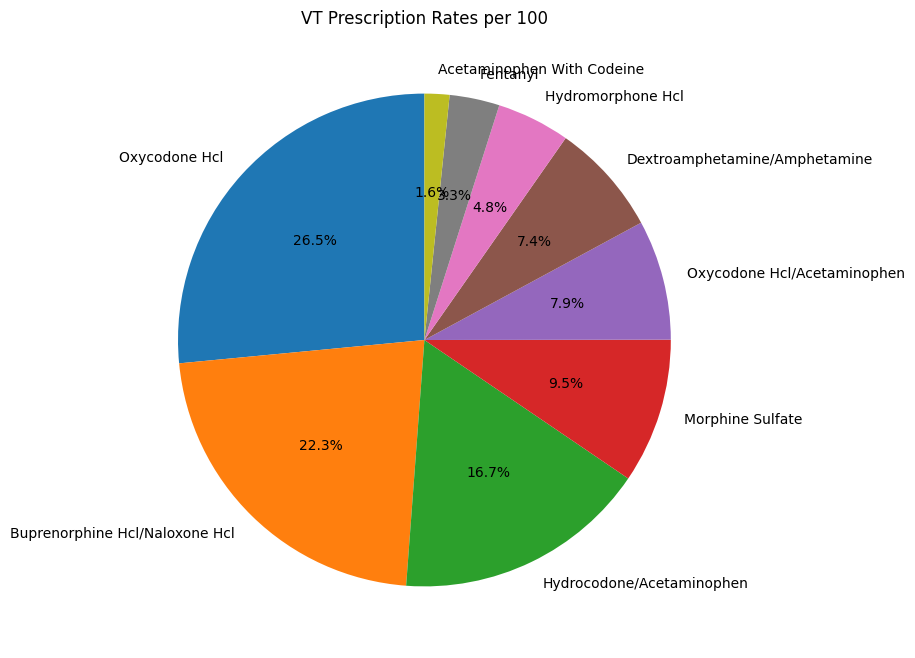

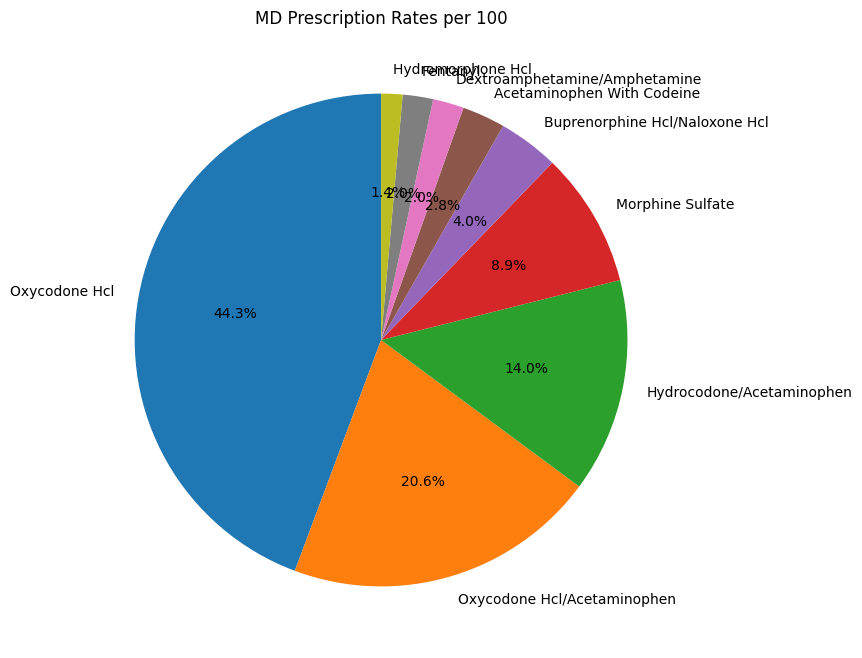

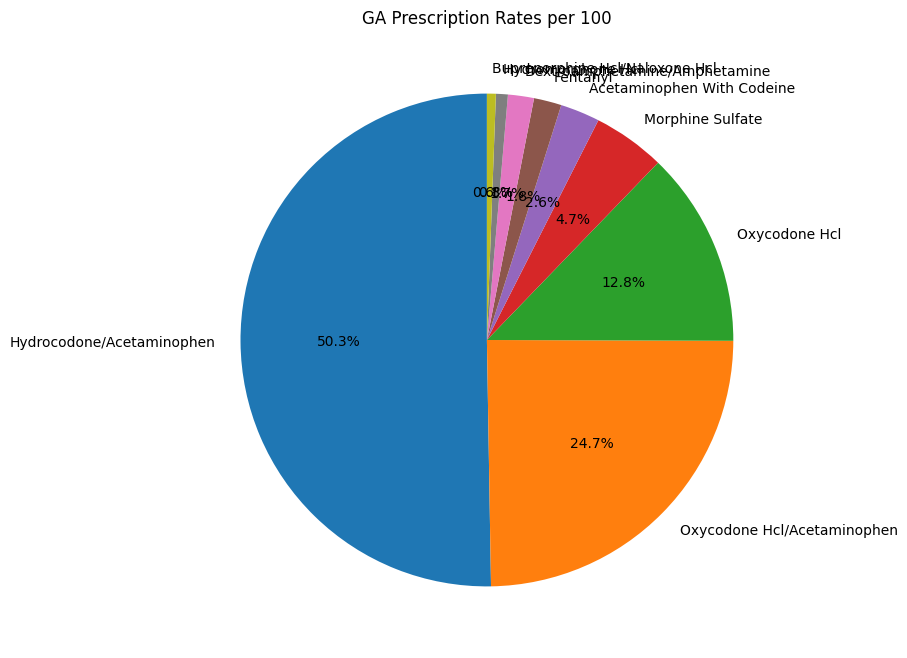

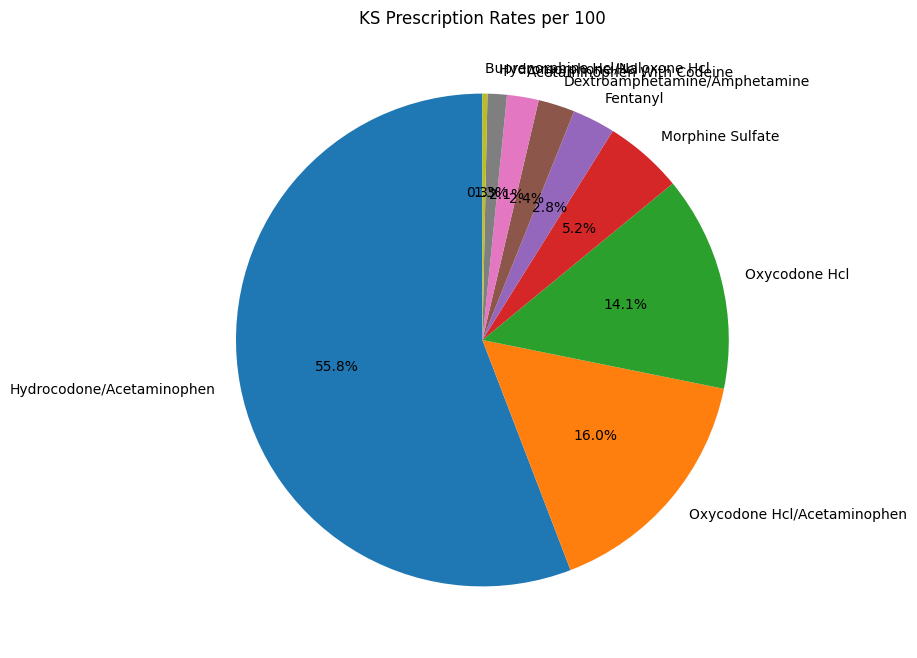

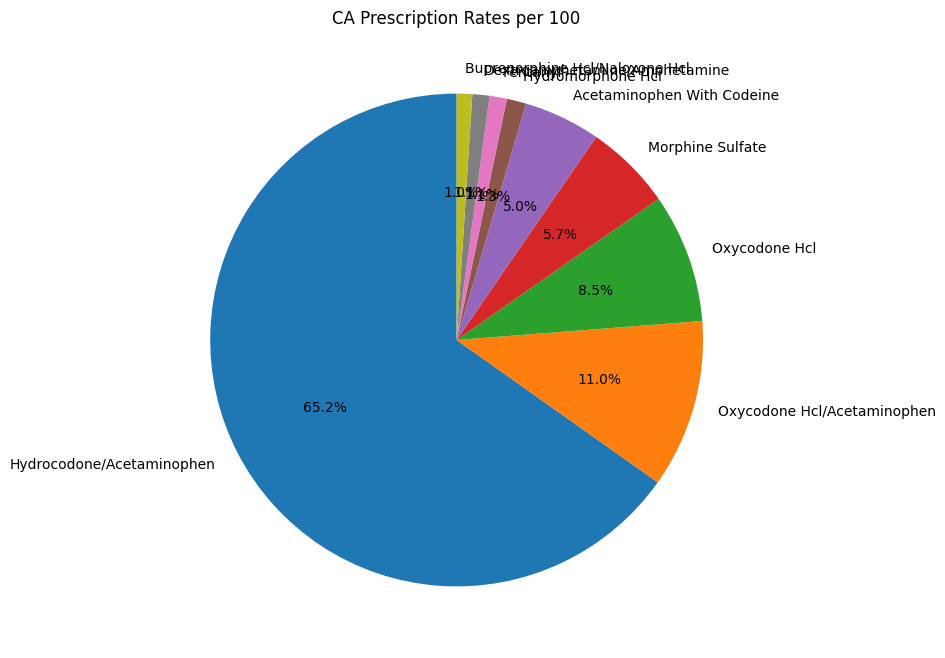

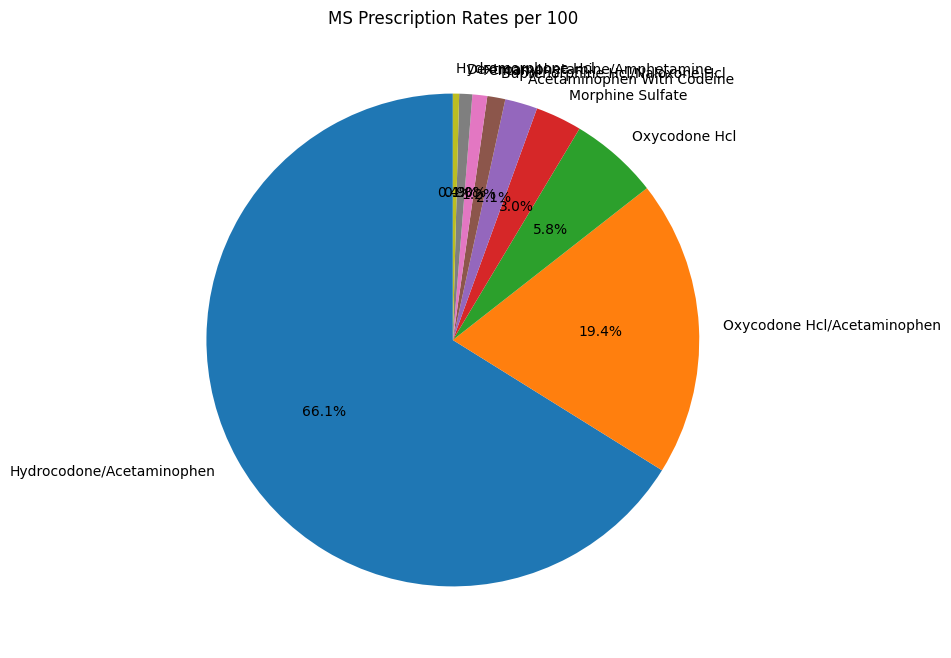

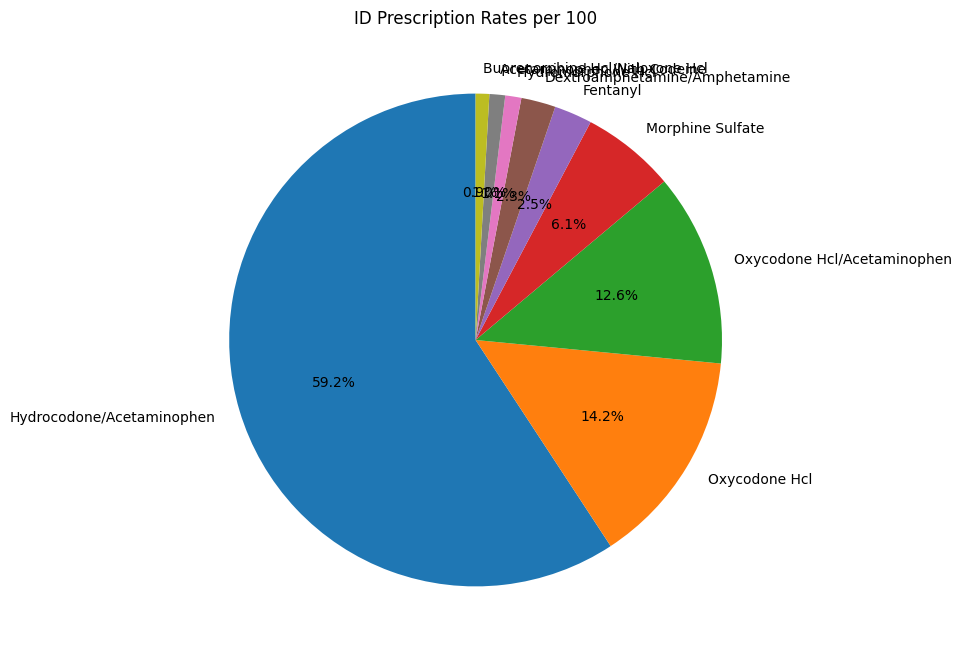

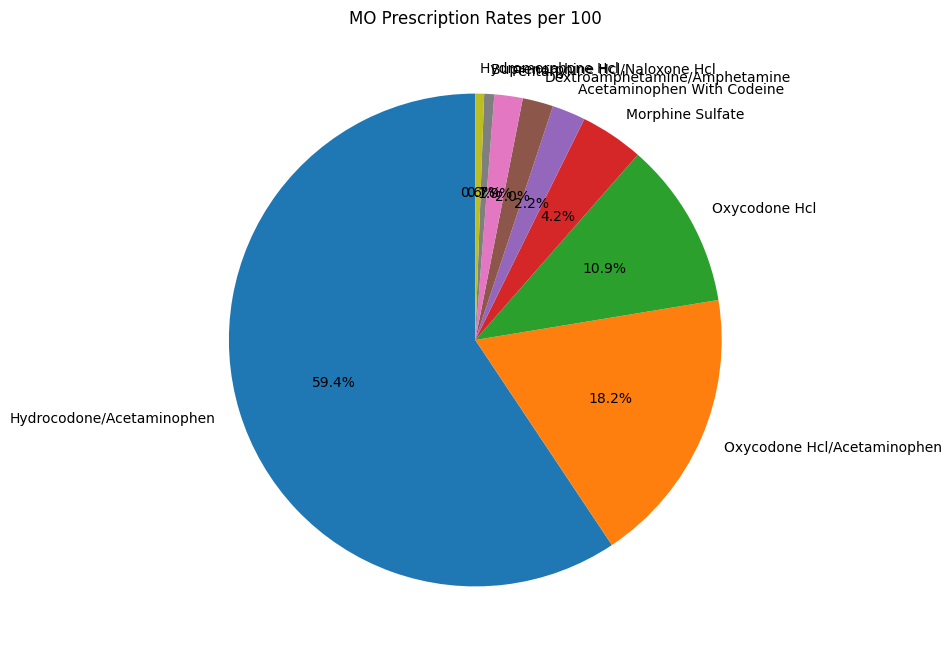

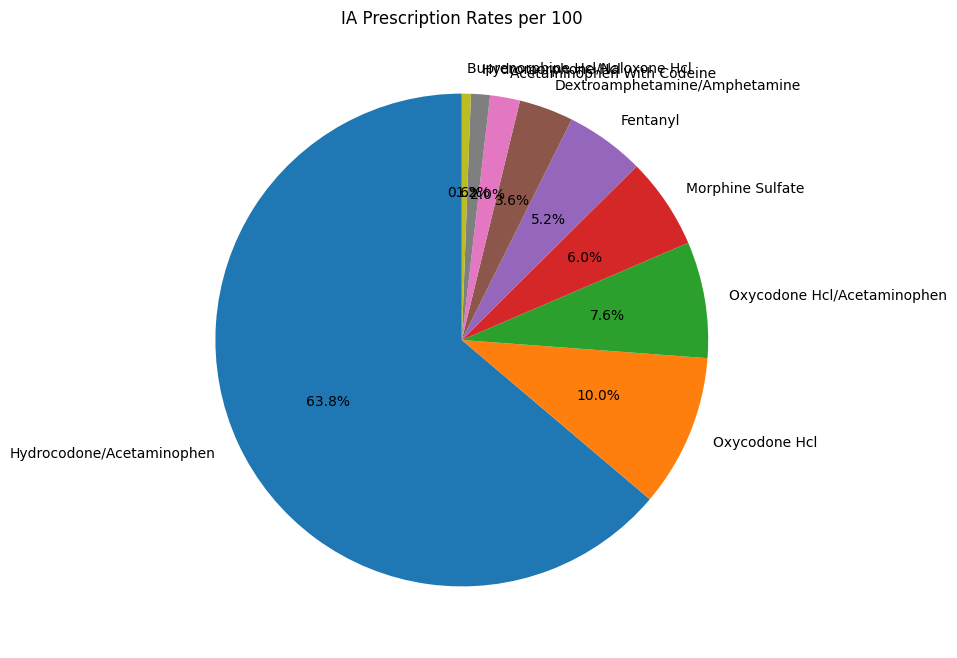

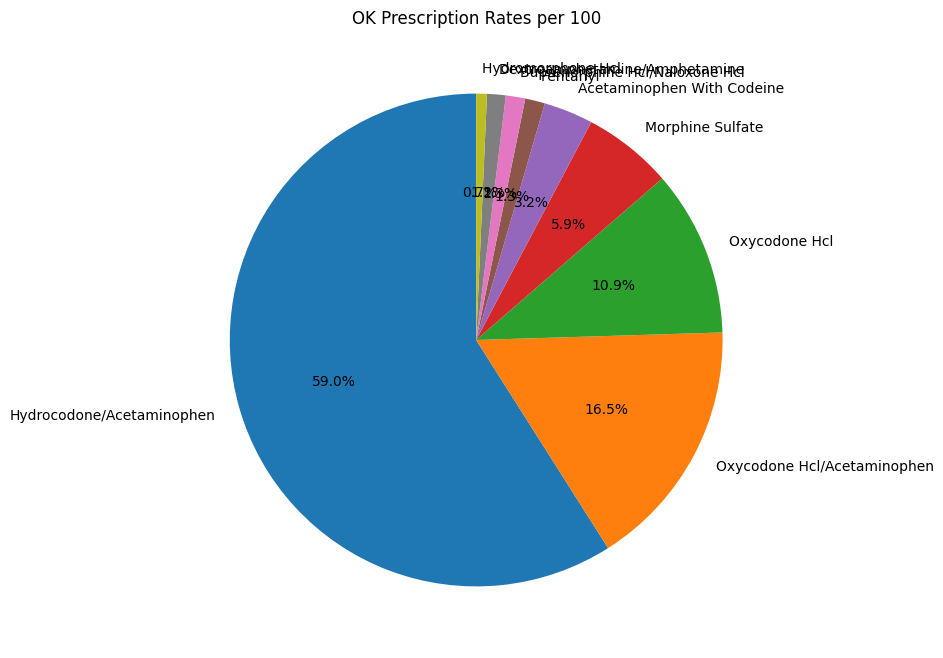

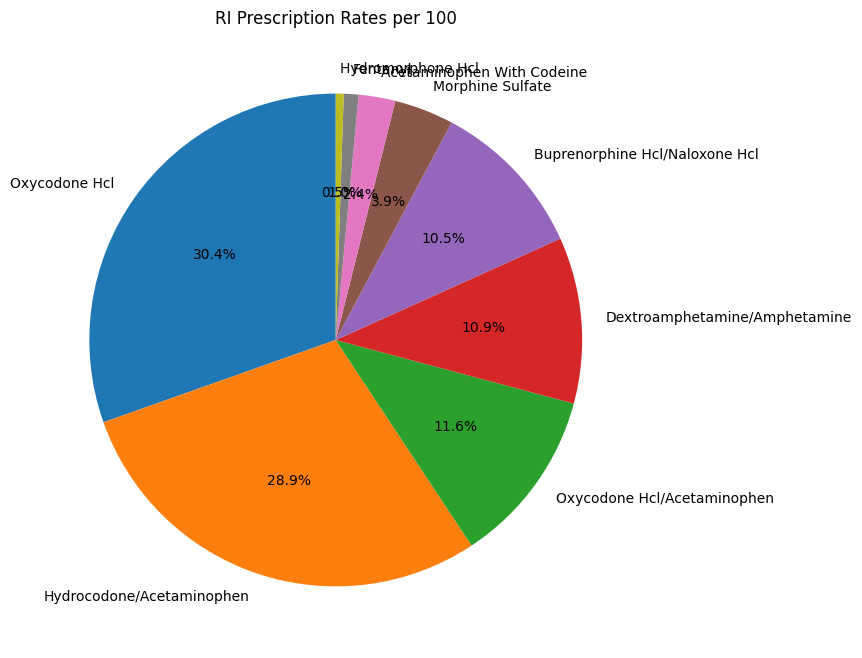

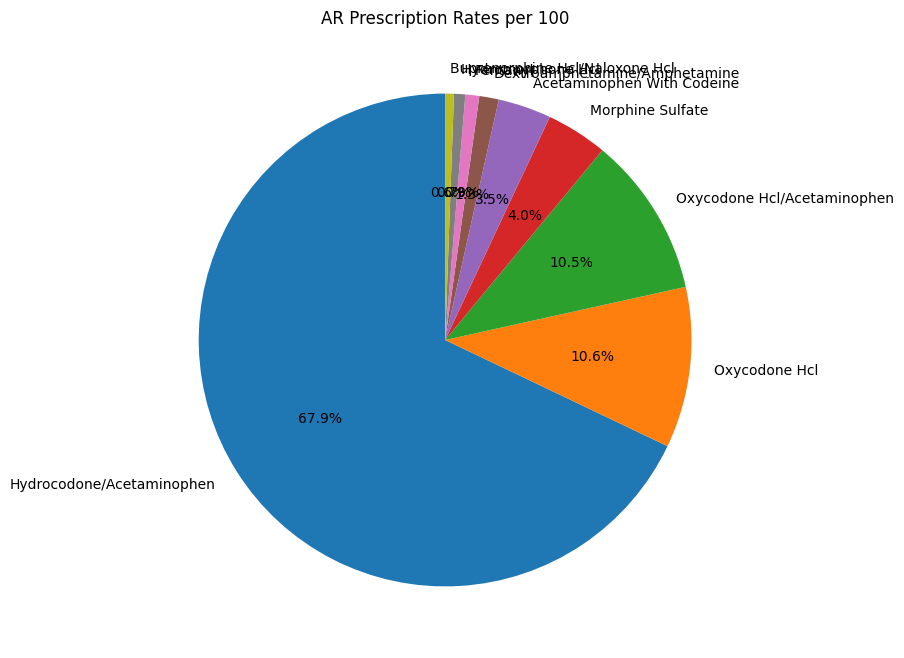

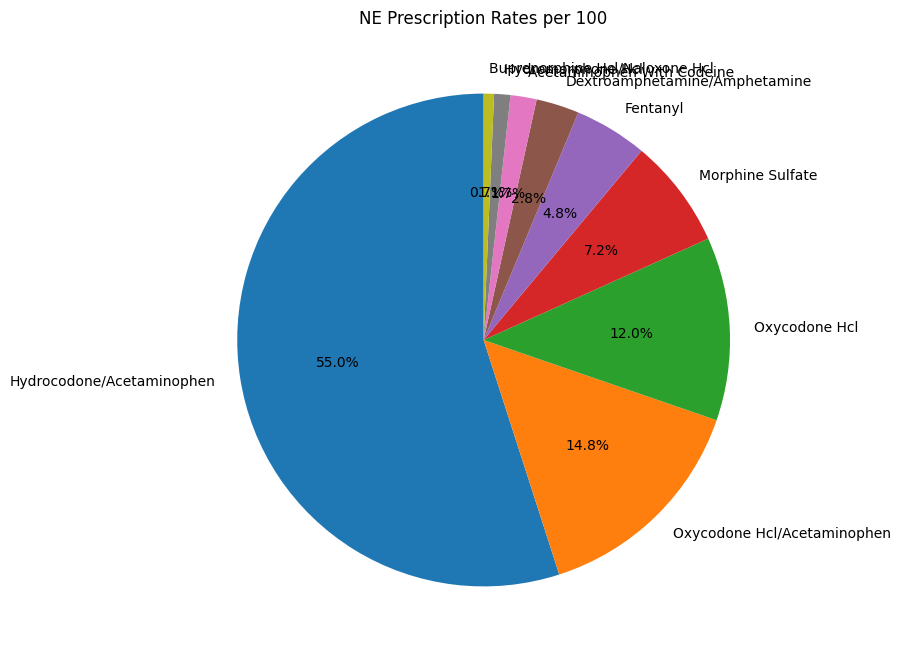

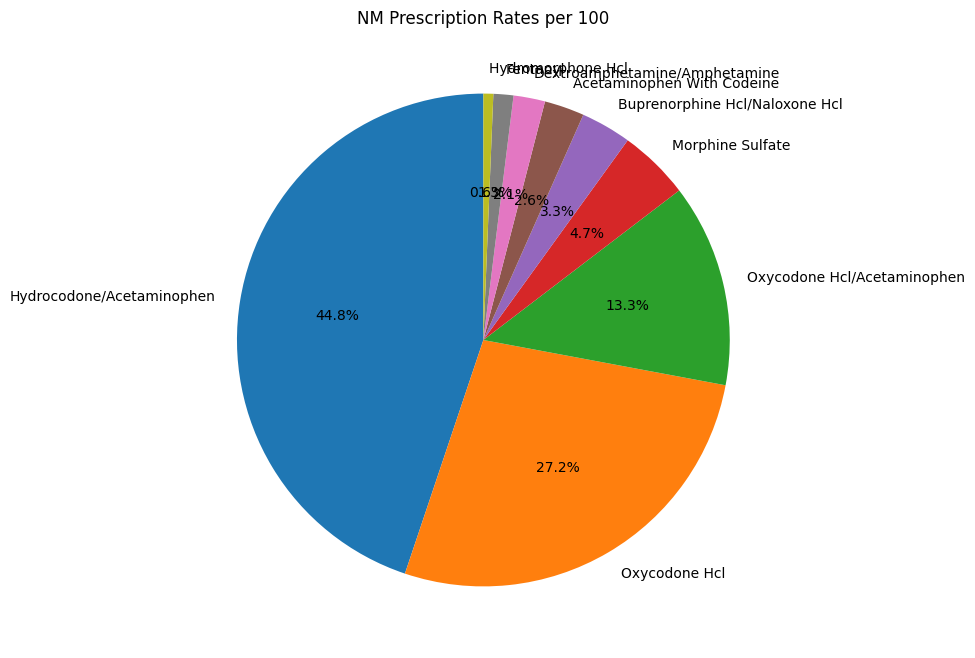

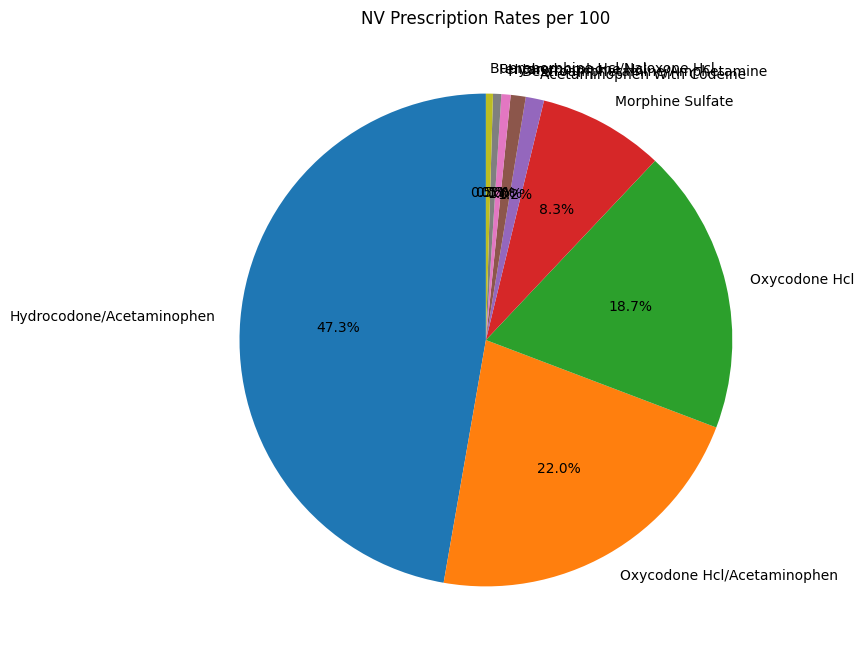

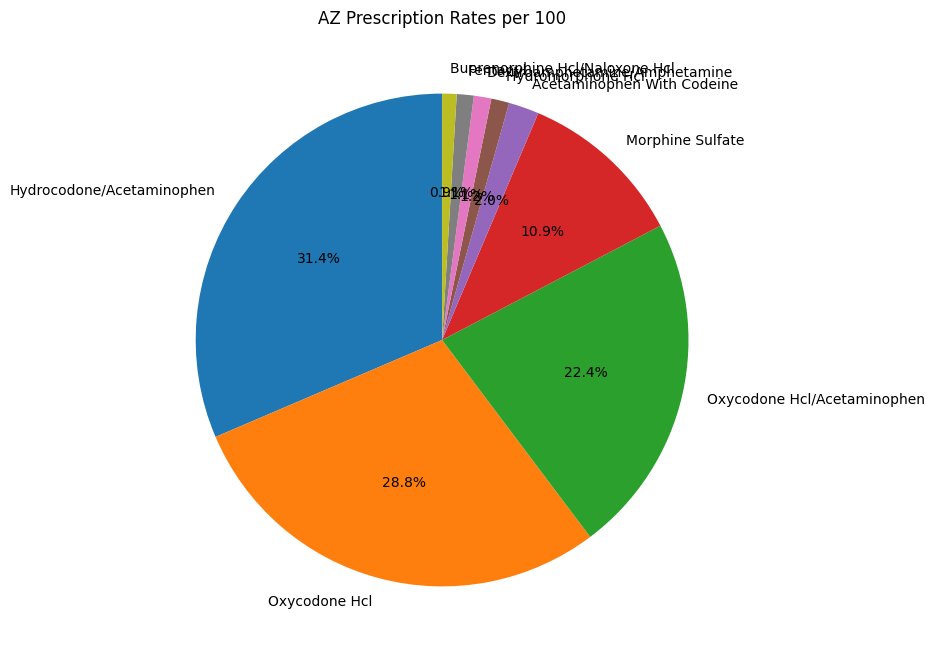

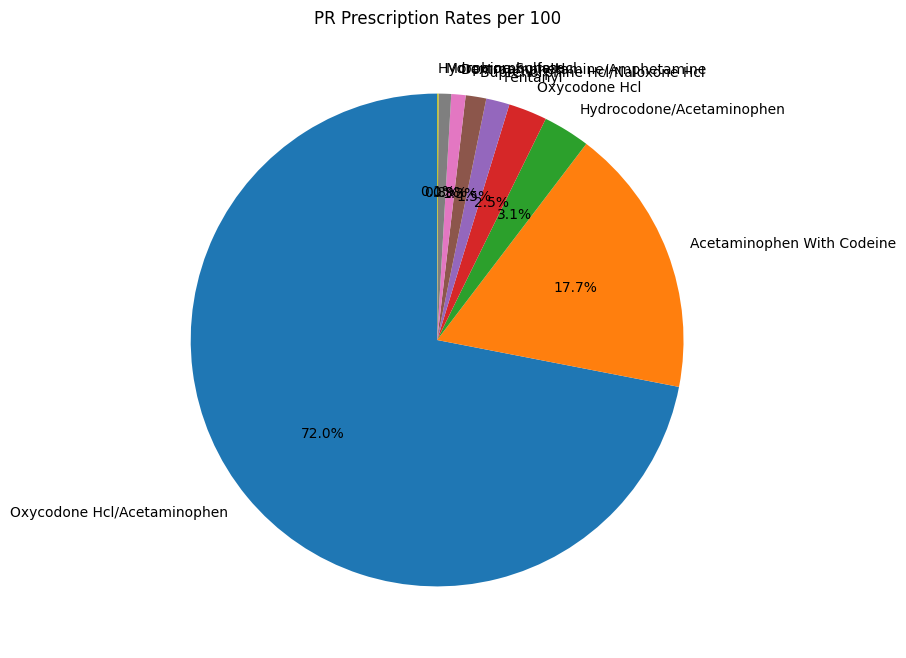

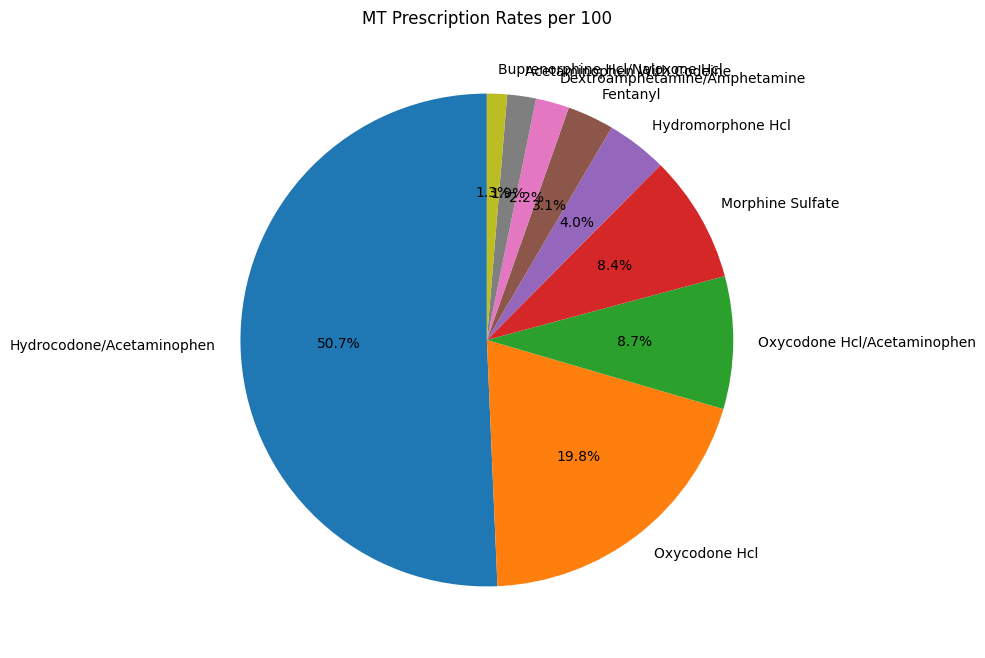

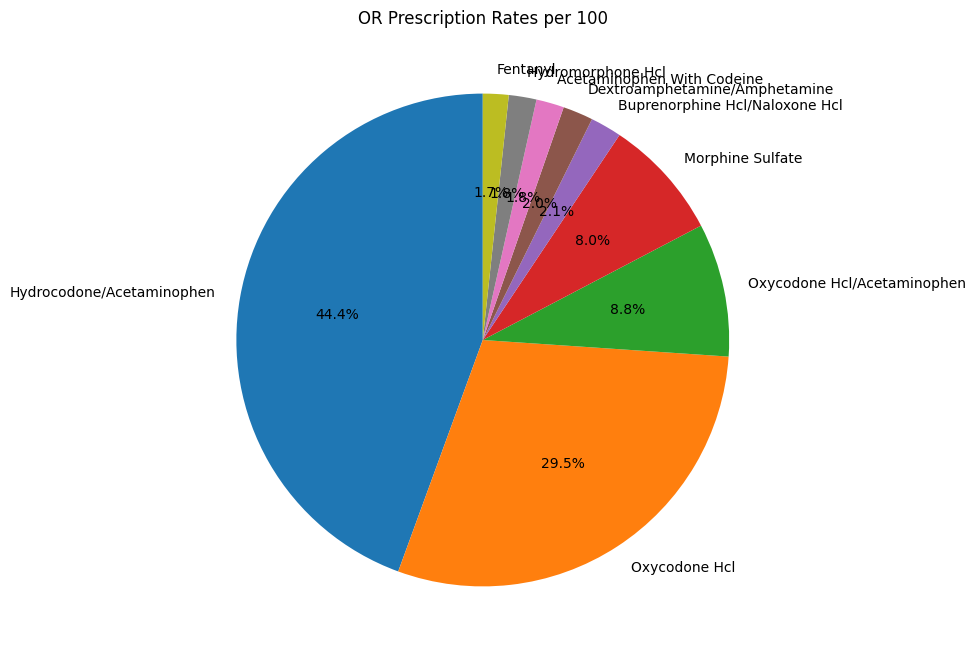

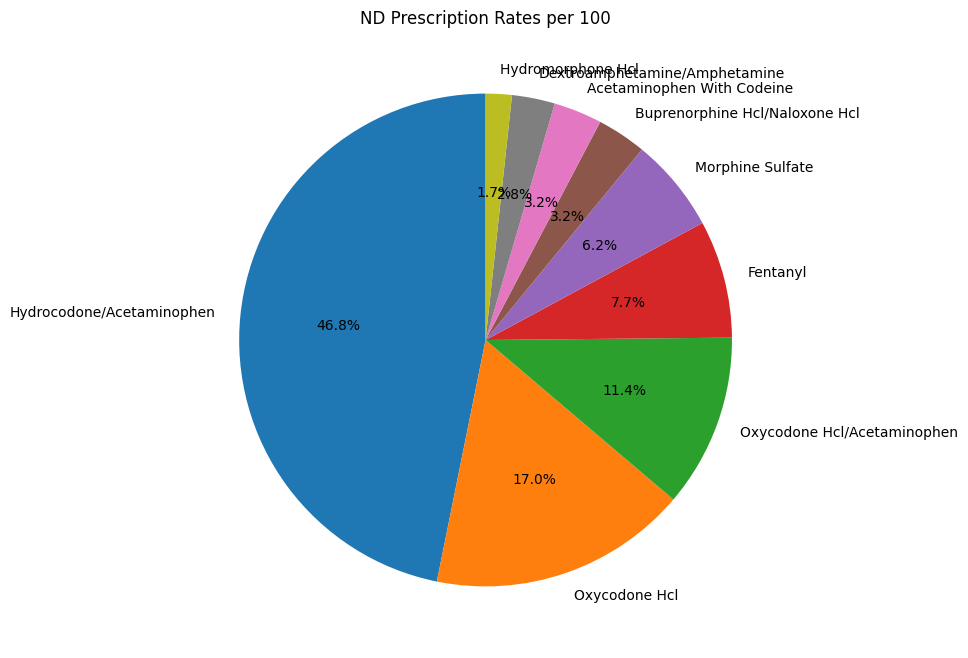

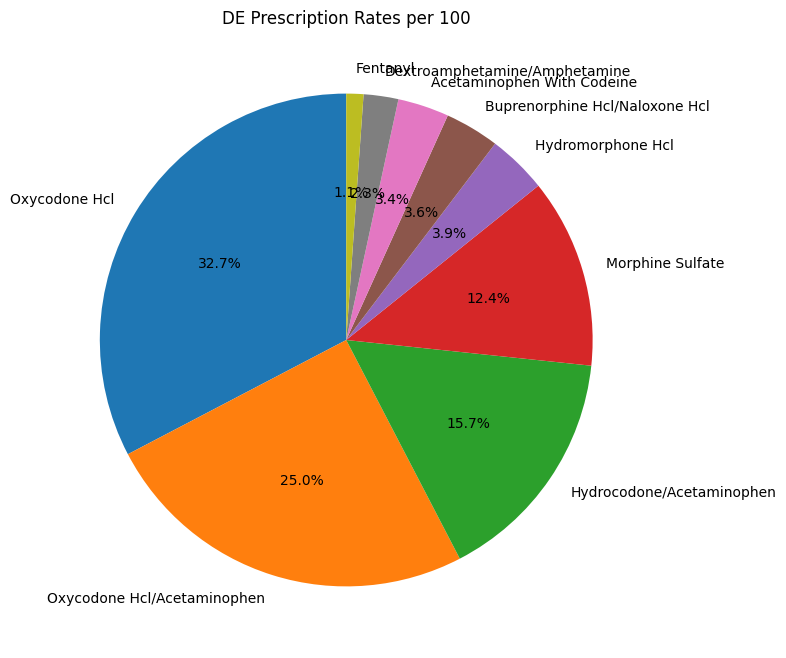

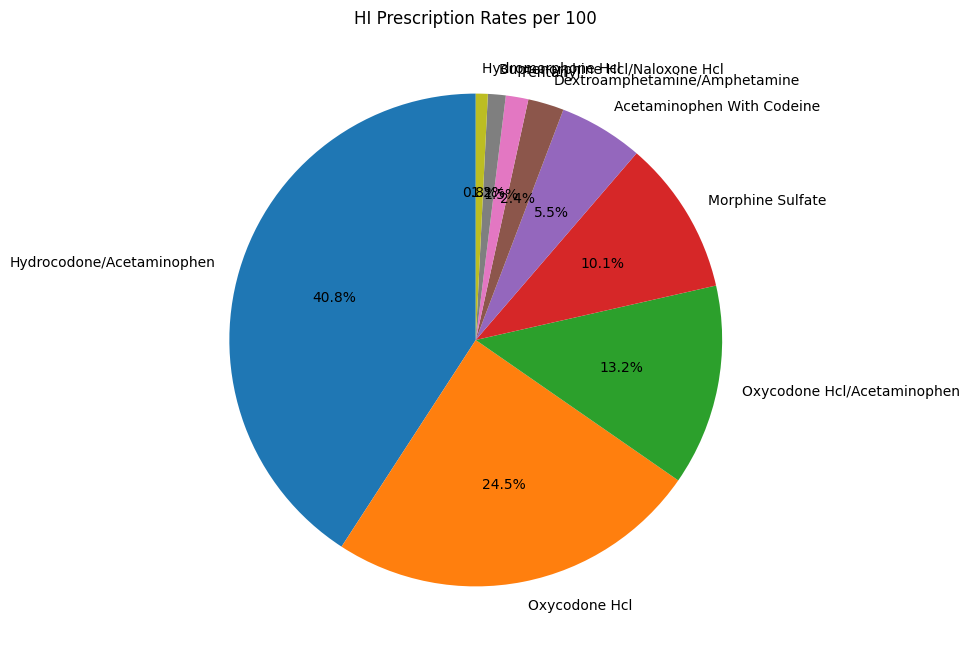

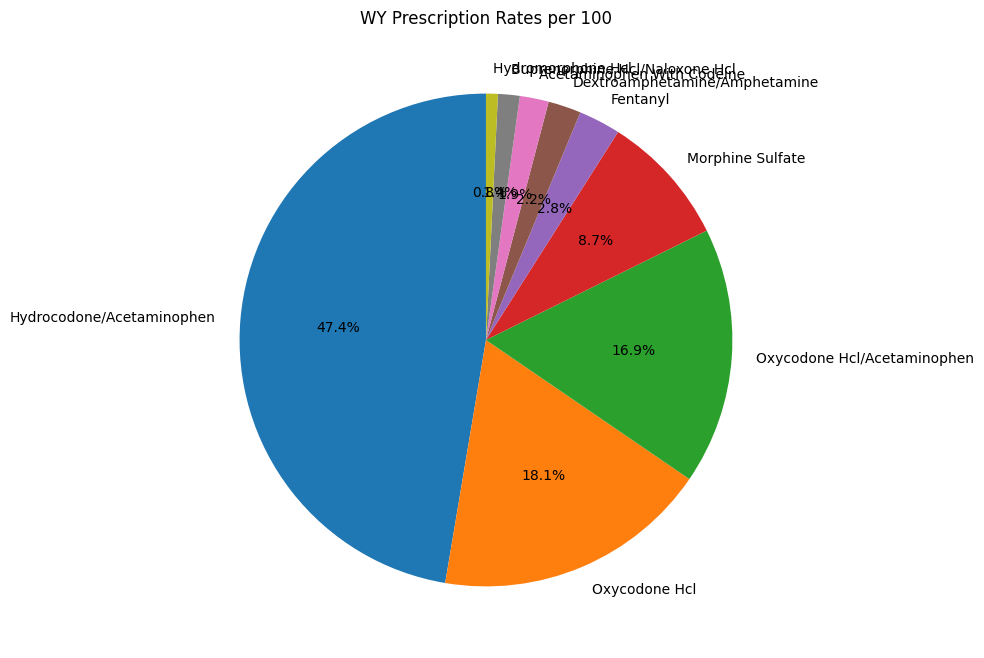

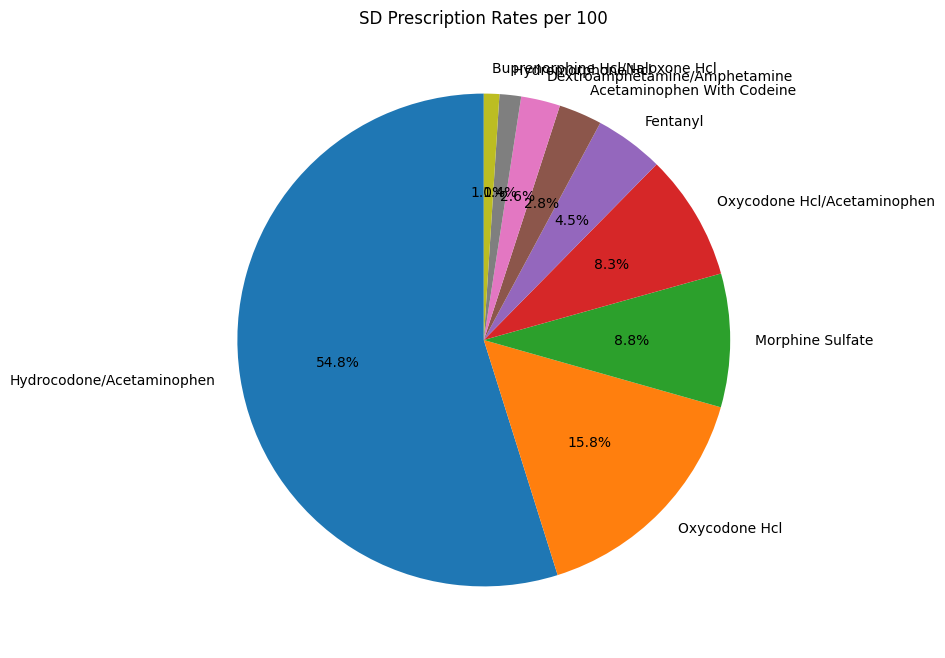

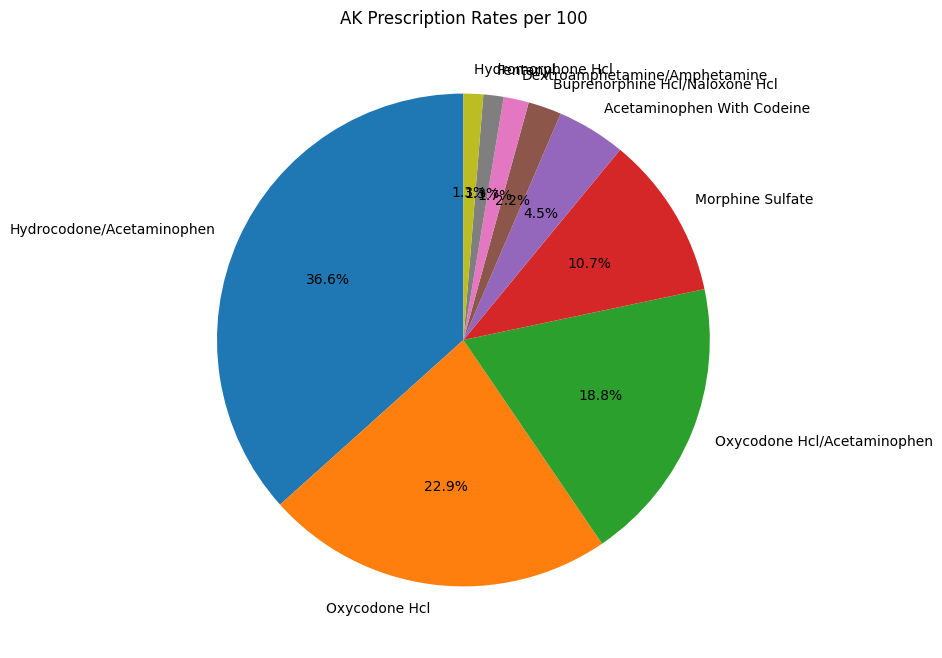

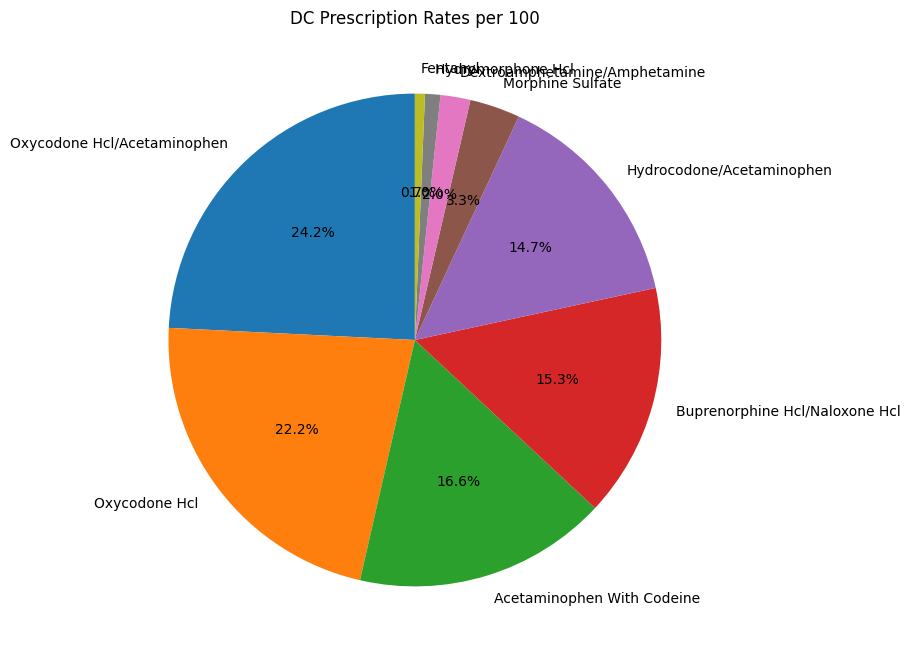

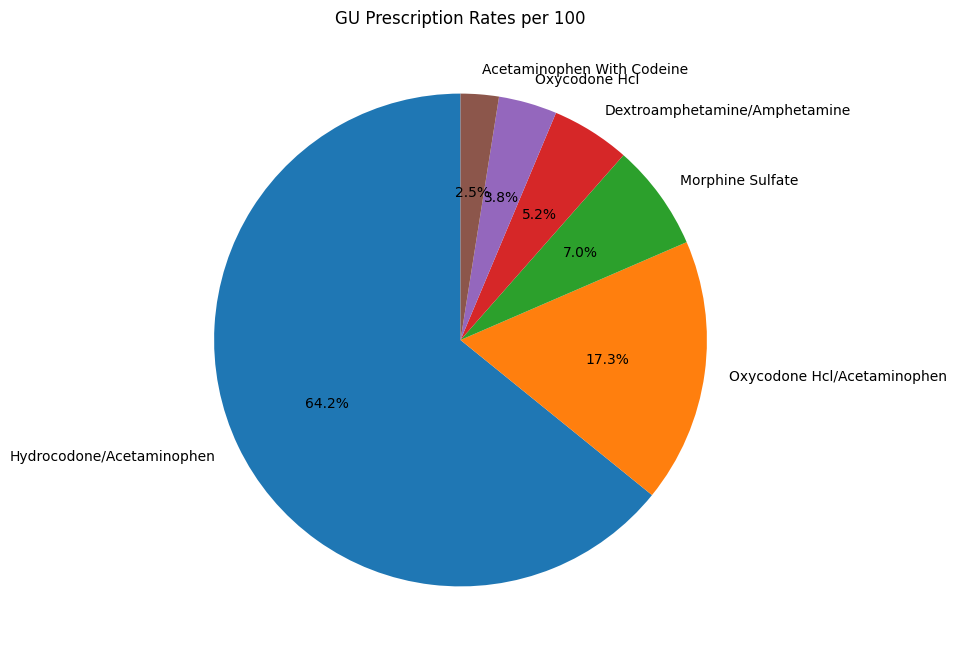

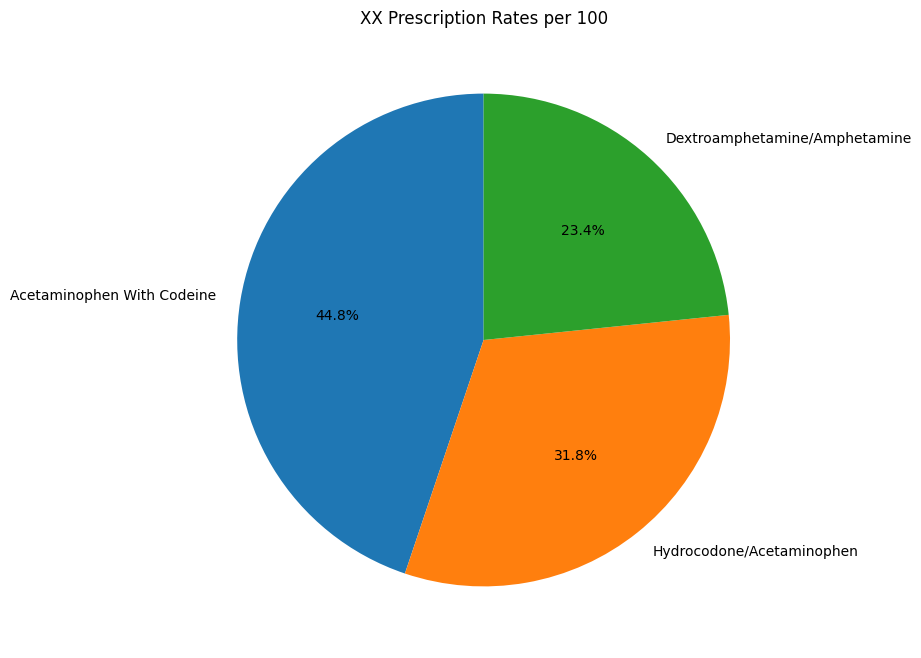

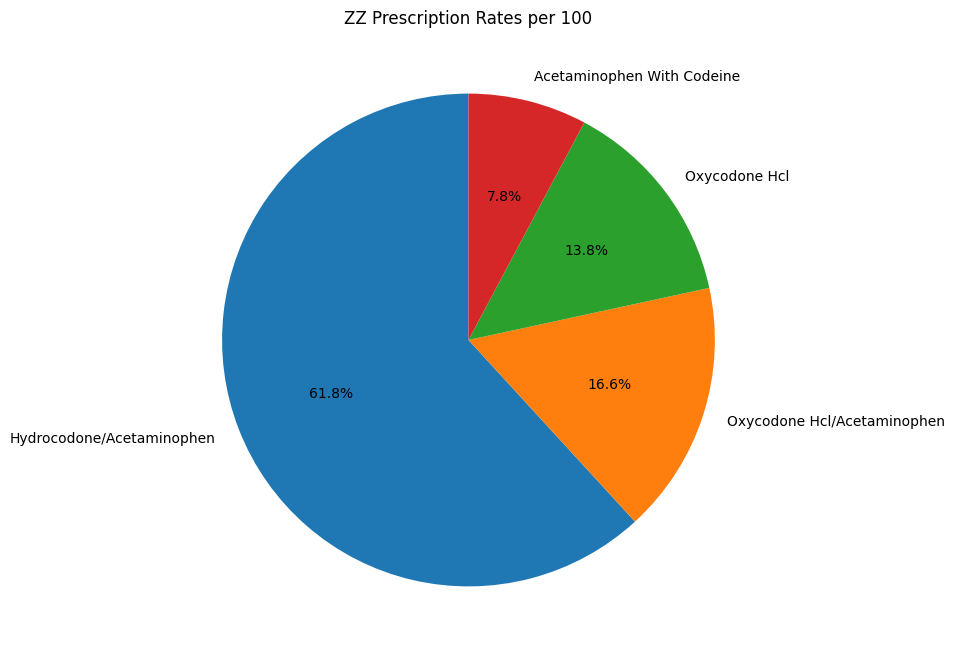

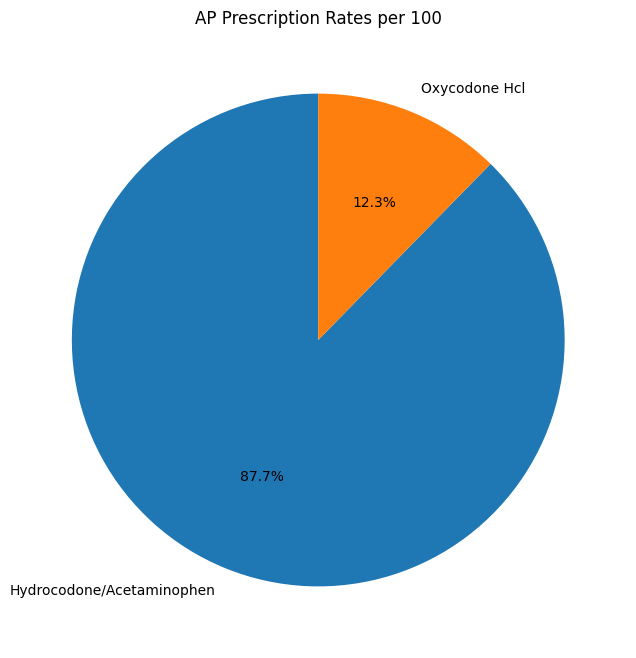

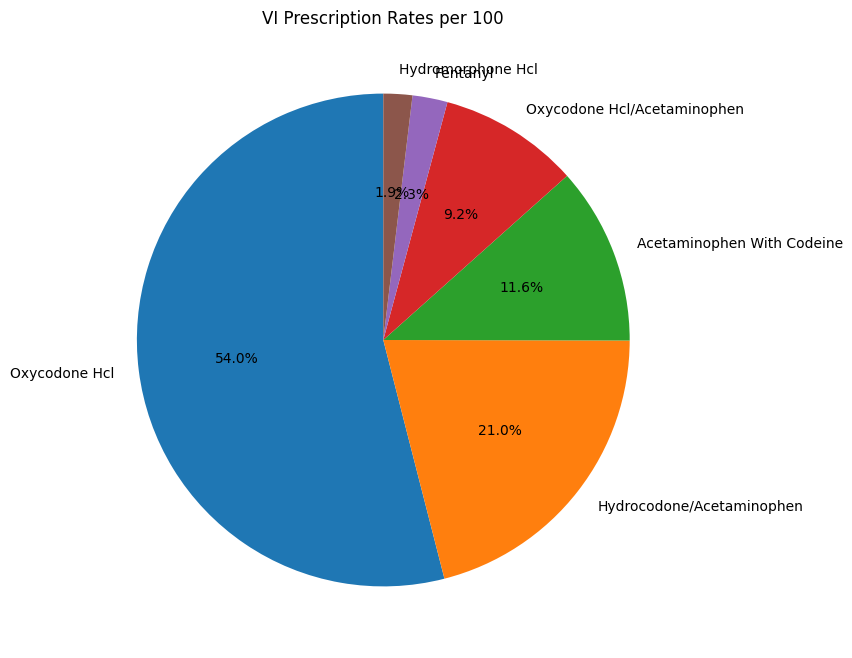

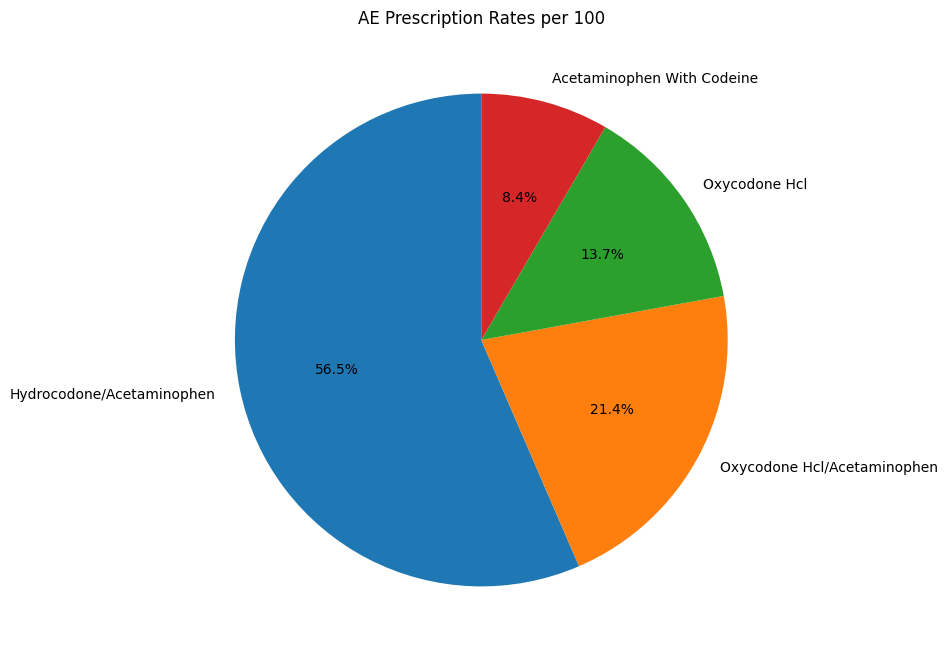

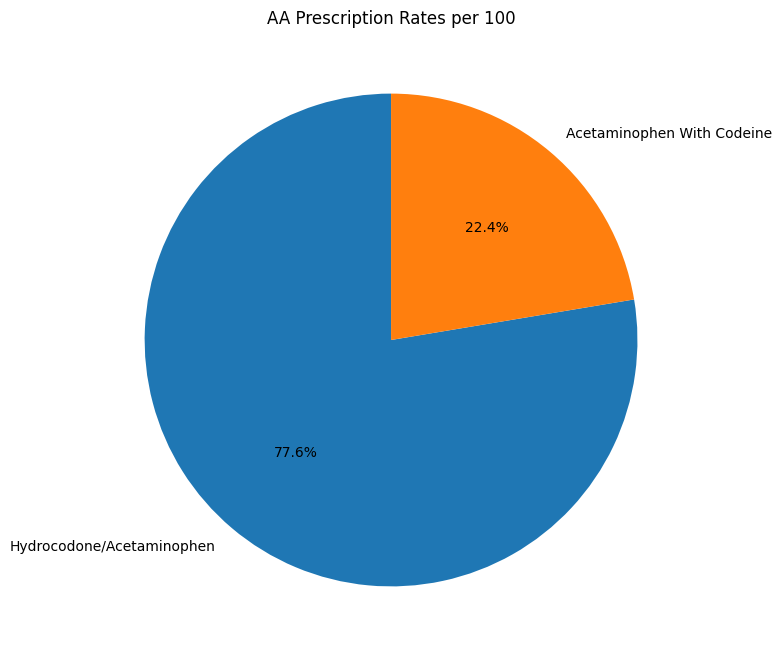

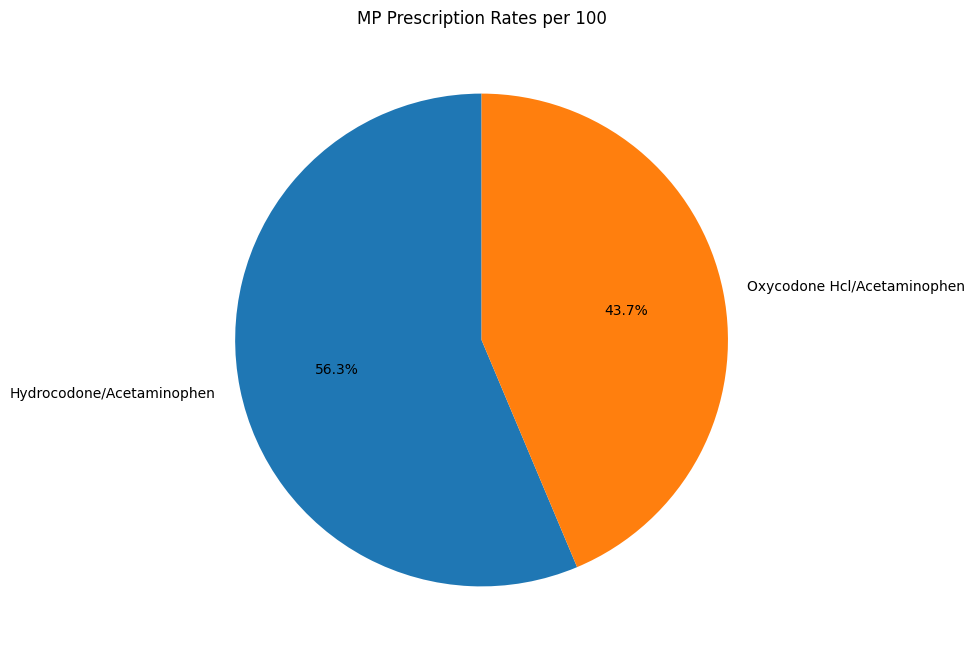

In [25]:
# Loop through each state and create a pie chart for each one
for state in df['Prscrbr_State_Abrvtn'].unique():
    state_data = grouped[grouped['Prscrbr_State_Abrvtn'] == state]
    
    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(state_data['prescription_rate_per_100'], labels=state_data['Gnrc_Name'], autopct='%1.1f%%', startangle=90)
    plt.title(f'{state} Prescription Rates per 100')
    plt.show()


In [26]:
df['Prscrbr_Type'].nunique()

112

In [27]:
df['Prscrbr_State_Abrvtn'].nunique()

60

In [28]:
# Select the 5 columns you want to keep - main dataframe
df2 = df1.loc[:, ['Prscrbr_NPI', 'Prscrbr_State_Abrvtn', 'Prscrbr_Type', 'Gnrc_Name', 'Tot_Clms']]


In [29]:
df2.head()

Prscrbr_NPI Prscrbr_State_Abrvtn            Prscrbr_Type  \
0   1003007477                   MA      Nurse Practitioner   
1   1003007477                   MA      Nurse Practitioner   
2   1003022609                   CA  Psychiatry & Neurology   
3   1003022609                   CA  Psychiatry & Neurology   
4   1003049966                   IL              Psychiatry   

              Gnrc_Name  Tot_Clms  
0    Chlorpromazine Hcl        47  
1         Oxcarbazepine        57  
2  Benztropine Mesylate        73  
3   Quetiapine Fumarate        97  
4   Quetiapine Fumarate        18

In [30]:
df2.shape

(10000000, 5)

In [31]:
# Select the 5 columns you want to keep - opioids dataset
df3 = df.loc[:, ['Prscrbr_NPI', 'Prscrbr_State_Abrvtn', 'Prscrbr_Type', 'Gnrc_Name', 'Tot_Clms']]


In [32]:
df3.shape

(305488, 5)

In [33]:
# Group the data by NPI and calculate total claims for all drugs and opioids
total_claims_all = df2.groupby('Prscrbr_NPI')['Tot_Clms'].sum()
total_claims_opioids = df3.groupby('Prscrbr_NPI')['Tot_Clms'].sum()

# Calculate opioid prescription rate
opioid_prescription_rate = (total_claims_opioids / total_claims_all) * 100

# Reset the index and rename the column
opioid_prescription_rate = opioid_prescription_rate.reset_index().rename(columns={'Tot_Clms': 'Opioid_Prescription_Rate'})


In [34]:
opioid_prescription_rate

Prscrbr_NPI  Opioid_Prescription_Rate
0        1003000126                       NaN
1        1003000142                 37.428423
2        1003000167                       NaN
3        1003000423                       NaN
4        1003000480                       NaN
...             ...                       ...
649871   1992999122                  0.459067
649872   1992999270                       NaN
649873   1992999551                       NaN
649874   1992999650                       NaN
649875   1992999825                       NaN

[649876 rows x 2 columns]

In [35]:
df2 = df2.merge(opioid_prescription_rate[['Prscrbr_NPI', 'Opioid_Prescription_Rate']], on=['Prscrbr_NPI'], how='left')


In [36]:
df2.head()

Prscrbr_NPI Prscrbr_State_Abrvtn            Prscrbr_Type  \
0   1003007477                   MA      Nurse Practitioner   
1   1003007477                   MA      Nurse Practitioner   
2   1003022609                   CA  Psychiatry & Neurology   
3   1003022609                   CA  Psychiatry & Neurology   
4   1003049966                   IL              Psychiatry   

              Gnrc_Name  Tot_Clms  Opioid_Prescription_Rate  
0    Chlorpromazine Hcl        47                  5.786047  
1         Oxcarbazepine        57                  5.786047  
2  Benztropine Mesylate        73                       NaN  
3   Quetiapine Fumarate        97                       NaN  
4   Quetiapine Fumarate        18                       NaN

In [37]:
df2.drop('Gnrc_Name', axis=1, inplace=True)
df2.drop_duplicates(subset=['Prscrbr_NPI'], keep='first', inplace=True)


In [38]:
df3['Prscrbr_NPI'].nunique()

155920

In [39]:
df2.drop('Tot_Clms', axis=1, inplace=True)

In [40]:
df2.head()

Prscrbr_NPI Prscrbr_State_Abrvtn             Prscrbr_Type  \
0   1003007477                   MA       Nurse Practitioner   
2   1003022609                   CA   Psychiatry & Neurology   
4   1003049966                   IL               Psychiatry   
5   1003065640                   OR       Nurse Practitioner   
7   1003070194                   WV  Obstetrics & Gynecology   

   Opioid_Prescription_Rate  
0                  5.786047  
2                       NaN  
4                       NaN  
5                       NaN  
7                 37.028825

In [41]:
# Remove the index column
df2.reset_index(drop=True, inplace=True)


In [42]:
# Set Prscrbr_NPI as the index
#df2.set_index('Prscrbr_NPI', inplace=True)
# Drop rows with NaN values
df2.dropna(inplace=True)


In [43]:
df2.rename(columns={'Opioid_Prescription_Rate': 'op_2020'}, inplace=True)


In [44]:
df2.head()

Prscrbr_NPI Prscrbr_State_Abrvtn             Prscrbr_Type    op_2020
0   1003007477                   MA       Nurse Practitioner   5.786047
4   1003070194                   WV  Obstetrics & Gynecology  37.028825
5   1003071499                   OR       Nurse Practitioner   3.382950
6   1003075516                   PA               Psychiatry   4.961779
7   1003076928                   PA          Family Practice  51.685393

In [45]:
# Save the filtered dataset to a new CSV file
df2.to_csv('final_dataset.csv', index=False)

In [46]:
df5 = pd.read_csv('final_dataset.csv')

### Find the median prescription rates aggregated by provider's state and specialty of the provider

In [47]:
median_2020=df5.groupby(['Prscrbr_State_Abrvtn','Prscrbr_Type'])['op_2020'].median().reset_index().rename(columns={'op_2020':'medianop_2020'})

In [48]:
median_2020

Prscrbr_State_Abrvtn                                       Prscrbr_Type  \
0                      AA                                            Dentist   
1                      AA                                Physician Assistant   
2                      AE                                 Emergency Medicine   
3                      AE                                    Family Practice   
4                      AE                                  Internal Medicine   
...                   ...                                                ...   
3061                   ZZ                        Oral Surgery (Dentist only)   
3062                   ZZ                                 Orthopedic Surgery   
3063                   ZZ                                     Otolaryngology   
3064                   ZZ  Student in an Organized Health Care Education/...   
3065                   ZZ                                            Urology   

      medianop_2020  
0         27.570093  
1        100.000000  
2         25.568182  
3         21.472393  
4          6.729758  
...             ...  
3061      37.241379  
3062      71.276596  
3063      18.103448  
3064      48.000000  
3065     100.000000  

[3066 rows x 3 columns]

In [49]:
data_calc=pd.merge(df5,median_2020,how='left',on=['Prscrbr_State_Abrvtn','Prscrbr_Type'])


In [50]:
data_calc.head()

Prscrbr_NPI Prscrbr_State_Abrvtn             Prscrbr_Type    op_2020  \
0   1003007477                   MA       Nurse Practitioner   5.786047   
1   1003070194                   WV  Obstetrics & Gynecology  37.028825   
2   1003071499                   OR       Nurse Practitioner   3.382950   
3   1003075516                   PA               Psychiatry   4.961779   
4   1003076928                   PA          Family Practice  51.685393   

   medianop_2020  
0       8.523592  
1      18.085106  
2       7.782686  
3       2.543620  
4       2.285799

### Creating labels if the prescription rate for the provider is above the median value

In [51]:
data_calc['label_2020']=0
data_calc['label_2020'][data_calc['op_2020']>=data_calc['medianop_2020']]=1

C:\Users\User\AppData\Local\Temp\ipykernel_19664\2202322038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_calc['label_2020'][data_calc['op_2020']>=data_calc['medianop_2020']]=1


In [52]:
data_calc.tail()

Prscrbr_NPI Prscrbr_State_Abrvtn         Prscrbr_Type     op_2020  \
155915   1326434994                   IL    Internal Medicine   17.857143   
155916   1326437153                   NC  Physician Assistant  100.000000   
155917   1326438052                   WA   Emergency Medicine   21.311475   
155918   1326439498                   CA   Nurse Practitioner   19.402985   
155919   1326439548                   NV   Nurse Practitioner   45.833333   

        medianop_2020  label_2020  
155915       2.739726           1  
155916      30.491640           1  
155917      40.000000           0  
155918      12.962963           1  
155919      10.850826           1

In [53]:
# Save the filtered dataset to a new CSV file
data_calc.to_csv('calc_dataset.csv', index=False)